 # Artificial Neural Network

<b>Installing Theano</b><br/>
pip install --upgrade --no-deps git+git://github.com/Theano/Theano.git

<b>Installing Tensorflow</b><br/>
pip install tensorflow

<b>Installing Keras</b><br/>
pip install --upgrade keras

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

float_formatter = lambda x: "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})

### Importing the dataset

In [2]:
dataset = pd.read_csv('Churn_Modelling.csv');
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, -1].values

In [3]:
dataset.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
print('Number of rows: ', len(X))
X[:5,:], y[:5]

Number of rows:  10000


(array([[619, 'France', 'Female', 42, 2, 0.0, 1, 1, 1, 101348.88],
        [608, 'Spain', 'Female', 41, 1, 83807.86, 1, 0, 1, 112542.58],
        [502, 'France', 'Female', 42, 8, 159660.8, 3, 1, 0, 113931.57],
        [699, 'France', 'Female', 39, 1, 0.0, 2, 0, 0, 93826.63],
        [850, 'Spain', 'Female', 43, 2, 125510.82, 1, 1, 1, 79084.1]], dtype=object),
 array([1, 0, 1, 0, 0], dtype=int64))

### Encoding categorical data

In [5]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])

In [6]:
X

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ..., 
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

In [7]:
onehotendcoder = OneHotEncoder(categorical_features=[1]);
X = onehotendcoder.fit_transform(X).toarray();

In [8]:
X[:5,:]

array([[1.00, 0.00, 0.00, 619.00, 0.00, 42.00, 2.00, 0.00, 1.00, 1.00,
        1.00, 101348.88],
       [0.00, 0.00, 1.00, 608.00, 0.00, 41.00, 1.00, 83807.86, 1.00, 0.00,
        1.00, 112542.58],
       [1.00, 0.00, 0.00, 502.00, 0.00, 42.00, 8.00, 159660.80, 3.00, 1.00,
        0.00, 113931.57],
       [1.00, 0.00, 0.00, 699.00, 0.00, 39.00, 1.00, 0.00, 2.00, 0.00,
        0.00, 93826.63],
       [0.00, 0.00, 1.00, 850.00, 0.00, 43.00, 2.00, 125510.82, 1.00, 1.00,
        1.00, 79084.10]])

Remove a contry column for dummy variables. Because there are three country and only need two country to show (0 0) implies that the removed column.

In [9]:
X = X[:,1:] 

In [10]:
X[:5,:]

array([[0.00, 0.00, 619.00, 0.00, 42.00, 2.00, 0.00, 1.00, 1.00, 1.00,
        101348.88],
       [0.00, 1.00, 608.00, 0.00, 41.00, 1.00, 83807.86, 1.00, 0.00, 1.00,
        112542.58],
       [0.00, 0.00, 502.00, 0.00, 42.00, 8.00, 159660.80, 3.00, 1.00, 0.00,
        113931.57],
       [0.00, 0.00, 699.00, 0.00, 39.00, 1.00, 0.00, 2.00, 0.00, 0.00,
        93826.63],
       [0.00, 1.00, 850.00, 0.00, 43.00, 2.00, 125510.82, 1.00, 1.00, 1.00,
        79084.10]])

### Splitting the dataset into the Training set and Test set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0);

In [12]:
len(X_train), len(X_test)

(8000, 2000)

### Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler();
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [14]:
X_train[:5,:]

array([[-0.57, 1.74, 0.17, -1.09, -0.46, 0.01, -1.22, 0.81, 0.64, -1.03,
        1.11],
       [1.75, -0.57, -2.30, 0.92, 0.30, -1.38, -0.01, -0.92, 0.64, 0.97,
        -0.75],
       [-0.57, -0.57, -1.19, -1.09, -0.94, -1.03, 0.58, -0.92, 0.64, -1.03,
        1.49],
       [-0.57, 1.74, 0.04, 0.92, 0.11, 0.01, 0.47, -0.92, 0.64, -1.03, 1.28],
       [-0.57, 1.74, 2.06, -1.09, 1.74, 1.04, 0.81, 0.81, 0.64, 0.97, 0.56]])

## Part 2 - Now let's make the ANN!

### Importing the Keras libraries and packages

In [15]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [16]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/cpu:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3136827055826105219
, name: "/gpu:0"
device_type: "GPU"
memory_limit: 6732376801
locality {
  bus_id: 1
}
incarnation: 13426495402521870740
physical_device_desc: "device: 0, name: GeForce GTX 1080, pci bus id: 0000:01:00.0"
]


### Initialising the ANN

In [17]:
classifier = Sequential()

### Adding the input layer and the first hidden layer

In [19]:
classifier.add(Dense(units=6, kernel_initializer= 'uniform', activation='relu', input_dim=11));
classifier.add(Dropout(p = 0.1))

### Adding the second hidden layer

In [20]:
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(p = 0.1))

### Adding the output layer

In [21]:
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

### Compiling the ANN

In [22]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Fitting the ANN to the Training set

In [22]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
8000/8000 [==============================] - 0s - loss: 0.3994 - acc: 0.8331     
Epoch 2/100
8000/8000 [==============================] - 0s - loss: 0.3997 - acc: 0.8336     
Epoch 3/100
8000/8000 [==============================] - 0s - loss: 0.3996 - acc: 0.8339     
Epoch 4/100
8000/8000 [==============================] - 0s - loss: 0.3990 - acc: 0.8346     
Epoch 5/100
8000/8000 [==============================] - 0s - loss: 0.3988 - acc: 0.8337     
Epoch 6/100
8000/8000 [==============================] - 0s - loss: 0.3995 - acc: 0.8342     
Epoch 7/100
8000/8000 [==============================] - 0s - loss: 0.3991 - acc: 0.8347     
Epoch 8/100
8000/8000 [==============================] - 0s - loss: 0.3997 - acc: 0.8355     
Epoch 9/100
8000/8000 [==============================] - 0s - loss: 0.3993 - acc: 0.8352     
Epoch 10/100
8000/8000 [==============================] - 0s - loss: 0.3990 - acc: 0.8342     
Epoch 11/100
8000/8000 [==============================] - 0

## Part 3 - Making predictions and evaluating the model

### Predicting the Test set results

In [23]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

## Making the Confusion Matrix

In [70]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
print('% Accuracy = ', (tn + tp)*100 / (tn + tp + fn + fp), '%')

% Accuracy =  86.45 %


### Draw the Confusion Matrix

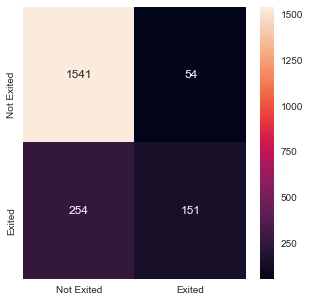

In [56]:
import seaborn as sn
df_cm = pd.DataFrame(cm, index = [i for i in ['Not Exited','Exited']],
                  columns = [i for i in ['Not Exited','Exited']])
plt.figure(figsize = (5,5))
sn.set(font_scale=1)#for label size
sn.heatmap(df_cm, annot=True,fmt='0')
plt.show()

### Manage model

#### Save model

In [42]:
classifier.save('Churn_Modelling.Model.h5')
del classifier

#### Load model

In [69]:
from keras.models import load_model

classifier = load_model('Churn_Modelling.Model.h5')
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [67]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
print('% Accuracy = ', (tn + tp)*100 / (tn + tp + fn + fp), '%')

% Accuracy =  86.45 %


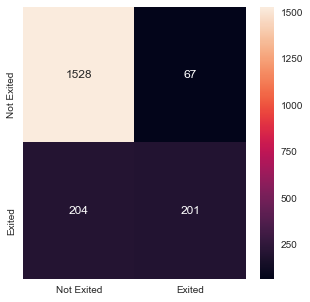

In [71]:
import seaborn as sn
df_cm = pd.DataFrame(cm, index = [i for i in ['Not Exited','Exited']],
                  columns = [i for i in ['Not Exited','Exited']])
plt.figure(figsize = (5,5))
sn.set(font_scale=1)#for label size
sn.heatmap(df_cm, annot=True,fmt='0')
plt.show()

#### Predicting a single new observation

<p>Use our ANN model to predict if the customer with the following informations will leave the bank: </p>
<ul>
    <li>Geography: France</li>
    <li>Credit Score: 600</li>
    <li>Gender: Male</li>
    <li>Age: 40 years old</li>
    <li>Tenure: 3 years</li>
    <li>Balance: &dollar;60000</li>
    <li>Number of Products: 2</li>
    <li>Does this customer have a credit card ?&nbsp;Yes</li>
    <li>Is this customer an Active Member: Yes</li>
    <li>Estimated Salary: &dollar;50000</li>
</ul>
<p>So should we say goodbye to that customer ?</p>

In [73]:
from keras.models import load_model
from sklearn.preprocessing import StandardScaler

classifier = load_model('Churn_Modelling.Model.h5')

sc_X = StandardScaler();
new_prediction = classifier.predict(sc_X.fit_transform(np.array([[0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])))
new_prediction = (new_prediction > 0.5)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [75]:
new_prediction

array([[False]], dtype=bool)

## Part 4 - Evaluating, Improving and Tuning the ANN

### Evaluating the ANN

In [17]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense

In [22]:
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [23]:
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 100)

In [24]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

Epoch 1/100
7200/7200 [==============================] - 5s - loss: 0.4872 - acc: 0.7971     
Epoch 2/100
7200/7200 [==============================] - 4s - loss: 0.4294 - acc: 0.7971     
Epoch 3/100
7200/7200 [==============================] - 4s - loss: 0.4240 - acc: 0.7971     
Epoch 4/100
7200/7200 [==============================] - 4s - loss: 0.4202 - acc: 0.8092     
Epoch 5/100
7200/7200 [==============================] - 4s - loss: 0.4175 - acc: 0.8247     
Epoch 6/100
7200/7200 [==============================] - 4s - loss: 0.4156 - acc: 0.8263     
Epoch 7/100
7200/7200 [==============================] - 4s - loss: 0.4141 - acc: 0.8288     
Epoch 8/100
7200/7200 [==============================] - 4s - loss: 0.4127 - acc: 0.8324     
Epoch 9/100
7200/7200 [==============================] - 4s - loss: 0.4117 - acc: 0.8311     
Epoch 10/100
7200/7200 [==============================] - 4s - loss: 0.4107 - acc: 0.8324     
Epoch 11/100
7200/7200 [==============================] - 4

7200/7200 [==============================] - 3s - loss: 0.3451 - acc: 0.8640     
Epoch 72/100
7200/7200 [==============================] - 3s - loss: 0.3448 - acc: 0.8587     
Epoch 73/100
7200/7200 [==============================] - 3s - loss: 0.3454 - acc: 0.8587     
Epoch 74/100
7200/7200 [==============================] - 4s - loss: 0.3450 - acc: 0.8611     
Epoch 75/100
7200/7200 [==============================] - 3s - loss: 0.3459 - acc: 0.8614     
Epoch 76/100
7200/7200 [==============================] - 4s - loss: 0.3444 - acc: 0.8618     
Epoch 77/100
7200/7200 [==============================] - 3s - loss: 0.3448 - acc: 0.8599     
Epoch 78/100
7200/7200 [==============================] - 4s - loss: 0.3452 - acc: 0.8615     
Epoch 79/100
7200/7200 [==============================] - 4s - loss: 0.3446 - acc: 0.8615     
Epoch 80/100
7200/7200 [==============================] - 4s - loss: 0.3434 - acc: 0.8603     
Epoch 81/100
7200/7200 [==============================] - 4s - 

7200/7200 [==============================] - 3s - loss: 0.3354 - acc: 0.8631     
Epoch 42/100
7200/7200 [==============================] - 3s - loss: 0.3353 - acc: 0.8650     
Epoch 43/100
7200/7200 [==============================] - 3s - loss: 0.3355 - acc: 0.8643     
Epoch 44/100
7200/7200 [==============================] - 3s - loss: 0.3352 - acc: 0.8628     
Epoch 45/100
7200/7200 [==============================] - 3s - loss: 0.3347 - acc: 0.8635     
Epoch 46/100
7200/7200 [==============================] - 3s - loss: 0.3344 - acc: 0.8654     
Epoch 47/100
7200/7200 [==============================] - 3s - loss: 0.3345 - acc: 0.8629     
Epoch 48/100
7200/7200 [==============================] - 3s - loss: 0.3340 - acc: 0.8644     
Epoch 49/100
7200/7200 [==============================] - 3s - loss: 0.3346 - acc: 0.8636     
Epoch 50/100
7200/7200 [==============================] - 3s - loss: 0.3344 - acc: 0.8628     
Epoch 51/100
7200/7200 [==============================] - 3s - 

7200/7200 [==============================] - 3s - loss: 0.4092 - acc: 0.8333     
Epoch 12/100
7200/7200 [==============================] - 3s - loss: 0.4087 - acc: 0.8340     
Epoch 13/100
7200/7200 [==============================] - 3s - loss: 0.4076 - acc: 0.8336     
Epoch 14/100
7200/7200 [==============================] - 3s - loss: 0.4069 - acc: 0.8340     
Epoch 15/100
7200/7200 [==============================] - 3s - loss: 0.4066 - acc: 0.8344     
Epoch 16/100
7200/7200 [==============================] - 3s - loss: 0.4059 - acc: 0.8354     
Epoch 17/100
7200/7200 [==============================] - 3s - loss: 0.4056 - acc: 0.8350     
Epoch 18/100
7200/7200 [==============================] - 3s - loss: 0.4050 - acc: 0.8342     
Epoch 19/100
7200/7200 [==============================] - 3s - loss: 0.4045 - acc: 0.8346     
Epoch 20/100
7200/7200 [==============================] - 3s - loss: 0.4043 - acc: 0.8353     
Epoch 21/100
7200/7200 [==============================] - 3s - 

7200/7200 [==============================] - 3s - loss: 0.4009 - acc: 0.8364     
Epoch 82/100
7200/7200 [==============================] - 3s - loss: 0.4007 - acc: 0.8369     
Epoch 83/100
7200/7200 [==============================] - 3s - loss: 0.4002 - acc: 0.8365     
Epoch 84/100
7200/7200 [==============================] - 3s - loss: 0.3999 - acc: 0.8357     
Epoch 85/100
7200/7200 [==============================] - 3s - loss: 0.4006 - acc: 0.8356     
Epoch 86/100
7200/7200 [==============================] - 3s - loss: 0.4006 - acc: 0.8350     
Epoch 87/100
7200/7200 [==============================] - 3s - loss: 0.4007 - acc: 0.8364     
Epoch 88/100
7200/7200 [==============================] - 3s - loss: 0.4007 - acc: 0.8344     
Epoch 89/100
7200/7200 [==============================] - 3s - loss: 0.4002 - acc: 0.8357     
Epoch 90/100
7200/7200 [==============================] - 3s - loss: 0.4004 - acc: 0.8354     
Epoch 91/100
7200/7200 [==============================] - 3s - 

7200/7200 [==============================] - 3s - loss: 0.3348 - acc: 0.8593     
Epoch 52/100
7200/7200 [==============================] - 3s - loss: 0.3338 - acc: 0.8625     
Epoch 53/100
7200/7200 [==============================] - 3s - loss: 0.3354 - acc: 0.8601     
Epoch 54/100
7200/7200 [==============================] - 3s - loss: 0.3346 - acc: 0.8661     
Epoch 55/100
7200/7200 [==============================] - 3s - loss: 0.3350 - acc: 0.8635     
Epoch 56/100
7200/7200 [==============================] - 3s - loss: 0.3350 - acc: 0.8617     
Epoch 57/100
7200/7200 [==============================] - 3s - loss: 0.3349 - acc: 0.8644     
Epoch 58/100
7200/7200 [==============================] - 3s - loss: 0.3348 - acc: 0.8592     
Epoch 59/100
7200/7200 [==============================] - 3s - loss: 0.3336 - acc: 0.8603     
Epoch 60/100
7200/7200 [==============================] - 3s - loss: 0.3344 - acc: 0.8607     
Epoch 61/100
7200/7200 [==============================] - 3s - 

In [27]:
mean = accuracies.mean()
variance = accuracies.std()

In [28]:
mean, variance

(0.8460000017657876, 0.017462457766798653)

###  Improving the ANN
Dropout Regularization to reduce overfitting if needed

### Tuning the ANN

In [30]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense

In [32]:
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [33]:
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [25, 32],
              'epochs': [100, 500],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)

In [34]:
grid_search = grid_search.fit(X_train, y_train)

Epoch 1/100
7200/7200 [==============================] - 2s - loss: 0.5506 - acc: 0.7954     
Epoch 2/100
7200/7200 [==============================] - ETA: 0s - loss: 0.4366 - acc: 0.796 - 1s - loss: 0.4350 - acc: 0.7971     
Epoch 3/100
7200/7200 [==============================] - 1s - loss: 0.4295 - acc: 0.7971     
Epoch 4/100
7200/7200 [==============================] - 1s - loss: 0.4259 - acc: 0.7971     
Epoch 5/100
7200/7200 [==============================] - 1s - loss: 0.4224 - acc: 0.7971     
Epoch 6/100
7200/7200 [==============================] - 1s - loss: 0.4197 - acc: 0.8000     
Epoch 7/100
7200/7200 [==============================] - 1s - loss: 0.4180 - acc: 0.8197     
Epoch 8/100
7200/7200 [==============================] - 1s - loss: 0.4164 - acc: 0.8235     
Epoch 9/100
7200/7200 [==============================] - 1s - loss: 0.4148 - acc: 0.8260     
Epoch 10/100
7200/7200 [==============================] - 1s - loss: 0.4149 - acc: 0.8268     
Epoch 11/100
7200/720

7200/7200 [==============================] - 1s - loss: 0.4009 - acc: 0.8346     
Epoch 87/100
7200/7200 [==============================] - 1s - loss: 0.4005 - acc: 0.8349     
Epoch 88/100
7200/7200 [==============================] - 1s - loss: 0.4008 - acc: 0.8342     
Epoch 89/100
7200/7200 [==============================] - 1s - loss: 0.4004 - acc: 0.8331     
Epoch 90/100
7200/7200 [==============================] - 1s - loss: 0.4007 - acc: 0.8347     
Epoch 91/100
7200/7200 [==============================] - 1s - loss: 0.4007 - acc: 0.8346     
Epoch 92/100
7200/7200 [==============================] - 1s - loss: 0.4002 - acc: 0.8344     
Epoch 93/100
7200/7200 [==============================] - 1s - loss: 0.4009 - acc: 0.8342     
Epoch 94/100
7200/7200 [==============================] - 1s - loss: 0.4005 - acc: 0.8339     
Epoch 95/100
7200/7200 [==============================] - 1s - loss: 0.4004 - acc: 0.8347     
Epoch 96/100
7200/7200 [==============================] - 1s - 

7200/7200 [==============================] - 1s - loss: 0.4013 - acc: 0.8356     
Epoch 72/100
7200/7200 [==============================] - 1s - loss: 0.4010 - acc: 0.8358     
Epoch 73/100
7200/7200 [==============================] - 1s - loss: 0.4009 - acc: 0.8365     
Epoch 74/100
7200/7200 [==============================] - 1s - loss: 0.4011 - acc: 0.8354     
Epoch 75/100
7200/7200 [==============================] - 1s - loss: 0.4010 - acc: 0.8372     
Epoch 76/100
7200/7200 [==============================] - 1s - loss: 0.4008 - acc: 0.8350     
Epoch 77/100
7200/7200 [==============================] - 1s - loss: 0.4011 - acc: 0.8360     
Epoch 78/100
7200/7200 [==============================] - 1s - loss: 0.4011 - acc: 0.8360     
Epoch 79/100
7200/7200 [==============================] - 1s - loss: 0.4007 - acc: 0.8342     
Epoch 80/100
7200/7200 [==============================] - 1s - loss: 0.4009 - acc: 0.8351     
Epoch 81/100
7200/7200 [==============================] - 1s - 

7200/7200 [==============================] - 1s - loss: 0.4010 - acc: 0.8354     
Epoch 57/100
7200/7200 [==============================] - 1s - loss: 0.4011 - acc: 0.8340     
Epoch 58/100
7200/7200 [==============================] - 1s - loss: 0.4008 - acc: 0.8369     
Epoch 59/100
7200/7200 [==============================] - 1s - loss: 0.4011 - acc: 0.8375     
Epoch 60/100
7200/7200 [==============================] - 1s - loss: 0.4009 - acc: 0.8349     
Epoch 61/100
7200/7200 [==============================] - 1s - loss: 0.4011 - acc: 0.8358     
Epoch 62/100
7200/7200 [==============================] - 1s - loss: 0.4006 - acc: 0.8353     
Epoch 63/100
7200/7200 [==============================] - 1s - loss: 0.4009 - acc: 0.8357     
Epoch 64/100
7200/7200 [==============================] - 1s - loss: 0.4005 - acc: 0.8367     
Epoch 65/100
7200/7200 [==============================] - 1s - loss: 0.4007 - acc: 0.8381     
Epoch 66/100
7200/7200 [==============================] - 1s - 

7200/7200 [==============================] - 1s - loss: 0.4009 - acc: 0.8362     
Epoch 42/100
7200/7200 [==============================] - 1s - loss: 0.4004 - acc: 0.8365     
Epoch 43/100
7200/7200 [==============================] - 1s - loss: 0.3997 - acc: 0.8368     
Epoch 44/100
7200/7200 [==============================] - 1s - loss: 0.3990 - acc: 0.8369     
Epoch 45/100
7200/7200 [==============================] - 1s - loss: 0.3980 - acc: 0.8358     
Epoch 46/100
7200/7200 [==============================] - 1s - loss: 0.3977 - acc: 0.8360     
Epoch 47/100
7200/7200 [==============================] - 1s - loss: 0.3974 - acc: 0.8353     
Epoch 48/100
7200/7200 [==============================] - 1s - loss: 0.3971 - acc: 0.8354     
Epoch 49/100
7200/7200 [==============================] - 1s - loss: 0.3964 - acc: 0.8378     
Epoch 50/100
7200/7200 [==============================] - 1s - loss: 0.3963 - acc: 0.8360     
Epoch 51/100
7200/7200 [==============================] - 2s - 

7200/7200 [==============================] - 1s - loss: 0.4106 - acc: 0.8332     
Epoch 27/100
7200/7200 [==============================] - 1s - loss: 0.4103 - acc: 0.8326     
Epoch 28/100
7200/7200 [==============================] - 1s - loss: 0.4100 - acc: 0.8336     
Epoch 29/100
7200/7200 [==============================] - 1s - loss: 0.4096 - acc: 0.8331     
Epoch 30/100
7200/7200 [==============================] - 1s - loss: 0.4096 - acc: 0.8328     
Epoch 31/100
7200/7200 [==============================] - 1s - loss: 0.4092 - acc: 0.8333     
Epoch 32/100
7200/7200 [==============================] - 1s - loss: 0.4090 - acc: 0.8331     
Epoch 33/100
7200/7200 [==============================] - 1s - loss: 0.4089 - acc: 0.8332     
Epoch 34/100
7200/7200 [==============================] - 1s - loss: 0.4088 - acc: 0.8331     
Epoch 35/100
7200/7200 [==============================] - 1s - loss: 0.4085 - acc: 0.8335     
Epoch 36/100
7200/7200 [==============================] - 1s - 

7200/7200 [==============================] - 1s - loss: 0.4110 - acc: 0.8321     
Epoch 12/100
7200/7200 [==============================] - 1s - loss: 0.4085 - acc: 0.8336     
Epoch 13/100
7200/7200 [==============================] - 1s - loss: 0.4065 - acc: 0.8344     
Epoch 14/100
7200/7200 [==============================] - 1s - loss: 0.4054 - acc: 0.8351     
Epoch 15/100
7200/7200 [==============================] - 2s - loss: 0.4035 - acc: 0.8353     
Epoch 16/100
7200/7200 [==============================] - 1s - loss: 0.4025 - acc: 0.8347     
Epoch 17/100
7200/7200 [==============================] - 1s - loss: 0.4018 - acc: 0.8379     
Epoch 18/100
7200/7200 [==============================] - 1s - loss: 0.4008 - acc: 0.8362     
Epoch 19/100
7200/7200 [==============================] - 2s - loss: 0.4002 - acc: 0.8350     
Epoch 20/100
7200/7200 [==============================] - 1s - loss: 0.3995 - acc: 0.8354     
Epoch 21/100
7200/7200 [==============================] - 1s - 

7200/7200 [==============================] - 1s - loss: 0.3876 - acc: 0.8419     
Epoch 98/100
7200/7200 [==============================] - 1s - loss: 0.3864 - acc: 0.8433     
Epoch 99/100
7200/7200 [==============================] - 1s - loss: 0.3850 - acc: 0.8417     
Epoch 100/100
7200/7200 [==============================] - 2s - loss: 0.5770 - acc: 0.7957     
Epoch 2/100
7200/7200 [==============================] - 1s - loss: 0.4371 - acc: 0.7969     
Epoch 3/100
7200/7200 [==============================] - 1s - loss: 0.4316 - acc: 0.7969     
Epoch 4/100
7200/7200 [==============================] - 1s - loss: 0.4294 - acc: 0.7969     
Epoch 5/100
7200/7200 [==============================] - 1s - loss: 0.4279 - acc: 0.7969     
Epoch 6/100
7200/7200 [==============================] - 1s - loss: 0.4264 - acc: 0.7969     
Epoch 7/100
7200/7200 [==============================] - 1s - loss: 0.4250 - acc: 0.7969     
Epoch 8/100
7200/7200 [==============================] - 1s - loss: 

7200/7200 [==============================] - 1s - loss: 0.4004 - acc: 0.8360     
Epoch 83/100
7200/7200 [==============================] - 1s - loss: 0.4006 - acc: 0.8362     
Epoch 84/100
7200/7200 [==============================] - 1s - loss: 0.4004 - acc: 0.8357     
Epoch 85/100
7200/7200 [==============================] - 1s - loss: 0.4007 - acc: 0.8353     
Epoch 86/100
7200/7200 [==============================] - 1s - loss: 0.4002 - acc: 0.8346     
Epoch 87/100
7200/7200 [==============================] - 1s - loss: 0.4004 - acc: 0.8362     
Epoch 88/100
7200/7200 [==============================] - 1s - loss: 0.4000 - acc: 0.8362     
Epoch 89/100
7200/7200 [==============================] - 1s - loss: 0.4006 - acc: 0.8362     
Epoch 90/100
7200/7200 [==============================] - 1s - loss: 0.4004 - acc: 0.8375     
Epoch 91/100
7200/7200 [==============================] - 1s - loss: 0.4002 - acc: 0.8364     
Epoch 92/100
7200/7200 [==============================] - 1s - 

7200/7200 [==============================] - 1s - loss: 0.3949 - acc: 0.8351     
Epoch 68/100
7200/7200 [==============================] - 1s - loss: 0.3943 - acc: 0.8364     
Epoch 69/100
7200/7200 [==============================] - 1s - loss: 0.3945 - acc: 0.8367     
Epoch 70/100
7200/7200 [==============================] - 1s - loss: 0.3942 - acc: 0.8369     
Epoch 71/100
7200/7200 [==============================] - 1s - loss: 0.3942 - acc: 0.8353     
Epoch 72/100
7200/7200 [==============================] - 1s - loss: 0.3938 - acc: 0.8364     
Epoch 73/100
7200/7200 [==============================] - 1s - loss: 0.3938 - acc: 0.8365     
Epoch 74/100
7200/7200 [==============================] - 1s - loss: 0.3937 - acc: 0.8369     
Epoch 75/100
7200/7200 [==============================] - 1s - loss: 0.3937 - acc: 0.8375     
Epoch 76/100
7200/7200 [==============================] - 1s - loss: 0.3939 - acc: 0.8360     
Epoch 77/100
7200/7200 [==============================] - 1s - 

7200/7200 [==============================] - 1s - loss: 0.3311 - acc: 0.8636     
Epoch 53/100
7200/7200 [==============================] - 1s - loss: 0.3312 - acc: 0.8637     
Epoch 54/100
7200/7200 [==============================] - 1s - loss: 0.3315 - acc: 0.8631     
Epoch 55/100
7200/7200 [==============================] - 1s - loss: 0.3311 - acc: 0.8635     
Epoch 56/100
7200/7200 [==============================] - 1s - loss: 0.3304 - acc: 0.8629     
Epoch 57/100
7200/7200 [==============================] - 1s - loss: 0.3314 - acc: 0.8629     
Epoch 58/100
7200/7200 [==============================] - 1s - loss: 0.3312 - acc: 0.8639     
Epoch 59/100
7200/7200 [==============================] - 1s - loss: 0.3314 - acc: 0.8626     
Epoch 60/100
7200/7200 [==============================] - 1s - loss: 0.3319 - acc: 0.8629     
Epoch 61/100
7200/7200 [==============================] - 1s - loss: 0.3311 - acc: 0.8622     
Epoch 62/100
7200/7200 [==============================] - 1s - 

7200/7200 [==============================] - 1s - loss: 0.4060 - acc: 0.8344     
Epoch 38/100
7200/7200 [==============================] - 1s - loss: 0.4062 - acc: 0.8368     
Epoch 39/100
7200/7200 [==============================] - 1s - loss: 0.4062 - acc: 0.8346     
Epoch 40/100
7200/7200 [==============================] - 1s - loss: 0.4058 - acc: 0.8354     
Epoch 41/100
7200/7200 [==============================] - 1s - loss: 0.4052 - acc: 0.8344     
Epoch 42/100
7200/7200 [==============================] - 1s - loss: 0.4056 - acc: 0.8346     
Epoch 43/100
7200/7200 [==============================] - 1s - loss: 0.4053 - acc: 0.8347     
Epoch 44/100
7200/7200 [==============================] - 1s - loss: 0.4051 - acc: 0.8336     
Epoch 45/100
7200/7200 [==============================] - 1s - loss: 0.4050 - acc: 0.8337     
Epoch 46/100
7200/7200 [==============================] - 1s - loss: 0.4050 - acc: 0.8349     
Epoch 47/100
7200/7200 [==============================] - 1s - 

7200/7200 [==============================] - 1s - loss: 0.4073 - acc: 0.8337     
Epoch 23/100
7200/7200 [==============================] - 1s - loss: 0.4067 - acc: 0.8347     
Epoch 24/100
7200/7200 [==============================] - 1s - loss: 0.4062 - acc: 0.8346     
Epoch 25/100
7200/7200 [==============================] - 1s - loss: 0.4059 - acc: 0.8337     
Epoch 26/100
7200/7200 [==============================] - 1s - loss: 0.4059 - acc: 0.8354     
Epoch 27/100
7200/7200 [==============================] - 1s - loss: 0.4054 - acc: 0.8357     
Epoch 28/100
7200/7200 [==============================] - 1s - loss: 0.4053 - acc: 0.8351     
Epoch 29/100
7200/7200 [==============================] - 1s - loss: 0.4049 - acc: 0.8350     
Epoch 30/100
7200/7200 [==============================] - 1s - loss: 0.4046 - acc: 0.8329     
Epoch 31/100
7200/7200 [==============================] - 1s - loss: 0.4043 - acc: 0.8356     
Epoch 32/100
7200/7200 [==============================] - 1s - 

7200/7200 [==============================] - 1s - loss: 0.4180 - acc: 0.8125     
Epoch 8/100
7200/7200 [==============================] - 1s - loss: 0.4166 - acc: 0.8250     
Epoch 9/100
7200/7200 [==============================] - 1s - loss: 0.4155 - acc: 0.8260     
Epoch 10/100
7200/7200 [==============================] - 1s - loss: 0.4144 - acc: 0.8276     
Epoch 11/100
7200/7200 [==============================] - 1s - loss: 0.4134 - acc: 0.8296     
Epoch 12/100
7200/7200 [==============================] - 1s - loss: 0.4127 - acc: 0.8306     
Epoch 13/100
7200/7200 [==============================] - 1s - loss: 0.4120 - acc: 0.8324     
Epoch 14/100
7200/7200 [==============================] - 1s - loss: 0.4112 - acc: 0.8315     
Epoch 15/100
7200/7200 [==============================] - 1s - loss: 0.4108 - acc: 0.8318     
Epoch 16/100
7200/7200 [==============================] - 1s - loss: 0.4098 - acc: 0.8318     
Epoch 17/100
7200/7200 [==============================] - 1s - lo

7200/7200 [==============================] - 1s - loss: 0.4007 - acc: 0.8358     
Epoch 94/100
7200/7200 [==============================] - 1s - loss: 0.4008 - acc: 0.8365     
Epoch 95/100
7200/7200 [==============================] - 1s - loss: 0.4009 - acc: 0.8354     
Epoch 96/100
7200/7200 [==============================] - 1s - loss: 0.4008 - acc: 0.8360     
Epoch 97/100
7200/7200 [==============================] - 1s - loss: 0.4006 - acc: 0.8368     
Epoch 98/100
7200/7200 [==============================] - 1s - loss: 0.4009 - acc: 0.8357     
Epoch 99/100
7200/7200 [==============================] - 1s - loss: 0.4009 - acc: 0.8350     
Epoch 100/100
7200/7200 [==============================] - 2s - loss: 0.5773 - acc: 0.7951     
Epoch 2/100
7200/7200 [==============================] - 1s - loss: 0.4424 - acc: 0.7956     
Epoch 3/100
7200/7200 [==============================] - 1s - loss: 0.4331 - acc: 0.7956     
Epoch 4/100
7200/7200 [==============================] - 1s - lo

7200/7200 [==============================] - 1s - loss: 0.3984 - acc: 0.8367     
Epoch 79/100
7200/7200 [==============================] - 1s - loss: 0.3984 - acc: 0.8379     
Epoch 80/100
7200/7200 [==============================] - 1s - loss: 0.3979 - acc: 0.8364     
Epoch 81/100
7200/7200 [==============================] - 1s - loss: 0.3982 - acc: 0.8368     
Epoch 82/100
7200/7200 [==============================] - 1s - loss: 0.3978 - acc: 0.8376     
Epoch 83/100
7200/7200 [==============================] - 1s - loss: 0.3979 - acc: 0.8357     
Epoch 84/100
7200/7200 [==============================] - 1s - loss: 0.3973 - acc: 0.8364     
Epoch 85/100
7200/7200 [==============================] - 1s - loss: 0.3978 - acc: 0.8368     
Epoch 86/100
7200/7200 [==============================] - 1s - loss: 0.3976 - acc: 0.8367     
Epoch 87/100
7200/7200 [==============================] - 1s - loss: 0.3976 - acc: 0.8371     
Epoch 88/100
7200/7200 [==============================] - 1s - 

7200/7200 [==============================] - 1s - loss: 0.3992 - acc: 0.8364     
Epoch 64/100
7200/7200 [==============================] - 1s - loss: 0.3990 - acc: 0.8361     
Epoch 65/100
7200/7200 [==============================] - 1s - loss: 0.3992 - acc: 0.8375     
Epoch 66/100
7200/7200 [==============================] - 1s - loss: 0.3987 - acc: 0.8365     
Epoch 67/100
7200/7200 [==============================] - 1s - loss: 0.3989 - acc: 0.8357     
Epoch 68/100
7200/7200 [==============================] - 1s - loss: 0.3986 - acc: 0.8364     
Epoch 69/100
7200/7200 [==============================] - 1s - loss: 0.3988 - acc: 0.8362     
Epoch 70/100
7200/7200 [==============================] - 1s - loss: 0.3984 - acc: 0.8364     
Epoch 71/100
7200/7200 [==============================] - 1s - loss: 0.3982 - acc: 0.8383     
Epoch 72/100
7200/7200 [==============================] - 1s - loss: 0.3981 - acc: 0.8358     
Epoch 73/100
7200/7200 [==============================] - 1s - 

7200/7200 [==============================] - 1s - loss: 0.3967 - acc: 0.8343     
Epoch 49/100
7200/7200 [==============================] - 1s - loss: 0.3964 - acc: 0.8356     
Epoch 50/100
7200/7200 [==============================] - 1s - loss: 0.3967 - acc: 0.8349     
Epoch 51/100
7200/7200 [==============================] - 1s - loss: 0.3968 - acc: 0.8356     
Epoch 52/100
7200/7200 [==============================] - 1s - loss: 0.3962 - acc: 0.8350     
Epoch 53/100
7200/7200 [==============================] - 1s - loss: 0.3970 - acc: 0.8356     
Epoch 54/100
7200/7200 [==============================] - 1s - loss: 0.3959 - acc: 0.8328     
Epoch 55/100
7200/7200 [==============================] - 1s - loss: 0.3964 - acc: 0.8339     
Epoch 56/100
7200/7200 [==============================] - 1s - loss: 0.3959 - acc: 0.8347     
Epoch 57/100
7200/7200 [==============================] - 1s - loss: 0.3960 - acc: 0.8343     
Epoch 58/100
7200/7200 [==============================] - 1s - 

7200/7200 [==============================] - 1s - loss: 0.4048 - acc: 0.8360     
Epoch 34/100
7200/7200 [==============================] - 2s - loss: 0.4047 - acc: 0.8344     
Epoch 35/100
7200/7200 [==============================] - 1s - loss: 0.4046 - acc: 0.8362     
Epoch 36/100
7200/7200 [==============================] - 1s - loss: 0.4041 - acc: 0.8350     
Epoch 37/100
7200/7200 [==============================] - 1s - loss: 0.4040 - acc: 0.8356     
Epoch 38/100
7200/7200 [==============================] - 1s - loss: 0.4039 - acc: 0.8364     
Epoch 39/100
7200/7200 [==============================] - 1s - loss: 0.4035 - acc: 0.8379     
Epoch 40/100
7200/7200 [==============================] - 1s - loss: 0.4034 - acc: 0.8357     
Epoch 41/100
7200/7200 [==============================] - 1s - loss: 0.4034 - acc: 0.8364     
Epoch 42/100
7200/7200 [==============================] - 1s - loss: 0.4029 - acc: 0.8356     
Epoch 43/100
7200/7200 [==============================] - 1s - 

7200/7200 [==============================] - 1s - loss: 0.4101 - acc: 0.8331     
Epoch 19/100
7200/7200 [==============================] - 1s - loss: 0.4095 - acc: 0.8337     
Epoch 20/100
7200/7200 [==============================] - 1s - loss: 0.4091 - acc: 0.8328     
Epoch 21/100
7200/7200 [==============================] - 1s - loss: 0.4090 - acc: 0.8335     
Epoch 22/100
7200/7200 [==============================] - 1s - loss: 0.4083 - acc: 0.8346     
Epoch 23/100
7200/7200 [==============================] - 1s - loss: 0.4082 - acc: 0.8343     
Epoch 24/100
7200/7200 [==============================] - 1s - loss: 0.4078 - acc: 0.8339     
Epoch 25/100
7200/7200 [==============================] - 1s - loss: 0.4076 - acc: 0.8333     
Epoch 26/100
7200/7200 [==============================] - 1s - loss: 0.4070 - acc: 0.8353     
Epoch 27/100
7200/7200 [==============================] - 1s - loss: 0.4070 - acc: 0.8356     
Epoch 28/100
7200/7200 [==============================] - 1s - 

7200/7200 [==============================] - 1s - loss: 0.4300 - acc: 0.7962     
Epoch 4/100
7200/7200 [==============================] - 1s - loss: 0.4250 - acc: 0.7962     
Epoch 5/100
7200/7200 [==============================] - 1s - loss: 0.4209 - acc: 0.7978     
Epoch 6/100
7200/7200 [==============================] - 1s - loss: 0.4169 - acc: 0.8242     
Epoch 7/100
7200/7200 [==============================] - 1s - loss: 0.4135 - acc: 0.8296     
Epoch 8/100
7200/7200 [==============================] - 1s - loss: 0.4111 - acc: 0.8318     
Epoch 9/100
7200/7200 [==============================] - 1s - loss: 0.4090 - acc: 0.8308     
Epoch 10/100
7200/7200 [==============================] - 1s - loss: 0.4074 - acc: 0.8326     
Epoch 11/100
7200/7200 [==============================] - 1s - loss: 0.4059 - acc: 0.8331     
Epoch 12/100
7200/7200 [==============================] - 1s - loss: 0.4046 - acc: 0.8336     
Epoch 13/100
7200/7200 [==============================] - 2s - loss: 

7200/7200 [==============================] - 1s - loss: 0.3918 - acc: 0.8382     
Epoch 90/100
7200/7200 [==============================] - 1s - loss: 0.3918 - acc: 0.8392     
Epoch 91/100
7200/7200 [==============================] - 1s - loss: 0.3919 - acc: 0.8375     
Epoch 92/100
7200/7200 [==============================] - 1s - loss: 0.3924 - acc: 0.8381     
Epoch 93/100
7200/7200 [==============================] - 1s - loss: 0.3915 - acc: 0.8400     
Epoch 94/100
7200/7200 [==============================] - 1s - loss: 0.3920 - acc: 0.8375     
Epoch 95/100
7200/7200 [==============================] - 1s - loss: 0.3917 - acc: 0.8381     
Epoch 96/100
7200/7200 [==============================] - 1s - loss: 0.3919 - acc: 0.8397     
Epoch 97/100
7200/7200 [==============================] - 1s - loss: 0.3920 - acc: 0.8386     
Epoch 98/100
7200/7200 [==============================] - 1s - loss: 0.3919 - acc: 0.8376     
Epoch 99/100
7200/7200 [==============================] - 1s - 

7200/7200 [==============================] - 1s - loss: 0.3976 - acc: 0.8379     
Epoch 75/100
7200/7200 [==============================] - 1s - loss: 0.3978 - acc: 0.8357     
Epoch 76/100
7200/7200 [==============================] - 1s - loss: 0.3979 - acc: 0.8386     
Epoch 77/100
7200/7200 [==============================] - 1s - loss: 0.3977 - acc: 0.8379     
Epoch 78/100
7200/7200 [==============================] - 1s - loss: 0.3978 - acc: 0.8360     
Epoch 79/100
7200/7200 [==============================] - 1s - loss: 0.3976 - acc: 0.8374     
Epoch 80/100
7200/7200 [==============================] - 1s - loss: 0.3976 - acc: 0.8365     
Epoch 81/100
7200/7200 [==============================] - 1s - loss: 0.3977 - acc: 0.8369     
Epoch 82/100
7200/7200 [==============================] - 1s - loss: 0.3973 - acc: 0.8362     
Epoch 83/100
7200/7200 [==============================] - 1s - loss: 0.3974 - acc: 0.8379     
Epoch 84/100
7200/7200 [==============================] - 1s - 

7200/7200 [==============================] - 1s - loss: 0.4043 - acc: 0.8335     
Epoch 60/100
7200/7200 [==============================] - 1s - loss: 0.4041 - acc: 0.8337     
Epoch 61/100
7200/7200 [==============================] - 1s - loss: 0.4040 - acc: 0.8340     
Epoch 62/100
7200/7200 [==============================] - 1s - loss: 0.4041 - acc: 0.8343     
Epoch 63/100
7200/7200 [==============================] - 1s - loss: 0.4038 - acc: 0.8333     
Epoch 64/100
7200/7200 [==============================] - 1s - loss: 0.4038 - acc: 0.8333     
Epoch 65/100
7200/7200 [==============================] - 1s - loss: 0.4035 - acc: 0.8333     
Epoch 66/100
7200/7200 [==============================] - 1s - loss: 0.4037 - acc: 0.8336     
Epoch 67/100
7200/7200 [==============================] - 1s - loss: 0.4035 - acc: 0.8350     
Epoch 68/100
7200/7200 [==============================] - 1s - loss: 0.4038 - acc: 0.8335     
Epoch 69/100
7200/7200 [==============================] - 1s - 

7200/7200 [==============================] - 1s - loss: 0.4023 - acc: 0.8351     
Epoch 45/500
7200/7200 [==============================] - 1s - loss: 0.4020 - acc: 0.8351     
Epoch 46/500
7200/7200 [==============================] - 1s - loss: 0.4023 - acc: 0.8353     
Epoch 47/500
7200/7200 [==============================] - 1s - loss: 0.4022 - acc: 0.8350     
Epoch 48/500
7200/7200 [==============================] - 1s - loss: 0.4018 - acc: 0.8353     
Epoch 49/500
7200/7200 [==============================] - 1s - loss: 0.4019 - acc: 0.8347     
Epoch 50/500
7200/7200 [==============================] - 1s - loss: 0.4021 - acc: 0.8349     
Epoch 51/500
7200/7200 [==============================] - 1s - loss: 0.4016 - acc: 0.8340     
Epoch 52/500
7200/7200 [==============================] - 1s - loss: 0.4020 - acc: 0.8358     
Epoch 53/500
7200/7200 [==============================] - 1s - loss: 0.4014 - acc: 0.8347     
Epoch 54/500
7200/7200 [==============================] - 1s - 

7200/7200 [==============================] - 1s - loss: 0.3735 - acc: 0.8385     
Epoch 131/500
7200/7200 [==============================] - 1s - loss: 0.3733 - acc: 0.8368     
Epoch 132/500
7200/7200 [==============================] - 1s - loss: 0.3729 - acc: 0.8383     
Epoch 133/500
7200/7200 [==============================] - 1s - loss: 0.3732 - acc: 0.8399     
Epoch 134/500
7200/7200 [==============================] - 1s - loss: 0.3726 - acc: 0.8386     
Epoch 135/500
7200/7200 [==============================] - 1s - loss: 0.3727 - acc: 0.8399     
Epoch 136/500
7200/7200 [==============================] - 1s - loss: 0.3725 - acc: 0.8390     
Epoch 137/500
7200/7200 [==============================] - 1s - loss: 0.3728 - acc: 0.8397     
Epoch 138/500
7200/7200 [==============================] - 1s - loss: 0.3723 - acc: 0.8394     
Epoch 139/500
7200/7200 [==============================] - 1s - loss: 0.3719 - acc: 0.8410     
Epoch 140/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3679 - acc: 0.8421     
Epoch 216/500
7200/7200 [==============================] - 1s - loss: 0.3680 - acc: 0.8411     
Epoch 217/500
7200/7200 [==============================] - 1s - loss: 0.3676 - acc: 0.8410     
Epoch 218/500
7200/7200 [==============================] - 1s - loss: 0.3670 - acc: 0.8411     
Epoch 219/500
7200/7200 [==============================] - 1s - loss: 0.3671 - acc: 0.8419     
Epoch 220/500
7200/7200 [==============================] - 1s - loss: 0.3673 - acc: 0.8425     
Epoch 221/500
7200/7200 [==============================] - 1s - loss: 0.3678 - acc: 0.8418     
Epoch 222/500
7200/7200 [==============================] - 1s - loss: 0.3672 - acc: 0.8404     
Epoch 223/500
7200/7200 [==============================] - 1s - loss: 0.3673 - acc: 0.8421     
Epoch 224/500
7200/7200 [==============================] - 1s - loss: 0.3669 - acc: 0.8418     
Epoch 225/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3654 - acc: 0.8449     
Epoch 301/500
7200/7200 [==============================] - 1s - loss: 0.3657 - acc: 0.8411     
Epoch 302/500
7200/7200 [==============================] - 1s - loss: 0.3658 - acc: 0.8425     
Epoch 303/500
7200/7200 [==============================] - 1s - loss: 0.3652 - acc: 0.8426     
Epoch 304/500
7200/7200 [==============================] - 1s - loss: 0.3655 - acc: 0.8428     
Epoch 305/500
7200/7200 [==============================] - 1s - loss: 0.3657 - acc: 0.8412     
Epoch 306/500
7200/7200 [==============================] - 1s - loss: 0.3655 - acc: 0.8446     
Epoch 307/500
7200/7200 [==============================] - 1s - loss: 0.3660 - acc: 0.8428     
Epoch 308/500
7200/7200 [==============================] - 1s - loss: 0.3655 - acc: 0.8429     
Epoch 309/500
7200/7200 [==============================] - 1s - loss: 0.3657 - acc: 0.8446     
Epoch 310/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3645 - acc: 0.8471     
Epoch 386/500
7200/7200 [==============================] - 1s - loss: 0.3651 - acc: 0.8464     
Epoch 387/500
7200/7200 [==============================] - 1s - loss: 0.3651 - acc: 0.8444     
Epoch 388/500
7200/7200 [==============================] - 1s - loss: 0.3649 - acc: 0.8440     
Epoch 389/500
7200/7200 [==============================] - 1s - loss: 0.3652 - acc: 0.8458     
Epoch 390/500
7200/7200 [==============================] - 1s - loss: 0.3644 - acc: 0.8447     
Epoch 391/500
7200/7200 [==============================] - 1s - loss: 0.3653 - acc: 0.8440     
Epoch 392/500
7200/7200 [==============================] - 1s - loss: 0.3640 - acc: 0.8447     
Epoch 393/500
7200/7200 [==============================] - 1s - loss: 0.3651 - acc: 0.8462     
Epoch 394/500
7200/7200 [==============================] - 1s - loss: 0.3649 - acc: 0.8439     
Epoch 395/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3650 - acc: 0.8475     
Epoch 471/500
7200/7200 [==============================] - 1s - loss: 0.3638 - acc: 0.8464     
Epoch 472/500
7200/7200 [==============================] - 1s - loss: 0.3645 - acc: 0.8475     
Epoch 473/500
7200/7200 [==============================] - 1s - loss: 0.3639 - acc: 0.8457     
Epoch 474/500
7200/7200 [==============================] - 1s - loss: 0.3642 - acc: 0.8460     
Epoch 475/500
7200/7200 [==============================] - 1s - loss: 0.3644 - acc: 0.8457     
Epoch 476/500
7200/7200 [==============================] - 1s - loss: 0.3643 - acc: 0.8461     
Epoch 477/500
7200/7200 [==============================] - 1s - loss: 0.3642 - acc: 0.8436     
Epoch 478/500
7200/7200 [==============================] - 1s - loss: 0.3643 - acc: 0.8456     
Epoch 479/500
7200/7200 [==============================] - 1s - loss: 0.3641 - acc: 0.8464     
Epoch 480/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.4014 - acc: 0.8351     
Epoch 55/500
7200/7200 [==============================] - 1s - loss: 0.4013 - acc: 0.8356     
Epoch 56/500
7200/7200 [==============================] - 1s - loss: 0.4012 - acc: 0.8354     
Epoch 57/500
7200/7200 [==============================] - 1s - loss: 0.4011 - acc: 0.8344     
Epoch 58/500
7200/7200 [==============================] - 1s - loss: 0.4010 - acc: 0.8336     
Epoch 59/500
7200/7200 [==============================] - 1s - loss: 0.4012 - acc: 0.8357     
Epoch 60/500
7200/7200 [==============================] - 1s - loss: 0.4007 - acc: 0.8347     
Epoch 61/500
7200/7200 [==============================] - 1s - loss: 0.4007 - acc: 0.8356     
Epoch 62/500
7200/7200 [==============================] - 1s - loss: 0.4010 - acc: 0.8358     
Epoch 63/500
7200/7200 [==============================] - 1s - loss: 0.4002 - acc: 0.8357     
Epoch 64/500
7200/7200 [==============================] - 1s - 

7200/7200 [==============================] - 1s - loss: 0.3988 - acc: 0.8374     
Epoch 140/500
7200/7200 [==============================] - 1s - loss: 0.3992 - acc: 0.8343     
Epoch 141/500
7200/7200 [==============================] - 1s - loss: 0.3991 - acc: 0.8347     
Epoch 142/500
7200/7200 [==============================] - 1s - loss: 0.3990 - acc: 0.8372     
Epoch 143/500
7200/7200 [==============================] - 1s - loss: 0.3994 - acc: 0.8350     
Epoch 144/500
7200/7200 [==============================] - 1s - loss: 0.3990 - acc: 0.8365     
Epoch 145/500
7200/7200 [==============================] - 1s - loss: 0.3992 - acc: 0.8356     
Epoch 146/500
7200/7200 [==============================] - 1s - loss: 0.3991 - acc: 0.8374     
Epoch 147/500
7200/7200 [==============================] - 1s - loss: 0.3992 - acc: 0.8375     
Epoch 148/500
7200/7200 [==============================] - 1s - loss: 0.3989 - acc: 0.8357     
Epoch 149/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3985 - acc: 0.8360     
Epoch 225/500
7200/7200 [==============================] - 1s - loss: 0.3986 - acc: 0.8367     
Epoch 226/500
7200/7200 [==============================] - 1s - loss: 0.3989 - acc: 0.8351     
Epoch 227/500
7200/7200 [==============================] - 1s - loss: 0.3985 - acc: 0.8364     
Epoch 228/500
7200/7200 [==============================] - 1s - loss: 0.3985 - acc: 0.8350     
Epoch 229/500
7200/7200 [==============================] - 1s - loss: 0.3988 - acc: 0.8367     
Epoch 230/500
7200/7200 [==============================] - 1s - loss: 0.3988 - acc: 0.8361     
Epoch 231/500
7200/7200 [==============================] - 1s - loss: 0.3986 - acc: 0.8354     
Epoch 232/500
7200/7200 [==============================] - 1s - loss: 0.3988 - acc: 0.8364     
Epoch 233/500
7200/7200 [==============================] - 1s - loss: 0.3985 - acc: 0.8362     
Epoch 234/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3985 - acc: 0.8350     
Epoch 310/500
7200/7200 [==============================] - 1s - loss: 0.3986 - acc: 0.8349     
Epoch 311/500
7200/7200 [==============================] - 1s - loss: 0.3987 - acc: 0.8362     
Epoch 312/500
7200/7200 [==============================] - 1s - loss: 0.3983 - acc: 0.8351     
Epoch 313/500
7200/7200 [==============================] - 1s - loss: 0.3985 - acc: 0.8346     
Epoch 314/500
7200/7200 [==============================] - 1s - loss: 0.3987 - acc: 0.8371     
Epoch 315/500
7200/7200 [==============================] - 1s - loss: 0.3985 - acc: 0.8353     
Epoch 316/500
7200/7200 [==============================] - 1s - loss: 0.3986 - acc: 0.8362     
Epoch 317/500
7200/7200 [==============================] - 1s - loss: 0.3983 - acc: 0.8357     
Epoch 318/500
7200/7200 [==============================] - 1s - loss: 0.3985 - acc: 0.8356     
Epoch 319/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3985 - acc: 0.8360     
Epoch 395/500
7200/7200 [==============================] - 1s - loss: 0.3984 - acc: 0.8361     
Epoch 396/500
7200/7200 [==============================] - 1s - loss: 0.3984 - acc: 0.8351     
Epoch 397/500
7200/7200 [==============================] - 1s - loss: 0.3986 - acc: 0.8365     
Epoch 398/500
7200/7200 [==============================] - 1s - loss: 0.3985 - acc: 0.8347     
Epoch 399/500
7200/7200 [==============================] - 1s - loss: 0.3983 - acc: 0.8344     
Epoch 400/500
7200/7200 [==============================] - 1s - loss: 0.3986 - acc: 0.8357     
Epoch 401/500
7200/7200 [==============================] - 1s - loss: 0.3986 - acc: 0.8362     
Epoch 402/500
7200/7200 [==============================] - 1s - loss: 0.3986 - acc: 0.8340     
Epoch 403/500
7200/7200 [==============================] - 1s - loss: 0.3986 - acc: 0.8343     
Epoch 404/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3982 - acc: 0.8351     
Epoch 480/500
7200/7200 [==============================] - 1s - loss: 0.3984 - acc: 0.8364     
Epoch 481/500
7200/7200 [==============================] - 1s - loss: 0.3984 - acc: 0.8351     
Epoch 482/500
7200/7200 [==============================] - 1s - loss: 0.3983 - acc: 0.8356     
Epoch 483/500
7200/7200 [==============================] - 1s - loss: 0.3983 - acc: 0.8343     
Epoch 484/500
7200/7200 [==============================] - 1s - loss: 0.3982 - acc: 0.8343     
Epoch 485/500
7200/7200 [==============================] - 1s - loss: 0.3987 - acc: 0.8344     
Epoch 486/500
7200/7200 [==============================] - 1s - loss: 0.3982 - acc: 0.8360     
Epoch 487/500
7200/7200 [==============================] - 1s - loss: 0.3986 - acc: 0.8369     
Epoch 488/500
7200/7200 [==============================] - 1s - loss: 0.3982 - acc: 0.8368     
Epoch 489/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3954 - acc: 0.8365     
Epoch 65/500
7200/7200 [==============================] - 1s - loss: 0.3952 - acc: 0.8374     
Epoch 66/500
7200/7200 [==============================] - 1s - loss: 0.3953 - acc: 0.8360     
Epoch 67/500
7200/7200 [==============================] - 1s - loss: 0.3953 - acc: 0.8360     
Epoch 68/500
7200/7200 [==============================] - 1s - loss: 0.3950 - acc: 0.8361     
Epoch 69/500
7200/7200 [==============================] - 1s - loss: 0.3946 - acc: 0.8364     
Epoch 70/500
7200/7200 [==============================] - 1s - loss: 0.3945 - acc: 0.8369     
Epoch 71/500
7200/7200 [==============================] - 1s - loss: 0.3947 - acc: 0.8369     
Epoch 72/500
7200/7200 [==============================] - 1s - loss: 0.3944 - acc: 0.8371     
Epoch 73/500
7200/7200 [==============================] - 1s - loss: 0.3940 - acc: 0.8369     
Epoch 74/500
7200/7200 [==============================] - 1s - 

7200/7200 [==============================] - 1s - loss: 0.3922 - acc: 0.8378     
Epoch 150/500
7200/7200 [==============================] - 1s - loss: 0.3921 - acc: 0.8375     
Epoch 151/500
7200/7200 [==============================] - 1s - loss: 0.3921 - acc: 0.8376     
Epoch 152/500
7200/7200 [==============================] - 1s - loss: 0.3922 - acc: 0.8369     
Epoch 153/500
7200/7200 [==============================] - 1s - loss: 0.3925 - acc: 0.8367     
Epoch 154/500
7200/7200 [==============================] - 1s - loss: 0.3921 - acc: 0.8383     
Epoch 155/500
7200/7200 [==============================] - 1s - loss: 0.3925 - acc: 0.8369     
Epoch 156/500
7200/7200 [==============================] - 1s - loss: 0.3922 - acc: 0.8374     
Epoch 157/500
7200/7200 [==============================] - 1s - loss: 0.3918 - acc: 0.8381     
Epoch 158/500
7200/7200 [==============================] - 1s - loss: 0.3924 - acc: 0.8372     
Epoch 159/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3895 - acc: 0.8410     
Epoch 235/500
7200/7200 [==============================] - 1s - loss: 0.3893 - acc: 0.8394     
Epoch 236/500
7200/7200 [==============================] - 1s - loss: 0.3893 - acc: 0.8394     
Epoch 237/500
7200/7200 [==============================] - 1s - loss: 0.3894 - acc: 0.8397     
Epoch 238/500
7200/7200 [==============================] - 1s - loss: 0.3892 - acc: 0.8408     
Epoch 239/500
7200/7200 [==============================] - 1s - loss: 0.3888 - acc: 0.8412     
Epoch 240/500
7200/7200 [==============================] - 1s - loss: 0.3891 - acc: 0.8414     
Epoch 241/500
7200/7200 [==============================] - 1s - loss: 0.3889 - acc: 0.8403     
Epoch 242/500
7200/7200 [==============================] - 1s - loss: 0.3886 - acc: 0.8404     
Epoch 243/500
7200/7200 [==============================] - 1s - loss: 0.3887 - acc: 0.8408     
Epoch 244/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3444 - acc: 0.8599     
Epoch 320/500
7200/7200 [==============================] - 1s - loss: 0.3443 - acc: 0.8597     
Epoch 321/500
7200/7200 [==============================] - 1s - loss: 0.3441 - acc: 0.8612     
Epoch 322/500
7200/7200 [==============================] - 1s - loss: 0.3442 - acc: 0.8592     
Epoch 323/500
7200/7200 [==============================] - 1s - loss: 0.3446 - acc: 0.8610     
Epoch 324/500
7200/7200 [==============================] - 1s - loss: 0.3436 - acc: 0.8597     
Epoch 325/500
7200/7200 [==============================] - 1s - loss: 0.3436 - acc: 0.8603     
Epoch 326/500
7200/7200 [==============================] - 1s - loss: 0.3435 - acc: 0.8585     
Epoch 327/500
7200/7200 [==============================] - 1s - loss: 0.3437 - acc: 0.8599     
Epoch 328/500
7200/7200 [==============================] - 1s - loss: 0.3440 - acc: 0.8607     
Epoch 329/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3422 - acc: 0.8597     
Epoch 405/500
7200/7200 [==============================] - 1s - loss: 0.3418 - acc: 0.8594     
Epoch 406/500
7200/7200 [==============================] - 1s - loss: 0.3419 - acc: 0.8614     
Epoch 407/500
7200/7200 [==============================] - 1s - loss: 0.3421 - acc: 0.8608     
Epoch 408/500
7200/7200 [==============================] - 1s - loss: 0.3422 - acc: 0.8615     
Epoch 409/500
7200/7200 [==============================] - 1s - loss: 0.3416 - acc: 0.8619     
Epoch 410/500
7200/7200 [==============================] - 1s - loss: 0.3423 - acc: 0.8621     
Epoch 411/500
7200/7200 [==============================] - 1s - loss: 0.3416 - acc: 0.8615     
Epoch 412/500
7200/7200 [==============================] - 1s - loss: 0.3414 - acc: 0.8611     
Epoch 413/500
7200/7200 [==============================] - 1s - loss: 0.3415 - acc: 0.8621     
Epoch 414/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3407 - acc: 0.8626     
Epoch 490/500
7200/7200 [==============================] - 1s - loss: 0.3409 - acc: 0.8606     
Epoch 491/500
7200/7200 [==============================] - 1s - loss: 0.3408 - acc: 0.8619     
Epoch 492/500
7200/7200 [==============================] - 1s - loss: 0.3411 - acc: 0.8597     
Epoch 493/500
7200/7200 [==============================] - 1s - loss: 0.3413 - acc: 0.8618     
Epoch 494/500
7200/7200 [==============================] - 1s - loss: 0.3411 - acc: 0.8612     
Epoch 495/500
7200/7200 [==============================] - 1s - loss: 0.3408 - acc: 0.8622     
Epoch 496/500
7200/7200 [==============================] - 1s - loss: 0.3405 - acc: 0.8618     
Epoch 497/500
7200/7200 [==============================] - 1s - loss: 0.3412 - acc: 0.8601     
Epoch 498/500
7200/7200 [==============================] - 1s - loss: 0.3408 - acc: 0.8604     
Epoch 499/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3305 - acc: 0.8657     
Epoch 75/500
7200/7200 [==============================] - 1s - loss: 0.3304 - acc: 0.8657     
Epoch 76/500
7200/7200 [==============================] - 1s - loss: 0.3299 - acc: 0.8639     
Epoch 77/500
7200/7200 [==============================] - 1s - loss: 0.3301 - acc: 0.8647     
Epoch 78/500
7200/7200 [==============================] - 1s - loss: 0.3298 - acc: 0.8646     
Epoch 79/500
7200/7200 [==============================] - 1s - loss: 0.3297 - acc: 0.8665     
Epoch 80/500
7200/7200 [==============================] - 1s - loss: 0.3296 - acc: 0.8669     
Epoch 81/500
7200/7200 [==============================] - 1s - loss: 0.3299 - acc: 0.8644     
Epoch 82/500
7200/7200 [==============================] - 1s - loss: 0.3303 - acc: 0.8649     
Epoch 83/500
7200/7200 [==============================] - 1s - loss: 0.3297 - acc: 0.8660     
Epoch 84/500
7200/7200 [==============================] - 1s - 

7200/7200 [==============================] - 1s - loss: 0.3290 - acc: 0.8662     
Epoch 160/500
7200/7200 [==============================] - 1s - loss: 0.3286 - acc: 0.8676     
Epoch 161/500
7200/7200 [==============================] - 1s - loss: 0.3285 - acc: 0.8658     
Epoch 162/500
7200/7200 [==============================] - 1s - loss: 0.3290 - acc: 0.8644     
Epoch 163/500
7200/7200 [==============================] - 1s - loss: 0.3289 - acc: 0.8662     
Epoch 164/500
7200/7200 [==============================] - 1s - loss: 0.3285 - acc: 0.8656     
Epoch 165/500
7200/7200 [==============================] - 1s - loss: 0.3285 - acc: 0.8672     
Epoch 166/500
7200/7200 [==============================] - 1s - loss: 0.3286 - acc: 0.8668     
Epoch 167/500
7200/7200 [==============================] - 1s - loss: 0.3294 - acc: 0.8656     
Epoch 168/500
7200/7200 [==============================] - 1s - loss: 0.3290 - acc: 0.8647     
Epoch 169/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3275 - acc: 0.8654     
Epoch 245/500
7200/7200 [==============================] - 1s - loss: 0.3270 - acc: 0.8657     
Epoch 246/500
7200/7200 [==============================] - 1s - loss: 0.3279 - acc: 0.8667     
Epoch 247/500
7200/7200 [==============================] - 1s - loss: 0.3276 - acc: 0.8667     
Epoch 248/500
7200/7200 [==============================] - 1s - loss: 0.3278 - acc: 0.8661     
Epoch 249/500
7200/7200 [==============================] - 1s - loss: 0.3269 - acc: 0.8662     
Epoch 250/500
7200/7200 [==============================] - 1s - loss: 0.3272 - acc: 0.8665     
Epoch 251/500
7200/7200 [==============================] - 1s - loss: 0.3272 - acc: 0.8669     
Epoch 252/500
7200/7200 [==============================] - 1s - loss: 0.3272 - acc: 0.8669     
Epoch 253/500
7200/7200 [==============================] - 1s - loss: 0.3273 - acc: 0.8657     
Epoch 254/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3269 - acc: 0.8667     
Epoch 330/500
7200/7200 [==============================] - 1s - loss: 0.3269 - acc: 0.8675     
Epoch 331/500
7200/7200 [==============================] - 1s - loss: 0.3264 - acc: 0.8649     
Epoch 332/500
7200/7200 [==============================] - 1s - loss: 0.3269 - acc: 0.8660     
Epoch 333/500
7200/7200 [==============================] - 1s - loss: 0.3267 - acc: 0.8660     
Epoch 334/500
7200/7200 [==============================] - 1s - loss: 0.3266 - acc: 0.8675     
Epoch 335/500
7200/7200 [==============================] - 1s - loss: 0.3264 - acc: 0.8662     
Epoch 336/500
7200/7200 [==============================] - 1s - loss: 0.3263 - acc: 0.8657     
Epoch 337/500
7200/7200 [==============================] - 1s - loss: 0.3262 - acc: 0.8668     
Epoch 338/500
7200/7200 [==============================] - 1s - loss: 0.3267 - acc: 0.8661     
Epoch 339/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3260 - acc: 0.8667     
Epoch 415/500
7200/7200 [==============================] - 1s - loss: 0.3264 - acc: 0.8662     
Epoch 416/500
7200/7200 [==============================] - 1s - loss: 0.3262 - acc: 0.8658     
Epoch 417/500
7200/7200 [==============================] - 1s - loss: 0.3262 - acc: 0.8649     
Epoch 418/500
7200/7200 [==============================] - 1s - loss: 0.3262 - acc: 0.8657     
Epoch 419/500
7200/7200 [==============================] - 1s - loss: 0.3259 - acc: 0.8654     
Epoch 420/500
7200/7200 [==============================] - 1s - loss: 0.3260 - acc: 0.8650     
Epoch 421/500
7200/7200 [==============================] - 1s - loss: 0.3266 - acc: 0.8668     
Epoch 422/500
7200/7200 [==============================] - 1s - loss: 0.3263 - acc: 0.8672     
Epoch 423/500
7200/7200 [==============================] - 1s - loss: 0.3265 - acc: 0.8665     
Epoch 424/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3261 - acc: 0.8662     
Epoch 500/500
7200/7200 [==============================] - 2s - loss: 0.5458 - acc: 0.7937     
Epoch 2/500
7200/7200 [==============================] - 1s - loss: 0.4401 - acc: 0.7937     
Epoch 3/500
7200/7200 [==============================] - 1s - loss: 0.4337 - acc: 0.7937     
Epoch 4/500
7200/7200 [==============================] - 1s - loss: 0.4304 - acc: 0.7937     
Epoch 5/500
7200/7200 [==============================] - 1s - loss: 0.4273 - acc: 0.7937     
Epoch 6/500
7200/7200 [==============================] - 1s - loss: 0.4245 - acc: 0.8046     
Epoch 7/500
7200/7200 [==============================] - 1s - loss: 0.4226 - acc: 0.8174     
Epoch 8/500
7200/7200 [==============================] - 1s - loss: 0.4204 - acc: 0.8208     
Epoch 9/500
7200/7200 [==============================] - 1s - loss: 0.4193 - acc: 0.8253     
Epoch 10/500
7200/7200 [==============================] - 1s - loss: 0

7200/7200 [==============================] - 1s - loss: 0.4029 - acc: 0.8343     
Epoch 85/500
7200/7200 [==============================] - 1s - loss: 0.4030 - acc: 0.8332     
Epoch 86/500
7200/7200 [==============================] - 1s - loss: 0.4030 - acc: 0.8344     
Epoch 87/500
7200/7200 [==============================] - 1s - loss: 0.4024 - acc: 0.8347     
Epoch 88/500
7200/7200 [==============================] - 1s - loss: 0.4030 - acc: 0.8353     
Epoch 89/500
7200/7200 [==============================] - 1s - loss: 0.4030 - acc: 0.8331     
Epoch 90/500
7200/7200 [==============================] - 1s - loss: 0.4024 - acc: 0.8368     
Epoch 91/500
7200/7200 [==============================] - 1s - loss: 0.4023 - acc: 0.8335     
Epoch 92/500
7200/7200 [==============================] - 1s - loss: 0.4026 - acc: 0.8337     
Epoch 93/500
7200/7200 [==============================] - 1s - loss: 0.4021 - acc: 0.8337     
Epoch 94/500
7200/7200 [==============================] - 1s - 

7200/7200 [==============================] - 1s - loss: 0.4018 - acc: 0.8350     
Epoch 170/500
7200/7200 [==============================] - 1s - loss: 0.4019 - acc: 0.8344     
Epoch 171/500
7200/7200 [==============================] - 1s - loss: 0.4010 - acc: 0.8347     
Epoch 172/500
7200/7200 [==============================] - 1s - loss: 0.4009 - acc: 0.8342     
Epoch 173/500
7200/7200 [==============================] - 1s - loss: 0.4016 - acc: 0.8350     
Epoch 174/500
7200/7200 [==============================] - 1s - loss: 0.4018 - acc: 0.8339     
Epoch 175/500
7200/7200 [==============================] - 1s - loss: 0.4015 - acc: 0.8339     
Epoch 176/500
7200/7200 [==============================] - 1s - loss: 0.4013 - acc: 0.8335     
Epoch 177/500
7200/7200 [==============================] - 1s - loss: 0.4014 - acc: 0.8347     
Epoch 178/500
7200/7200 [==============================] - 1s - loss: 0.4011 - acc: 0.8339     
Epoch 179/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.4010 - acc: 0.8339     
Epoch 255/500
7200/7200 [==============================] - 1s - loss: 0.4013 - acc: 0.8351     
Epoch 256/500
7200/7200 [==============================] - 1s - loss: 0.4015 - acc: 0.8333     
Epoch 257/500
7200/7200 [==============================] - 1s - loss: 0.4012 - acc: 0.8339     
Epoch 258/500
7200/7200 [==============================] - 1s - loss: 0.4012 - acc: 0.8354     
Epoch 259/500
7200/7200 [==============================] - 1s - loss: 0.4010 - acc: 0.8351     
Epoch 260/500
7200/7200 [==============================] - 1s - loss: 0.4016 - acc: 0.8347     
Epoch 261/500
7200/7200 [==============================] - 1s - loss: 0.4012 - acc: 0.8337     
Epoch 262/500
7200/7200 [==============================] - 1s - loss: 0.4011 - acc: 0.8350     
Epoch 263/500
7200/7200 [==============================] - 1s - loss: 0.4014 - acc: 0.8350     
Epoch 264/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.4010 - acc: 0.8347     
Epoch 340/500
7200/7200 [==============================] - 1s - loss: 0.4009 - acc: 0.8347     
Epoch 341/500
7200/7200 [==============================] - 1s - loss: 0.4009 - acc: 0.8344     
Epoch 342/500
7200/7200 [==============================] - 1s - loss: 0.4008 - acc: 0.8360     
Epoch 343/500
7200/7200 [==============================] - 1s - loss: 0.4009 - acc: 0.8364     
Epoch 344/500
7200/7200 [==============================] - 1s - loss: 0.4013 - acc: 0.8347     
Epoch 345/500
7200/7200 [==============================] - 1s - loss: 0.4006 - acc: 0.8354     
Epoch 346/500
7200/7200 [==============================] - 1s - loss: 0.4013 - acc: 0.8335     
Epoch 347/500
7200/7200 [==============================] - 1s - loss: 0.4009 - acc: 0.8350     
Epoch 348/500
7200/7200 [==============================] - 1s - loss: 0.4012 - acc: 0.8343     
Epoch 349/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.4013 - acc: 0.8337     
Epoch 424/500
7200/7200 [==============================] - 1s - loss: 0.4008 - acc: 0.8329     
Epoch 425/500
7200/7200 [==============================] - 1s - loss: 0.4010 - acc: 0.8358     
Epoch 426/500
7200/7200 [==============================] - 1s - loss: 0.4010 - acc: 0.8336     
Epoch 427/500
7200/7200 [==============================] - 1s - loss: 0.4007 - acc: 0.8360     
Epoch 428/500
7200/7200 [==============================] - 1s - loss: 0.4013 - acc: 0.8343     
Epoch 429/500
7200/7200 [==============================] - 1s - loss: 0.4010 - acc: 0.8339     
Epoch 430/500
7200/7200 [==============================] - 1s - loss: 0.4012 - acc: 0.8343     
Epoch 431/500
7200/7200 [==============================] - 1s - loss: 0.4009 - acc: 0.8347     
Epoch 432/500
7200/7200 [==============================] - 1s - loss: 0.4011 - acc: 0.8358     
Epoch 433/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.4206 - acc: 0.8183     
Epoch 8/500
7200/7200 [==============================] - 1s - loss: 0.4187 - acc: 0.8221     
Epoch 9/500
7200/7200 [==============================] - 1s - loss: 0.4174 - acc: 0.8254     
Epoch 10/500
7200/7200 [==============================] - 1s - loss: 0.4158 - acc: 0.8290     
Epoch 11/500
7200/7200 [==============================] - 1s - loss: 0.4150 - acc: 0.8296     
Epoch 12/500
7200/7200 [==============================] - 1s - loss: 0.4138 - acc: 0.8307     
Epoch 13/500
7200/7200 [==============================] - 1s - loss: 0.4128 - acc: 0.8318     
Epoch 14/500
7200/7200 [==============================] - 1s - loss: 0.4118 - acc: 0.8307     
Epoch 15/500
7200/7200 [==============================] - 1s - loss: 0.4116 - acc: 0.8318     
Epoch 16/500
7200/7200 [==============================] - 1s - loss: 0.4106 - acc: 0.8336     
Epoch 17/500
7200/7200 [==============================] - 1s - lo

7200/7200 [==============================] - 1s - loss: 0.3990 - acc: 0.8368     
Epoch 94/500
7200/7200 [==============================] - 1s - loss: 0.3993 - acc: 0.8343     
Epoch 95/500
7200/7200 [==============================] - 1s - loss: 0.3995 - acc: 0.8353     
Epoch 96/500
7200/7200 [==============================] - 1s - loss: 0.3993 - acc: 0.8347     
Epoch 97/500
7200/7200 [==============================] - 1s - loss: 0.3996 - acc: 0.8357     
Epoch 98/500
7200/7200 [==============================] - 1s - loss: 0.3992 - acc: 0.8336     
Epoch 99/500
7200/7200 [==============================] - 1s - loss: 0.3990 - acc: 0.8337     
Epoch 100/500
7200/7200 [==============================] - 1s - loss: 0.3991 - acc: 0.8354     
Epoch 101/500
7200/7200 [==============================] - 1s - loss: 0.3993 - acc: 0.8349     
Epoch 102/500
7200/7200 [==============================] - 1s - loss: 0.3987 - acc: 0.8367     
Epoch 103/500
7200/7200 [==============================] - 1

7200/7200 [==============================] - 1s - loss: 0.3990 - acc: 0.8358     
Epoch 179/500
7200/7200 [==============================] - 1s - loss: 0.3988 - acc: 0.8362     
Epoch 180/500
7200/7200 [==============================] - 1s - loss: 0.3984 - acc: 0.8346     
Epoch 181/500
7200/7200 [==============================] - 1s - loss: 0.3989 - acc: 0.8340     
Epoch 182/500
7200/7200 [==============================] - 1s - loss: 0.3988 - acc: 0.8349     
Epoch 183/500
7200/7200 [==============================] - 1s - loss: 0.3989 - acc: 0.8356     
Epoch 184/500
7200/7200 [==============================] - 1s - loss: 0.3990 - acc: 0.8347     
Epoch 185/500
7200/7200 [==============================] - 1s - loss: 0.3987 - acc: 0.8342     
Epoch 186/500
7200/7200 [==============================] - 1s - loss: 0.3978 - acc: 0.8358     
Epoch 187/500
7200/7200 [==============================] - 1s - loss: 0.3991 - acc: 0.8350     
Epoch 188/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3986 - acc: 0.8343     
Epoch 264/500
7200/7200 [==============================] - 1s - loss: 0.3990 - acc: 0.8358     
Epoch 265/500
7200/7200 [==============================] - 1s - loss: 0.3986 - acc: 0.8340     
Epoch 266/500
7200/7200 [==============================] - 1s - loss: 0.3987 - acc: 0.8350     
Epoch 267/500
7200/7200 [==============================] - 1s - loss: 0.3990 - acc: 0.8343     
Epoch 268/500
7200/7200 [==============================] - 1s - loss: 0.3985 - acc: 0.8349     
Epoch 269/500
7200/7200 [==============================] - 1s - loss: 0.3988 - acc: 0.8356     
Epoch 270/500
7200/7200 [==============================] - 1s - loss: 0.3985 - acc: 0.8346     
Epoch 271/500
7200/7200 [==============================] - 1s - loss: 0.3987 - acc: 0.8350     
Epoch 272/500
7200/7200 [==============================] - 1s - loss: 0.3989 - acc: 0.8360     
Epoch 273/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3985 - acc: 0.8349     
Epoch 349/500
7200/7200 [==============================] - 1s - loss: 0.3983 - acc: 0.8357     
Epoch 350/500
7200/7200 [==============================] - 1s - loss: 0.3987 - acc: 0.8360     
Epoch 351/500
7200/7200 [==============================] - 1s - loss: 0.3984 - acc: 0.8340     
Epoch 352/500
7200/7200 [==============================] - 1s - loss: 0.3984 - acc: 0.8357     
Epoch 353/500
7200/7200 [==============================] - 1s - loss: 0.3989 - acc: 0.8351     
Epoch 354/500
7200/7200 [==============================] - 1s - loss: 0.3987 - acc: 0.8350     
Epoch 355/500
7200/7200 [==============================] - 1s - loss: 0.3983 - acc: 0.8347     
Epoch 356/500
7200/7200 [==============================] - 1s - loss: 0.3987 - acc: 0.8360     
Epoch 357/500
7200/7200 [==============================] - 1s - loss: 0.3983 - acc: 0.8360     
Epoch 358/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3982 - acc: 0.8349     
Epoch 434/500
7200/7200 [==============================] - 1s - loss: 0.3985 - acc: 0.8346     
Epoch 435/500
7200/7200 [==============================] - 1s - loss: 0.3982 - acc: 0.8364     
Epoch 436/500
7200/7200 [==============================] - 1s - loss: 0.3982 - acc: 0.8369     
Epoch 437/500
7200/7200 [==============================] - 1s - loss: 0.3981 - acc: 0.8351     
Epoch 438/500
7200/7200 [==============================] - 1s - loss: 0.3982 - acc: 0.8361     
Epoch 439/500
7200/7200 [==============================] - 1s - loss: 0.3982 - acc: 0.8360     
Epoch 440/500
7200/7200 [==============================] - 1s - loss: 0.3979 - acc: 0.8357     
Epoch 441/500
7200/7200 [==============================] - 1s - loss: 0.3981 - acc: 0.8342     
Epoch 442/500
7200/7200 [==============================] - 1s - loss: 0.3980 - acc: 0.8339     
Epoch 443/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.4107 - acc: 0.8336     
Epoch 19/500
7200/7200 [==============================] - 1s - loss: 0.4100 - acc: 0.8333     
Epoch 20/500
7200/7200 [==============================] - 1s - loss: 0.4095 - acc: 0.8339     
Epoch 21/500
7200/7200 [==============================] - 1s - loss: 0.4092 - acc: 0.8337     
Epoch 22/500
7200/7200 [==============================] - 1s - loss: 0.4085 - acc: 0.8342     
Epoch 23/500
7200/7200 [==============================] - 1s - loss: 0.4083 - acc: 0.8337     
Epoch 24/500
7200/7200 [==============================] - 1s - loss: 0.4079 - acc: 0.8350     
Epoch 25/500
7200/7200 [==============================] - 1s - loss: 0.4073 - acc: 0.8361     
Epoch 26/500
7200/7200 [==============================] - 1s - loss: 0.4070 - acc: 0.8357     
Epoch 27/500
7200/7200 [==============================] - 1s - loss: 0.4067 - acc: 0.8358     
Epoch 28/500
7200/7200 [==============================] - 1s - 

7200/7200 [==============================] - 1s - loss: 0.3996 - acc: 0.8361     
Epoch 105/500
7200/7200 [==============================] - 1s - loss: 0.3993 - acc: 0.8353     
Epoch 106/500
7200/7200 [==============================] - 1s - loss: 0.3993 - acc: 0.8372     - ETA: 1s - loss: 0.3743 - acc: 0.861 - ETA: 1s 
Epoch 107/500
7200/7200 [==============================] - 1s - loss: 0.3990 - acc: 0.8367     
Epoch 108/500
7200/7200 [==============================] - 1s - loss: 0.3989 - acc: 0.8361     
Epoch 109/500
7200/7200 [==============================] - 1s - loss: 0.3991 - acc: 0.8351     
Epoch 110/500
7200/7200 [==============================] - 1s - loss: 0.3991 - acc: 0.8369     
Epoch 111/500
7200/7200 [==============================] - 1s - loss: 0.3989 - acc: 0.8376     
Epoch 112/500
7200/7200 [==============================] - 1s - loss: 0.3991 - acc: 0.8351     
Epoch 113/500
7200/7200 [==============================] - 1s - loss: 0.3989 - acc: 0.8353     
Epoch 

7200/7200 [==============================] - 1s - loss: 0.3983 - acc: 0.8367     
Epoch 189/500
7200/7200 [==============================] - 1s - loss: 0.3978 - acc: 0.8368     
Epoch 190/500
7200/7200 [==============================] - 1s - loss: 0.3981 - acc: 0.8369     
Epoch 191/500
7200/7200 [==============================] - 1s - loss: 0.3981 - acc: 0.8365     
Epoch 192/500
7200/7200 [==============================] - 1s - loss: 0.3981 - acc: 0.8374     
Epoch 193/500
7200/7200 [==============================] - 1s - loss: 0.3978 - acc: 0.8357     
Epoch 194/500
7200/7200 [==============================] - 1s - loss: 0.3980 - acc: 0.8367     
Epoch 195/500
7200/7200 [==============================] - 1s - loss: 0.3984 - acc: 0.8353     
Epoch 196/500
7200/7200 [==============================] - 1s - loss: 0.3980 - acc: 0.8381     
Epoch 197/500
7200/7200 [==============================] - 1s - loss: 0.3977 - acc: 0.8367     
Epoch 198/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3975 - acc: 0.8347     
Epoch 274/500
7200/7200 [==============================] - 1s - loss: 0.3976 - acc: 0.8376     
Epoch 275/500
7200/7200 [==============================] - 1s - loss: 0.3978 - acc: 0.8356     
Epoch 276/500
7200/7200 [==============================] - 1s - loss: 0.3975 - acc: 0.8372     
Epoch 277/500
7200/7200 [==============================] - 1s - loss: 0.3977 - acc: 0.8365     
Epoch 278/500
7200/7200 [==============================] - 1s - loss: 0.3977 - acc: 0.8356     
Epoch 279/500
7200/7200 [==============================] - 1s - loss: 0.3980 - acc: 0.8378     
Epoch 280/500
7200/7200 [==============================] - 1s - loss: 0.3979 - acc: 0.8365     
Epoch 281/500
7200/7200 [==============================] - 1s - loss: 0.3977 - acc: 0.8372     
Epoch 282/500
7200/7200 [==============================] - 1s - loss: 0.3976 - acc: 0.8367     
Epoch 283/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3978 - acc: 0.8381     
Epoch 359/500
7200/7200 [==============================] - 1s - loss: 0.3974 - acc: 0.8378     
Epoch 360/500
7200/7200 [==============================] - 1s - loss: 0.3976 - acc: 0.8361     
Epoch 361/500
7200/7200 [==============================] - 1s - loss: 0.3976 - acc: 0.8358     
Epoch 362/500
7200/7200 [==============================] - 1s - loss: 0.3975 - acc: 0.8361     
Epoch 363/500
7200/7200 [==============================] - 1s - loss: 0.3974 - acc: 0.8390     
Epoch 364/500
7200/7200 [==============================] - 1s - loss: 0.3981 - acc: 0.8356     
Epoch 365/500
7200/7200 [==============================] - 1s - loss: 0.3975 - acc: 0.8364     
Epoch 366/500
7200/7200 [==============================] - 1s - loss: 0.3980 - acc: 0.8362     
Epoch 367/500
7200/7200 [==============================] - 1s - loss: 0.3975 - acc: 0.8367     
Epoch 368/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3976 - acc: 0.8364     
Epoch 444/500
7200/7200 [==============================] - 1s - loss: 0.3975 - acc: 0.8378     
Epoch 445/500
7200/7200 [==============================] - 1s - loss: 0.3976 - acc: 0.8353     
Epoch 446/500
7200/7200 [==============================] - 1s - loss: 0.3975 - acc: 0.8361     
Epoch 447/500
7200/7200 [==============================] - 1s - loss: 0.3973 - acc: 0.8381     
Epoch 448/500
7200/7200 [==============================] - 1s - loss: 0.3974 - acc: 0.8364     
Epoch 449/500
7200/7200 [==============================] - 1s - loss: 0.3979 - acc: 0.8361     
Epoch 450/500
7200/7200 [==============================] - 1s - loss: 0.3975 - acc: 0.8393     
Epoch 451/500
7200/7200 [==============================] - 1s - loss: 0.3977 - acc: 0.8353     
Epoch 452/500
7200/7200 [==============================] - 1s - loss: 0.3974 - acc: 0.8357     
Epoch 453/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3354 - acc: 0.8625     
Epoch 29/500
7200/7200 [==============================] - 1s - loss: 0.3353 - acc: 0.8646     
Epoch 30/500
7200/7200 [==============================] - 1s - loss: 0.3352 - acc: 0.8629     
Epoch 31/500
7200/7200 [==============================] - 1s - loss: 0.3350 - acc: 0.8644     
Epoch 32/500
7200/7200 [==============================] - 1s - loss: 0.3347 - acc: 0.8647     
Epoch 33/500
7200/7200 [==============================] - 1s - loss: 0.3352 - acc: 0.8635     
Epoch 34/500
7200/7200 [==============================] - 1s - loss: 0.3348 - acc: 0.8639     
Epoch 35/500
7200/7200 [==============================] - 1s - loss: 0.3347 - acc: 0.8633     
Epoch 36/500
7200/7200 [==============================] - 1s - loss: 0.3345 - acc: 0.8660     
Epoch 37/500
7200/7200 [==============================] - 1s - loss: 0.3345 - acc: 0.8632     
Epoch 38/500
7200/7200 [==============================] - 1s - 

7200/7200 [==============================] - 1s - loss: 0.3304 - acc: 0.8637     
Epoch 115/500
7200/7200 [==============================] - 1s - loss: 0.3305 - acc: 0.8646     
Epoch 116/500
7200/7200 [==============================] - 1s - loss: 0.3308 - acc: 0.8640     
Epoch 117/500
7200/7200 [==============================] - 1s - loss: 0.3303 - acc: 0.8657     
Epoch 118/500
7200/7200 [==============================] - 1s - loss: 0.3307 - acc: 0.8653     
Epoch 119/500
7200/7200 [==============================] - 1s - loss: 0.3307 - acc: 0.8660     
Epoch 120/500
7200/7200 [==============================] - 1s - loss: 0.3304 - acc: 0.8650     
Epoch 121/500
7200/7200 [==============================] - 1s - loss: 0.3300 - acc: 0.8640     
Epoch 122/500
7200/7200 [==============================] - 1s - loss: 0.3305 - acc: 0.8639     
Epoch 123/500
7200/7200 [==============================] - 1s - loss: 0.3303 - acc: 0.8640     
Epoch 124/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3297 - acc: 0.8640     
Epoch 200/500
7200/7200 [==============================] - 1s - loss: 0.3301 - acc: 0.8647     
Epoch 201/500
7200/7200 [==============================] - 1s - loss: 0.3297 - acc: 0.8654     
Epoch 202/500
7200/7200 [==============================] - 1s - loss: 0.3299 - acc: 0.8656     
Epoch 203/500
7200/7200 [==============================] - 1s - loss: 0.3299 - acc: 0.8646     
Epoch 204/500
7200/7200 [==============================] - 1s - loss: 0.3300 - acc: 0.8646     
Epoch 205/500
7200/7200 [==============================] - 1s - loss: 0.3299 - acc: 0.8640     
Epoch 206/500
7200/7200 [==============================] - 1s - loss: 0.3296 - acc: 0.8646     
Epoch 207/500
7200/7200 [==============================] - 1s - loss: 0.3300 - acc: 0.8650     
Epoch 208/500
7200/7200 [==============================] - 1s - loss: 0.3297 - acc: 0.8647     
Epoch 209/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3285 - acc: 0.8649     
Epoch 285/500
7200/7200 [==============================] - 1s - loss: 0.3292 - acc: 0.8653     
Epoch 286/500
7200/7200 [==============================] - 1s - loss: 0.3288 - acc: 0.8643     
Epoch 287/500
7200/7200 [==============================] - 1s - loss: 0.3289 - acc: 0.8654     
Epoch 288/500
7200/7200 [==============================] - 1s - loss: 0.3290 - acc: 0.8639     
Epoch 289/500
7200/7200 [==============================] - 1s - loss: 0.3287 - acc: 0.8642     
Epoch 290/500
7200/7200 [==============================] - 1s - loss: 0.3289 - acc: 0.8636     
Epoch 291/500
7200/7200 [==============================] - 1s - loss: 0.3288 - acc: 0.8647     
Epoch 292/500
7200/7200 [==============================] - 1s - loss: 0.3284 - acc: 0.8667     
Epoch 293/500
7200/7200 [==============================] - 1s - loss: 0.3285 - acc: 0.8658     
Epoch 294/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3284 - acc: 0.8664     
Epoch 370/500
7200/7200 [==============================] - 1s - loss: 0.3283 - acc: 0.8656     
Epoch 371/500
7200/7200 [==============================] - 1s - loss: 0.3281 - acc: 0.8646     
Epoch 372/500
7200/7200 [==============================] - 1s - loss: 0.3287 - acc: 0.8657     
Epoch 373/500
7200/7200 [==============================] - 1s - loss: 0.3281 - acc: 0.8658     
Epoch 374/500
7200/7200 [==============================] - 1s - loss: 0.3283 - acc: 0.8660     
Epoch 375/500
7200/7200 [==============================] - 1s - loss: 0.3281 - acc: 0.8649     
Epoch 376/500
7200/7200 [==============================] - 1s - loss: 0.3284 - acc: 0.8639     
Epoch 377/500
7200/7200 [==============================] - 1s - loss: 0.3278 - acc: 0.8657     
Epoch 378/500
7200/7200 [==============================] - 1s - loss: 0.3281 - acc: 0.8651     
Epoch 379/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3281 - acc: 0.8656     
Epoch 455/500
7200/7200 [==============================] - 1s - loss: 0.3281 - acc: 0.8649     
Epoch 456/500
7200/7200 [==============================] - 1s - loss: 0.3275 - acc: 0.8646     
Epoch 457/500
7200/7200 [==============================] - 1s - loss: 0.3278 - acc: 0.8661     
Epoch 458/500
7200/7200 [==============================] - 1s - loss: 0.3283 - acc: 0.8665     
Epoch 459/500
7200/7200 [==============================] - 1s - loss: 0.3277 - acc: 0.8657     
Epoch 460/500
7200/7200 [==============================] - 1s - loss: 0.3275 - acc: 0.8658     
Epoch 461/500
7200/7200 [==============================] - 1s - loss: 0.3279 - acc: 0.8657     
Epoch 462/500
7200/7200 [==============================] - 1s - loss: 0.3277 - acc: 0.8649     
Epoch 463/500
7200/7200 [==============================] - 1s - loss: 0.3279 - acc: 0.8658     
Epoch 464/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.4003 - acc: 0.8367     
Epoch 40/500
7200/7200 [==============================] - 1s - loss: 0.4000 - acc: 0.8379     
Epoch 41/500
7200/7200 [==============================] - 1s - loss: 0.4001 - acc: 0.8382     
Epoch 42/500
7200/7200 [==============================] - 1s - loss: 0.3998 - acc: 0.8368     
Epoch 43/500
7200/7200 [==============================] - 1s - loss: 0.3994 - acc: 0.8374     
Epoch 44/500
7200/7200 [==============================] - 1s - loss: 0.3995 - acc: 0.8371     
Epoch 45/500
7200/7200 [==============================] - 1s - loss: 0.3992 - acc: 0.8371     
Epoch 46/500
7200/7200 [==============================] - 1s - loss: 0.3991 - acc: 0.8375     
Epoch 47/500
7200/7200 [==============================] - 1s - loss: 0.3991 - acc: 0.8365     
Epoch 48/500
7200/7200 [==============================] - 1s - loss: 0.3991 - acc: 0.8367     
Epoch 49/500
7200/7200 [==============================] - 1s - 

7200/7200 [==============================] - 1s - loss: 0.3964 - acc: 0.8378     
Epoch 126/500
7200/7200 [==============================] - 1s - loss: 0.3961 - acc: 0.8365     
Epoch 127/500
7200/7200 [==============================] - 1s - loss: 0.3963 - acc: 0.8381     
Epoch 128/500
7200/7200 [==============================] - 1s - loss: 0.3961 - acc: 0.8374     
Epoch 129/500
7200/7200 [==============================] - 1s - loss: 0.3961 - acc: 0.8361     
Epoch 130/500
7200/7200 [==============================] - 1s - loss: 0.3962 - acc: 0.8385     
Epoch 131/500
7200/7200 [==============================] - 1s - loss: 0.3964 - acc: 0.8367     
Epoch 132/500
7200/7200 [==============================] - 1s - loss: 0.3965 - acc: 0.8364     
Epoch 133/500
7200/7200 [==============================] - 1s - loss: 0.3959 - acc: 0.8381     
Epoch 134/500
7200/7200 [==============================] - 1s - loss: 0.3962 - acc: 0.8376     
Epoch 135/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3957 - acc: 0.8375     
Epoch 211/500
7200/7200 [==============================] - 1s - loss: 0.3955 - acc: 0.8369     
Epoch 212/500
7200/7200 [==============================] - 1s - loss: 0.3955 - acc: 0.8367     
Epoch 213/500
7200/7200 [==============================] - 1s - loss: 0.3958 - acc: 0.8394     
Epoch 214/500
7200/7200 [==============================] - 1s - loss: 0.3955 - acc: 0.8371     
Epoch 215/500
7200/7200 [==============================] - 1s - loss: 0.3957 - acc: 0.8386     
Epoch 216/500
7200/7200 [==============================] - 1s - loss: 0.3959 - acc: 0.8369     
Epoch 217/500
7200/7200 [==============================] - 1s - loss: 0.3956 - acc: 0.8375     
Epoch 218/500
7200/7200 [==============================] - 1s - loss: 0.3956 - acc: 0.8365     
Epoch 219/500
7200/7200 [==============================] - 1s - loss: 0.3954 - acc: 0.8368     
Epoch 220/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3907 - acc: 0.8383     
Epoch 296/500
7200/7200 [==============================] - 1s - loss: 0.3904 - acc: 0.8375     
Epoch 297/500
7200/7200 [==============================] - 1s - loss: 0.3909 - acc: 0.8386     
Epoch 298/500
7200/7200 [==============================] - 1s - loss: 0.3907 - acc: 0.8392     
Epoch 299/500
7200/7200 [==============================] - 1s - loss: 0.3909 - acc: 0.8401     
Epoch 300/500
7200/7200 [==============================] - 1s - loss: 0.3906 - acc: 0.8396     
Epoch 301/500
7200/7200 [==============================] - 1s - loss: 0.3904 - acc: 0.8390     
Epoch 302/500
7200/7200 [==============================] - 1s - loss: 0.3903 - acc: 0.8390     
Epoch 303/500
7200/7200 [==============================] - 1s - loss: 0.3904 - acc: 0.8399     
Epoch 304/500
7200/7200 [==============================] - 1s - loss: 0.3908 - acc: 0.8396     
Epoch 305/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3896 - acc: 0.8406     
Epoch 381/500
7200/7200 [==============================] - 1s - loss: 0.3894 - acc: 0.8389     
Epoch 382/500
7200/7200 [==============================] - 1s - loss: 0.3891 - acc: 0.8408     
Epoch 383/500
7200/7200 [==============================] - 1s - loss: 0.3893 - acc: 0.8401     
Epoch 384/500
7200/7200 [==============================] - 1s - loss: 0.3892 - acc: 0.8389     
Epoch 385/500
7200/7200 [==============================] - 1s - loss: 0.3891 - acc: 0.8397     
Epoch 386/500
7200/7200 [==============================] - 1s - loss: 0.3890 - acc: 0.8385     
Epoch 387/500
7200/7200 [==============================] - 1s - loss: 0.3890 - acc: 0.8394     
Epoch 388/500
7200/7200 [==============================] - 1s - loss: 0.3887 - acc: 0.8410     
Epoch 389/500
7200/7200 [==============================] - 1s - loss: 0.3890 - acc: 0.8379     
Epoch 390/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3831 - acc: 0.8425     
Epoch 466/500
7200/7200 [==============================] - 1s - loss: 0.3836 - acc: 0.8426     
Epoch 467/500
7200/7200 [==============================] - 1s - loss: 0.3828 - acc: 0.8422     
Epoch 468/500
7200/7200 [==============================] - 1s - loss: 0.3834 - acc: 0.8411     
Epoch 469/500
7200/7200 [==============================] - 1s - loss: 0.3834 - acc: 0.8406     
Epoch 470/500
7200/7200 [==============================] - 1s - loss: 0.3829 - acc: 0.8425     
Epoch 471/500
7200/7200 [==============================] - 1s - loss: 0.3832 - acc: 0.8414     
Epoch 472/500
7200/7200 [==============================] - 1s - loss: 0.3829 - acc: 0.8414     
Epoch 473/500
7200/7200 [==============================] - 1s - loss: 0.3831 - acc: 0.8418     
Epoch 474/500
7200/7200 [==============================] - 1s - loss: 0.3832 - acc: 0.8408     
Epoch 475/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.4052 - acc: 0.8332     
Epoch 51/500
7200/7200 [==============================] - 1s - loss: 0.4049 - acc: 0.8339     
Epoch 52/500
7200/7200 [==============================] - 1s - loss: 0.4049 - acc: 0.8331     
Epoch 53/500
7200/7200 [==============================] - 1s - loss: 0.4047 - acc: 0.8349     
Epoch 54/500
7200/7200 [==============================] - 1s - loss: 0.4043 - acc: 0.8335     
Epoch 55/500
7200/7200 [==============================] - 1s - loss: 0.4045 - acc: 0.8335     
Epoch 56/500
7200/7200 [==============================] - 1s - loss: 0.4045 - acc: 0.8346     
Epoch 57/500
7200/7200 [==============================] - 1s - loss: 0.4039 - acc: 0.8335     
Epoch 58/500
7200/7200 [==============================] - 1s - loss: 0.4038 - acc: 0.8340     
Epoch 59/500
7200/7200 [==============================] - 1s - loss: 0.4041 - acc: 0.8347     - ETA: 
Epoch 60/500
7200/7200 [==============================] 

7200/7200 [==============================] - 1s - loss: 0.4018 - acc: 0.8346     
Epoch 136/500
7200/7200 [==============================] - 1s - loss: 0.4022 - acc: 0.8328     
Epoch 137/500
7200/7200 [==============================] - 1s - loss: 0.4021 - acc: 0.8335     
Epoch 138/500
7200/7200 [==============================] - 1s - loss: 0.4015 - acc: 0.8335     
Epoch 139/500
7200/7200 [==============================] - 1s - loss: 0.4024 - acc: 0.8336     
Epoch 140/500
7200/7200 [==============================] - 1s - loss: 0.4020 - acc: 0.8354     
Epoch 141/500
7200/7200 [==============================] - 1s - loss: 0.4016 - acc: 0.8328     
Epoch 142/500
7200/7200 [==============================] - 1s - loss: 0.4020 - acc: 0.8337     
Epoch 143/500
7200/7200 [==============================] - 1s - loss: 0.4019 - acc: 0.8332     
Epoch 144/500
7200/7200 [==============================] - 1s - loss: 0.4018 - acc: 0.8343     
Epoch 145/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.4012 - acc: 0.8344     
Epoch 221/500
7200/7200 [==============================] - 1s - loss: 0.4012 - acc: 0.8343     
Epoch 222/500
7200/7200 [==============================] - 1s - loss: 0.4012 - acc: 0.8350     
Epoch 223/500
7200/7200 [==============================] - 1s - loss: 0.4007 - acc: 0.8343     
Epoch 224/500
7200/7200 [==============================] - 1s - loss: 0.4010 - acc: 0.8347     
Epoch 225/500
7200/7200 [==============================] - 1s - loss: 0.4012 - acc: 0.8343     
Epoch 226/500
7200/7200 [==============================] - 1s - loss: 0.4011 - acc: 0.8344     
Epoch 227/500
7200/7200 [==============================] - 1s - loss: 0.4010 - acc: 0.8339     
Epoch 228/500
7200/7200 [==============================] - 1s - loss: 0.4012 - acc: 0.8339     
Epoch 229/500
7200/7200 [==============================] - 1s - loss: 0.4012 - acc: 0.8356     
Epoch 230/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.4005 - acc: 0.8358     
Epoch 306/500
7200/7200 [==============================] - 1s - loss: 0.4007 - acc: 0.8350     
Epoch 307/500
7200/7200 [==============================] - 1s - loss: 0.4005 - acc: 0.8360     
Epoch 308/500
7200/7200 [==============================] - 1s - loss: 0.4006 - acc: 0.8369     
Epoch 309/500
7200/7200 [==============================] - 1s - loss: 0.4004 - acc: 0.8336     
Epoch 310/500
7200/7200 [==============================] - 1s - loss: 0.4007 - acc: 0.8353     
Epoch 311/500
7200/7200 [==============================] - 1s - loss: 0.4004 - acc: 0.8347     
Epoch 312/500
7200/7200 [==============================] - 1s - loss: 0.4010 - acc: 0.8354     
Epoch 313/500
7200/7200 [==============================] - 1s - loss: 0.4006 - acc: 0.8353     
Epoch 314/500
7200/7200 [==============================] - 1s - loss: 0.4002 - acc: 0.8360     
Epoch 315/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.4006 - acc: 0.8362     
Epoch 391/500
7200/7200 [==============================] - 1s - loss: 0.4007 - acc: 0.8360     
Epoch 392/500
7200/7200 [==============================] - 1s - loss: 0.4003 - acc: 0.8357     
Epoch 393/500
7200/7200 [==============================] - 1s - loss: 0.4008 - acc: 0.8347     
Epoch 394/500
7200/7200 [==============================] - 1s - loss: 0.4006 - acc: 0.8350     
Epoch 395/500
7200/7200 [==============================] - 1s - loss: 0.4009 - acc: 0.8361     
Epoch 396/500
7200/7200 [==============================] - 1s - loss: 0.4005 - acc: 0.8351     
Epoch 397/500
7200/7200 [==============================] - 1s - loss: 0.4008 - acc: 0.8353     
Epoch 398/500
7200/7200 [==============================] - 1s - loss: 0.4008 - acc: 0.8357     
Epoch 399/500
7200/7200 [==============================] - 1s - loss: 0.4002 - acc: 0.8360     
Epoch 400/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.4008 - acc: 0.8360     
Epoch 476/500
7200/7200 [==============================] - 1s - loss: 0.4009 - acc: 0.8347     
Epoch 477/500
7200/7200 [==============================] - 1s - loss: 0.4004 - acc: 0.8342     
Epoch 478/500
7200/7200 [==============================] - 1s - loss: 0.4009 - acc: 0.8347     
Epoch 479/500
7200/7200 [==============================] - 1s - loss: 0.4005 - acc: 0.8360     
Epoch 480/500
7200/7200 [==============================] - 1s - loss: 0.4004 - acc: 0.8354     
Epoch 481/500
7200/7200 [==============================] - 1s - loss: 0.4002 - acc: 0.8346     
Epoch 482/500
7200/7200 [==============================] - 1s - loss: 0.4004 - acc: 0.8358     
Epoch 483/500
7200/7200 [==============================] - 1s - loss: 0.4008 - acc: 0.8358     
Epoch 484/500
7200/7200 [==============================] - 1s - loss: 0.4004 - acc: 0.8356     
Epoch 485/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3357 - acc: 0.8628     
Epoch 61/500
7200/7200 [==============================] - 1s - loss: 0.3355 - acc: 0.8628     
Epoch 62/500
7200/7200 [==============================] - 1s - loss: 0.3353 - acc: 0.8625     
Epoch 63/500
7200/7200 [==============================] - 1s - loss: 0.3357 - acc: 0.8642     
Epoch 64/500
7200/7200 [==============================] - 1s - loss: 0.3355 - acc: 0.8606     
Epoch 65/500
7200/7200 [==============================] - 1s - loss: 0.3356 - acc: 0.8631     
Epoch 66/500
7200/7200 [==============================] - 1s - loss: 0.3350 - acc: 0.8621     
Epoch 67/500
7200/7200 [==============================] - 1s - loss: 0.3352 - acc: 0.8628     
Epoch 68/500
7200/7200 [==============================] - 1s - loss: 0.3349 - acc: 0.8643     
Epoch 69/500
7200/7200 [==============================] - 1s - loss: 0.3355 - acc: 0.8624     
Epoch 70/500
7200/7200 [==============================] - 1s - 

7200/7200 [==============================] - 1s - loss: 0.3340 - acc: 0.8632     
Epoch 146/500
7200/7200 [==============================] - 1s - loss: 0.3342 - acc: 0.8622     
Epoch 147/500
7200/7200 [==============================] - 1s - loss: 0.3339 - acc: 0.8614     
Epoch 148/500
7200/7200 [==============================] - 1s - loss: 0.3340 - acc: 0.8637     
Epoch 149/500
7200/7200 [==============================] - 1s - loss: 0.3342 - acc: 0.8647     
Epoch 150/500
7200/7200 [==============================] - 1s - loss: 0.3341 - acc: 0.8642     
Epoch 151/500
7200/7200 [==============================] - 1s - loss: 0.3338 - acc: 0.8624     
Epoch 152/500
7200/7200 [==============================] - 1s - loss: 0.3333 - acc: 0.8625     
Epoch 153/500
7200/7200 [==============================] - 1s - loss: 0.3336 - acc: 0.8631     
Epoch 154/500
7200/7200 [==============================] - 1s - loss: 0.3342 - acc: 0.8617     
Epoch 155/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3327 - acc: 0.8631     
Epoch 231/500
7200/7200 [==============================] - 1s - loss: 0.3332 - acc: 0.8654     
Epoch 232/500
7200/7200 [==============================] - 1s - loss: 0.3325 - acc: 0.8640     
Epoch 233/500
7200/7200 [==============================] - 1s - loss: 0.3332 - acc: 0.8643     
Epoch 234/500
7200/7200 [==============================] - 1s - loss: 0.3330 - acc: 0.8633     
Epoch 235/500
7200/7200 [==============================] - 1s - loss: 0.3332 - acc: 0.8651     
Epoch 236/500
7200/7200 [==============================] - 1s - loss: 0.3330 - acc: 0.8647     
Epoch 237/500
7200/7200 [==============================] - 1s - loss: 0.3329 - acc: 0.8639     
Epoch 238/500
7200/7200 [==============================] - 1s - loss: 0.3329 - acc: 0.8650     
Epoch 239/500
7200/7200 [==============================] - 1s - loss: 0.3331 - acc: 0.8632     
Epoch 240/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3324 - acc: 0.8637     
Epoch 316/500
7200/7200 [==============================] - 1s - loss: 0.3324 - acc: 0.8642     
Epoch 317/500
7200/7200 [==============================] - 1s - loss: 0.3326 - acc: 0.8639     
Epoch 318/500
7200/7200 [==============================] - 1s - loss: 0.3328 - acc: 0.8640     
Epoch 319/500
7200/7200 [==============================] - 1s - loss: 0.3324 - acc: 0.8643     
Epoch 320/500
7200/7200 [==============================] - 1s - loss: 0.3328 - acc: 0.8649     
Epoch 321/500
7200/7200 [==============================] - 1s - loss: 0.3328 - acc: 0.8658     
Epoch 322/500
7200/7200 [==============================] - 1s - loss: 0.3323 - acc: 0.8639     
Epoch 323/500
7200/7200 [==============================] - 1s - loss: 0.3326 - acc: 0.8646     - ETA: 1s 
Epoch 324/500
7200/7200 [==============================] - 1s - loss: 0.3325 - acc: 0.8646     
Epoch 325/500
7200/7200 [===================

7200/7200 [==============================] - 1s - loss: 0.3327 - acc: 0.8632     
Epoch 401/500
7200/7200 [==============================] - 1s - loss: 0.3327 - acc: 0.8635     
Epoch 402/500
7200/7200 [==============================] - 1s - loss: 0.3327 - acc: 0.8644     
Epoch 403/500
7200/7200 [==============================] - 1s - loss: 0.3332 - acc: 0.8649     
Epoch 404/500
7200/7200 [==============================] - 1s - loss: 0.3325 - acc: 0.8642     
Epoch 405/500
7200/7200 [==============================] - 1s - loss: 0.3328 - acc: 0.8650     
Epoch 406/500
7200/7200 [==============================] - 1s - loss: 0.3324 - acc: 0.8635     
Epoch 407/500
7200/7200 [==============================] - 1s - loss: 0.3331 - acc: 0.8657     
Epoch 408/500
7200/7200 [==============================] - 1s - loss: 0.3326 - acc: 0.8644     
Epoch 409/500
7200/7200 [==============================] - 1s - loss: 0.3321 - acc: 0.8640     
Epoch 410/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3316 - acc: 0.8661     
Epoch 486/500
7200/7200 [==============================] - 1s - loss: 0.3314 - acc: 0.8660     
Epoch 487/500
7200/7200 [==============================] - 1s - loss: 0.3315 - acc: 0.8669     
Epoch 488/500
7200/7200 [==============================] - 1s - loss: 0.3318 - acc: 0.8668     
Epoch 489/500
7200/7200 [==============================] - 1s - loss: 0.3313 - acc: 0.8669     - ETA: 1
Epoch 490/500
7200/7200 [==============================] - 1s - loss: 0.3315 - acc: 0.8668     
Epoch 491/500
7200/7200 [==============================] - 1s - loss: 0.3309 - acc: 0.8661     
Epoch 492/500
7200/7200 [==============================] - 1s - loss: 0.3319 - acc: 0.8672     
Epoch 493/500
7200/7200 [==============================] - 1s - loss: 0.3316 - acc: 0.8662     
Epoch 494/500
7200/7200 [==============================] - 1s - loss: 0.3318 - acc: 0.8656     
Epoch 495/500
7200/7200 [=====================

7200/7200 [==============================] - 1s - loss: 0.3457 - acc: 0.8582     
Epoch 71/500
7200/7200 [==============================] - 1s - loss: 0.3462 - acc: 0.8592     
Epoch 72/500
7200/7200 [==============================] - 1s - loss: 0.3453 - acc: 0.8600     
Epoch 73/500
7200/7200 [==============================] - 1s - loss: 0.3457 - acc: 0.8594     
Epoch 74/500
7200/7200 [==============================] - 1s - loss: 0.3449 - acc: 0.8612     
Epoch 75/500
7200/7200 [==============================] - 1s - loss: 0.3448 - acc: 0.8615     
Epoch 76/500
7200/7200 [==============================] - 1s - loss: 0.3460 - acc: 0.8583     
Epoch 77/500
7200/7200 [==============================] - 1s - loss: 0.3456 - acc: 0.8601     
Epoch 78/500
7200/7200 [==============================] - 1s - loss: 0.3448 - acc: 0.8585     
Epoch 79/500
7200/7200 [==============================] - 1s - loss: 0.3457 - acc: 0.8614     
Epoch 80/500
7200/7200 [==============================] - 1s - 

7200/7200 [==============================] - 1s - loss: 0.3425 - acc: 0.8635     
Epoch 156/500
7200/7200 [==============================] - 1s - loss: 0.3422 - acc: 0.8612     
Epoch 157/500
7200/7200 [==============================] - 1s - loss: 0.3429 - acc: 0.8607     
Epoch 158/500
7200/7200 [==============================] - 1s - loss: 0.3426 - acc: 0.8621     
Epoch 159/500
7200/7200 [==============================] - 1s - loss: 0.3428 - acc: 0.8628     
Epoch 160/500
7200/7200 [==============================] - 1s - loss: 0.3421 - acc: 0.8604     
Epoch 161/500
7200/7200 [==============================] - 1s - loss: 0.3427 - acc: 0.8611     
Epoch 162/500
7200/7200 [==============================] - 1s - loss: 0.3425 - acc: 0.8621     
Epoch 163/500
7200/7200 [==============================] - 1s - loss: 0.3420 - acc: 0.8614     
Epoch 164/500
7200/7200 [==============================] - 1s - loss: 0.3427 - acc: 0.8615     
Epoch 165/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3415 - acc: 0.8621     
Epoch 241/500
7200/7200 [==============================] - 1s - loss: 0.3410 - acc: 0.8631     
Epoch 242/500
7200/7200 [==============================] - 1s - loss: 0.3410 - acc: 0.8619     
Epoch 243/500
7200/7200 [==============================] - 1s - loss: 0.3415 - acc: 0.8615     
Epoch 244/500
7200/7200 [==============================] - 1s - loss: 0.3409 - acc: 0.8611     
Epoch 245/500
7200/7200 [==============================] - 1s - loss: 0.3416 - acc: 0.8631     
Epoch 246/500
7200/7200 [==============================] - 1s - loss: 0.3418 - acc: 0.8603     
Epoch 247/500
7200/7200 [==============================] - 1s - loss: 0.3419 - acc: 0.8614     
Epoch 248/500
7200/7200 [==============================] - 1s - loss: 0.3406 - acc: 0.8631     
Epoch 249/500
7200/7200 [==============================] - 1s - loss: 0.3413 - acc: 0.8622     
Epoch 250/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3405 - acc: 0.8650     
Epoch 326/500
7200/7200 [==============================] - 1s - loss: 0.3401 - acc: 0.8629     
Epoch 327/500
7200/7200 [==============================] - 1s - loss: 0.3401 - acc: 0.8611     
Epoch 328/500
7200/7200 [==============================] - 1s - loss: 0.3396 - acc: 0.8625     
Epoch 329/500
7200/7200 [==============================] - 1s - loss: 0.3395 - acc: 0.8635     
Epoch 330/500
7200/7200 [==============================] - 1s - loss: 0.3394 - acc: 0.8597     
Epoch 331/500
7200/7200 [==============================] - 1s - loss: 0.3404 - acc: 0.8615     
Epoch 332/500
7200/7200 [==============================] - 1s - loss: 0.3399 - acc: 0.8626     
Epoch 333/500
7200/7200 [==============================] - 1s - loss: 0.3402 - acc: 0.8612     
Epoch 334/500
7200/7200 [==============================] - 1s - loss: 0.3405 - acc: 0.8619     
Epoch 335/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3399 - acc: 0.8625     
Epoch 411/500
7200/7200 [==============================] - 1s - loss: 0.3395 - acc: 0.8629     
Epoch 412/500
7200/7200 [==============================] - 1s - loss: 0.3399 - acc: 0.8593     
Epoch 413/500
7200/7200 [==============================] - 1s - loss: 0.3400 - acc: 0.8654     
Epoch 414/500
7200/7200 [==============================] - 1s - loss: 0.3398 - acc: 0.8614     
Epoch 415/500
7200/7200 [==============================] - 1s - loss: 0.3397 - acc: 0.8633     
Epoch 416/500
7200/7200 [==============================] - 1s - loss: 0.3406 - acc: 0.8608     
Epoch 417/500
7200/7200 [==============================] - 1s - loss: 0.3400 - acc: 0.8606     
Epoch 418/500
7200/7200 [==============================] - 1s - loss: 0.3397 - acc: 0.8632     
Epoch 419/500
7200/7200 [==============================] - 2s - loss: 0.3393 - acc: 0.8615     
Epoch 420/500
7200/7200 [=============================

7200/7200 [==============================] - 2s - loss: 0.3401 - acc: 0.8611     
Epoch 496/500
7200/7200 [==============================] - 1s - loss: 0.3393 - acc: 0.8625     
Epoch 497/500
7200/7200 [==============================] - 1s - loss: 0.3389 - acc: 0.8607     
Epoch 498/500
7200/7200 [==============================] - 2s - loss: 0.3395 - acc: 0.8614     
Epoch 499/500
7200/7200 [==============================] - 2s - loss: 0.3397 - acc: 0.8628     
Epoch 500/500
7200/7200 [==============================] - 3s - loss: 0.5698 - acc: 0.7951     
Epoch 2/500
7200/7200 [==============================] - 2s - loss: 0.4411 - acc: 0.7956     
Epoch 3/500
7200/7200 [==============================] - 2s - loss: 0.4318 - acc: 0.7956     
Epoch 4/500
7200/7200 [==============================] - 2s - loss: 0.4277 - acc: 0.7956     
Epoch 5/500
7200/7200 [==============================] - 2s - loss: 0.4241 - acc: 0.7956     
Epoch 6/500
7200/7200 [==============================] - 2s - 

7200/7200 [==============================] - 2s - loss: 0.4004 - acc: 0.8371     
Epoch 81/500
7200/7200 [==============================] - 1s - loss: 0.4002 - acc: 0.8369     
Epoch 82/500
7200/7200 [==============================] - 1s - loss: 0.4005 - acc: 0.8354     
Epoch 83/500
7200/7200 [==============================] - 1s - loss: 0.4007 - acc: 0.8365     
Epoch 84/500
7200/7200 [==============================] - 2s - loss: 0.4007 - acc: 0.8361     
Epoch 85/500
7200/7200 [==============================] - 2s - loss: 0.4005 - acc: 0.8379     
Epoch 86/500
7200/7200 [==============================] - 2s - loss: 0.4002 - acc: 0.8371     
Epoch 87/500
7200/7200 [==============================] - 1s - loss: 0.4002 - acc: 0.8364     
Epoch 88/500
7200/7200 [==============================] - 1s - loss: 0.4002 - acc: 0.8368     
Epoch 89/500
7200/7200 [==============================] - 1s - loss: 0.4002 - acc: 0.8356     
Epoch 90/500
7200/7200 [==============================] - 1s - 

7200/7200 [==============================] - 1s - loss: 0.3997 - acc: 0.8357     
Epoch 166/500
7200/7200 [==============================] - 2s - loss: 0.3998 - acc: 0.8365     
Epoch 167/500
7200/7200 [==============================] - 1s - loss: 0.3992 - acc: 0.8371     
Epoch 168/500
7200/7200 [==============================] - 1s - loss: 0.3997 - acc: 0.8376     
Epoch 169/500
7200/7200 [==============================] - 1s - loss: 0.3998 - acc: 0.8365     
Epoch 170/500
7200/7200 [==============================] - 1s - loss: 0.3997 - acc: 0.8358     
Epoch 171/500
7200/7200 [==============================] - 2s - loss: 0.3997 - acc: 0.8376     
Epoch 172/500
7200/7200 [==============================] - 2s - loss: 0.3993 - acc: 0.8357     
Epoch 173/500
7200/7200 [==============================] - 1s - loss: 0.3997 - acc: 0.8369     
Epoch 174/500
7200/7200 [==============================] - 1s - loss: 0.3995 - acc: 0.8349     
Epoch 175/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3991 - acc: 0.8376     
Epoch 251/500
7200/7200 [==============================] - 1s - loss: 0.3990 - acc: 0.8375     
Epoch 252/500
7200/7200 [==============================] - 1s - loss: 0.3989 - acc: 0.8362     
Epoch 253/500
7200/7200 [==============================] - 2s - loss: 0.3988 - acc: 0.8365     
Epoch 254/500
7200/7200 [==============================] - 1s - loss: 0.3990 - acc: 0.8350     
Epoch 255/500
7200/7200 [==============================] - 1s - loss: 0.3988 - acc: 0.8368     
Epoch 256/500
7200/7200 [==============================] - 1s - loss: 0.3984 - acc: 0.8372     
Epoch 257/500
7200/7200 [==============================] - 1s - loss: 0.3990 - acc: 0.8367     
Epoch 258/500
7200/7200 [==============================] - 1s - loss: 0.3990 - acc: 0.8371     
Epoch 259/500
7200/7200 [==============================] - 1s - loss: 0.3990 - acc: 0.8356     
Epoch 260/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3987 - acc: 0.8357     
Epoch 336/500
7200/7200 [==============================] - 1s - loss: 0.3988 - acc: 0.8362     
Epoch 337/500
7200/7200 [==============================] - 1s - loss: 0.3983 - acc: 0.8378     
Epoch 338/500
7200/7200 [==============================] - 1s - loss: 0.3992 - acc: 0.8357     
Epoch 339/500
7200/7200 [==============================] - 2s - loss: 0.3988 - acc: 0.8361     
Epoch 340/500
7200/7200 [==============================] - 1s - loss: 0.3990 - acc: 0.8371     
Epoch 341/500
7200/7200 [==============================] - 2s - loss: 0.3990 - acc: 0.8364     
Epoch 342/500
7200/7200 [==============================] - 2s - loss: 0.3986 - acc: 0.8368     
Epoch 343/500
7200/7200 [==============================] - 1s - loss: 0.3991 - acc: 0.8365     
Epoch 344/500
7200/7200 [==============================] - 1s - loss: 0.3989 - acc: 0.8346     
Epoch 345/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3986 - acc: 0.8378     
Epoch 421/500
7200/7200 [==============================] - 1s - loss: 0.3984 - acc: 0.8356     
Epoch 422/500
7200/7200 [==============================] - 1s - loss: 0.3988 - acc: 0.8351     
Epoch 423/500
7200/7200 [==============================] - 1s - loss: 0.3987 - acc: 0.8382     
Epoch 424/500
7200/7200 [==============================] - 1s - loss: 0.3991 - acc: 0.8375     
Epoch 425/500
7200/7200 [==============================] - 1s - loss: 0.3985 - acc: 0.8351     
Epoch 426/500
7200/7200 [==============================] - 1s - loss: 0.3985 - acc: 0.8375     
Epoch 427/500
7200/7200 [==============================] - 1s - loss: 0.3987 - acc: 0.8365     
Epoch 428/500
7200/7200 [==============================] - 1s - loss: 0.3988 - acc: 0.8372     
Epoch 429/500
7200/7200 [==============================] - 1s - loss: 0.3990 - acc: 0.8356     
Epoch 430/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.4265 - acc: 0.7975     
Epoch 5/500
7200/7200 [==============================] - 1s - loss: 0.4232 - acc: 0.7975     
Epoch 6/500
7200/7200 [==============================] - 1s - loss: 0.4203 - acc: 0.7975     
Epoch 7/500
7200/7200 [==============================] - 1s - loss: 0.4176 - acc: 0.7975     
Epoch 8/500
7200/7200 [==============================] - 1s - loss: 0.4157 - acc: 0.8204     
Epoch 9/500
7200/7200 [==============================] - 1s - loss: 0.4138 - acc: 0.8254     
Epoch 10/500
7200/7200 [==============================] - 1s - loss: 0.4130 - acc: 0.8275     
Epoch 11/500
7200/7200 [==============================] - 1s - loss: 0.4117 - acc: 0.8294     
Epoch 12/500
7200/7200 [==============================] - 1s - loss: 0.4111 - acc: 0.8312     
Epoch 13/500
7200/7200 [==============================] - 1s - loss: 0.4100 - acc: 0.8324     
Epoch 14/500
7200/7200 [==============================] - 1s - loss:

7200/7200 [==============================] - 1s - loss: 0.3892 - acc: 0.8392     
Epoch 91/500
7200/7200 [==============================] - 1s - loss: 0.3892 - acc: 0.8390     - ETA: 1s - 
Epoch 92/500
7200/7200 [==============================] - 1s - loss: 0.3890 - acc: 0.8414     
Epoch 93/500
7200/7200 [==============================] - 1s - loss: 0.3897 - acc: 0.8397     
Epoch 94/500
7200/7200 [==============================] - ETA: 0s - loss: 0.3889 - acc: 0.839 - 1s - loss: 0.3895 - acc: 0.8390     
Epoch 95/500
7200/7200 [==============================] - 1s - loss: 0.3897 - acc: 0.8390     
Epoch 96/500
7200/7200 [==============================] - 1s - loss: 0.3888 - acc: 0.8394     
Epoch 97/500
7200/7200 [==============================] - 1s - loss: 0.3892 - acc: 0.8401     
Epoch 98/500
7200/7200 [==============================] - 1s - loss: 0.3887 - acc: 0.8412     
Epoch 99/500
7200/7200 [==============================] - 1s - loss: 0.3892 - acc: 0.8401     
Epoch 100/500

7200/7200 [==============================] - 1s - loss: 0.3394 - acc: 0.8625     
Epoch 176/500
7200/7200 [==============================] - 1s - loss: 0.3391 - acc: 0.8618     
Epoch 177/500
7200/7200 [==============================] - 1s - loss: 0.3391 - acc: 0.8619     
Epoch 178/500
7200/7200 [==============================] - 1s - loss: 0.3378 - acc: 0.8660     
Epoch 179/500
7200/7200 [==============================] - 1s - loss: 0.3387 - acc: 0.8625     
Epoch 180/500
7200/7200 [==============================] - 1s - loss: 0.3387 - acc: 0.8629     
Epoch 181/500
7200/7200 [==============================] - 1s - loss: 0.3382 - acc: 0.8631     
Epoch 182/500
7200/7200 [==============================] - 1s - loss: 0.3387 - acc: 0.8622     
Epoch 183/500
7200/7200 [==============================] - 1s - loss: 0.3386 - acc: 0.8635     
Epoch 184/500
7200/7200 [==============================] - 1s - loss: 0.3387 - acc: 0.8610     
Epoch 185/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3353 - acc: 0.8629     
Epoch 261/500
7200/7200 [==============================] - 1s - loss: 0.3354 - acc: 0.8646     
Epoch 262/500
7200/7200 [==============================] - 1s - loss: 0.3350 - acc: 0.8647     
Epoch 263/500
7200/7200 [==============================] - 1s - loss: 0.3346 - acc: 0.8636     
Epoch 264/500
7200/7200 [==============================] - 1s - loss: 0.3344 - acc: 0.8647     
Epoch 265/500
7200/7200 [==============================] - 1s - loss: 0.3347 - acc: 0.8637     
Epoch 266/500
7200/7200 [==============================] - 1s - loss: 0.3353 - acc: 0.8629     
Epoch 267/500
7200/7200 [==============================] - 1s - loss: 0.3351 - acc: 0.8637     
Epoch 268/500
7200/7200 [==============================] - 1s - loss: 0.3343 - acc: 0.8642     
Epoch 269/500
7200/7200 [==============================] - 1s - loss: 0.3349 - acc: 0.8647     
Epoch 270/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3332 - acc: 0.8646     
Epoch 346/500
7200/7200 [==============================] - 1s - loss: 0.3333 - acc: 0.8632     
Epoch 347/500
7200/7200 [==============================] - 1s - loss: 0.3336 - acc: 0.8636     
Epoch 348/500
7200/7200 [==============================] - 1s - loss: 0.3331 - acc: 0.8656     
Epoch 349/500
7200/7200 [==============================] - 1s - loss: 0.3332 - acc: 0.8647     
Epoch 350/500
7200/7200 [==============================] - 1s - loss: 0.3335 - acc: 0.8642     
Epoch 351/500
7200/7200 [==============================] - 1s - loss: 0.3325 - acc: 0.8667     
Epoch 352/500
7200/7200 [==============================] - 1s - loss: 0.3325 - acc: 0.8631     
Epoch 353/500
7200/7200 [==============================] - 1s - loss: 0.3331 - acc: 0.8637     
Epoch 354/500
7200/7200 [==============================] - 1s - loss: 0.3330 - acc: 0.8642     
Epoch 355/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3321 - acc: 0.8626     
Epoch 431/500
7200/7200 [==============================] - 1s - loss: 0.3324 - acc: 0.8640     
Epoch 432/500
7200/7200 [==============================] - 1s - loss: 0.3317 - acc: 0.8640     
Epoch 433/500
7200/7200 [==============================] - 1s - loss: 0.3315 - acc: 0.8647     
Epoch 434/500
7200/7200 [==============================] - 1s - loss: 0.3320 - acc: 0.8640     
Epoch 435/500
7200/7200 [==============================] - 1s - loss: 0.3316 - acc: 0.8668     
Epoch 436/500
7200/7200 [==============================] - 1s - loss: 0.3317 - acc: 0.8650     
Epoch 437/500
7200/7200 [==============================] - 1s - loss: 0.3323 - acc: 0.8642     
Epoch 438/500
7200/7200 [==============================] - 1s - loss: 0.3324 - acc: 0.8644     
Epoch 439/500
7200/7200 [==============================] - 1s - loss: 0.3312 - acc: 0.8660     
Epoch 440/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.4075 - acc: 0.8343     
Epoch 16/500
7200/7200 [==============================] - 1s - loss: 0.4062 - acc: 0.8337     
Epoch 17/500
7200/7200 [==============================] - 1s - loss: 0.4056 - acc: 0.8331     
Epoch 18/500
7200/7200 [==============================] - 1s - loss: 0.4048 - acc: 0.8328     
Epoch 19/500
7200/7200 [==============================] - 2s - loss: 0.4042 - acc: 0.8343     
Epoch 20/500
7200/7200 [==============================] - 1s - loss: 0.4036 - acc: 0.8342     
Epoch 21/500
7200/7200 [==============================] - 1s - loss: 0.4033 - acc: 0.8349     
Epoch 22/500
7200/7200 [==============================] - 1s - loss: 0.4029 - acc: 0.8346     
Epoch 23/500
7200/7200 [==============================] - 1s - loss: 0.4026 - acc: 0.8343     
Epoch 24/500
7200/7200 [==============================] - 1s - loss: 0.4021 - acc: 0.8349     
Epoch 25/500
7200/7200 [==============================] - 1s - 

7200/7200 [==============================] - 1s - loss: 0.3969 - acc: 0.8383     
Epoch 102/500
7200/7200 [==============================] - 1s - loss: 0.3965 - acc: 0.8382     
Epoch 103/500
7200/7200 [==============================] - 1s - loss: 0.3966 - acc: 0.8382     
Epoch 104/500
7200/7200 [==============================] - 2s - loss: 0.3965 - acc: 0.8376     
Epoch 105/500
7200/7200 [==============================] - 2s - loss: 0.3963 - acc: 0.8387     
Epoch 106/500
7200/7200 [==============================] - 1s - loss: 0.3962 - acc: 0.8379     
Epoch 107/500
7200/7200 [==============================] - 1s - loss: 0.3964 - acc: 0.8379     
Epoch 108/500
7200/7200 [==============================] - 1s - loss: 0.3963 - acc: 0.8379     
Epoch 109/500
7200/7200 [==============================] - 1s - loss: 0.3958 - acc: 0.8379     
Epoch 110/500
7200/7200 [==============================] - 1s - loss: 0.3962 - acc: 0.8371     
Epoch 111/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3563 - acc: 0.8537     
Epoch 187/500
7200/7200 [==============================] - 1s - loss: 0.3548 - acc: 0.8562     
Epoch 188/500
7200/7200 [==============================] - 1s - loss: 0.3521 - acc: 0.8539     
Epoch 189/500
7200/7200 [==============================] - 1s - loss: 0.3499 - acc: 0.8560     
Epoch 190/500
7200/7200 [==============================] - 1s - loss: 0.3484 - acc: 0.8578     
Epoch 191/500
7200/7200 [==============================] - 1s - loss: 0.3470 - acc: 0.8599     
Epoch 192/500
7200/7200 [==============================] - 1s - loss: 0.3467 - acc: 0.8596     
Epoch 193/500
7200/7200 [==============================] - 1s - loss: 0.3457 - acc: 0.8592     
Epoch 194/500
7200/7200 [==============================] - 1s - loss: 0.3452 - acc: 0.8596     
Epoch 195/500
7200/7200 [==============================] - 1s - loss: 0.3449 - acc: 0.8611     
Epoch 196/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3377 - acc: 0.8644     
Epoch 272/500
7200/7200 [==============================] - 1s - loss: 0.3379 - acc: 0.8639     
Epoch 273/500
7200/7200 [==============================] - 2s - loss: 0.3379 - acc: 0.8629     
Epoch 274/500
7200/7200 [==============================] - 1s - loss: 0.3380 - acc: 0.8614     
Epoch 275/500
7200/7200 [==============================] - 1s - loss: 0.3374 - acc: 0.8622     
Epoch 276/500
7200/7200 [==============================] - 1s - loss: 0.3375 - acc: 0.8637     
Epoch 277/500
7200/7200 [==============================] - 1s - loss: 0.3373 - acc: 0.8639     
Epoch 278/500
7200/7200 [==============================] - 1s - loss: 0.3375 - acc: 0.8619     
Epoch 279/500
7200/7200 [==============================] - 1s - loss: 0.3374 - acc: 0.8628     
Epoch 280/500
7200/7200 [==============================] - 1s - loss: 0.3371 - acc: 0.8631     
Epoch 281/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3356 - acc: 0.8639     
Epoch 357/500
7200/7200 [==============================] - 2s - loss: 0.3352 - acc: 0.8632     
Epoch 358/500
7200/7200 [==============================] - 2s - loss: 0.3357 - acc: 0.8637     
Epoch 359/500
7200/7200 [==============================] - 2s - loss: 0.3353 - acc: 0.8642     
Epoch 360/500
7200/7200 [==============================] - 2s - loss: 0.3355 - acc: 0.8637     
Epoch 361/500
7200/7200 [==============================] - 2s - loss: 0.3354 - acc: 0.8644     
Epoch 362/500
7200/7200 [==============================] - 2s - loss: 0.3354 - acc: 0.8640     
Epoch 363/500
7200/7200 [==============================] - 2s - loss: 0.3355 - acc: 0.8646     
Epoch 364/500
7200/7200 [==============================] - 2s - loss: 0.3350 - acc: 0.8649     
Epoch 365/500
7200/7200 [==============================] - 1s - loss: 0.3350 - acc: 0.8635     
Epoch 366/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3327 - acc: 0.8653     
Epoch 442/500
7200/7200 [==============================] - 2s - loss: 0.3322 - acc: 0.8647     
Epoch 443/500
7200/7200 [==============================] - 2s - loss: 0.3324 - acc: 0.8649     
Epoch 444/500
7200/7200 [==============================] - 1s - loss: 0.3326 - acc: 0.8657     
Epoch 445/500
7200/7200 [==============================] - 1s - loss: 0.3327 - acc: 0.8649     
Epoch 446/500
7200/7200 [==============================] - 1s - loss: 0.3327 - acc: 0.8632     
Epoch 447/500
7200/7200 [==============================] - 1s - loss: 0.3323 - acc: 0.8646     
Epoch 448/500
7200/7200 [==============================] - 1s - loss: 0.3323 - acc: 0.8640     
Epoch 449/500
7200/7200 [==============================] - 1s - loss: 0.3320 - acc: 0.8657     
Epoch 450/500
7200/7200 [==============================] - 1s - loss: 0.3322 - acc: 0.8635     
Epoch 451/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.4059 - acc: 0.8337     
Epoch 27/500
7200/7200 [==============================] - 1s - loss: 0.4060 - acc: 0.8339     
Epoch 28/500
7200/7200 [==============================] - 1s - loss: 0.4054 - acc: 0.8337     
Epoch 29/500
7200/7200 [==============================] - 1s - loss: 0.4054 - acc: 0.8333     
Epoch 30/500
7200/7200 [==============================] - 1s - loss: 0.4051 - acc: 0.8351     
Epoch 31/500
7200/7200 [==============================] - 1s - loss: 0.4046 - acc: 0.8332     
Epoch 32/500
7200/7200 [==============================] - 1s - loss: 0.4047 - acc: 0.8356     
Epoch 33/500
7200/7200 [==============================] - 1s - loss: 0.4043 - acc: 0.8350     
Epoch 34/500
7200/7200 [==============================] - 1s - loss: 0.4043 - acc: 0.8356     
Epoch 35/500
7200/7200 [==============================] - 1s - loss: 0.4042 - acc: 0.8346     
Epoch 36/500
7200/7200 [==============================] - 1s - 

7200/7200 [==============================] - 1s - loss: 0.3989 - acc: 0.8351     
Epoch 112/500
7200/7200 [==============================] - 1s - loss: 0.3992 - acc: 0.8356     
Epoch 113/500
7200/7200 [==============================] - 1s - loss: 0.3991 - acc: 0.8360     
Epoch 114/500
7200/7200 [==============================] - 1s - loss: 0.3991 - acc: 0.8374     
Epoch 115/500
7200/7200 [==============================] - 1s - loss: 0.3992 - acc: 0.8356     
Epoch 116/500
7200/7200 [==============================] - 1s - loss: 0.3988 - acc: 0.8368     
Epoch 117/500
7200/7200 [==============================] - 1s - loss: 0.3989 - acc: 0.8361     
Epoch 118/500
7200/7200 [==============================] - 1s - loss: 0.3989 - acc: 0.8358     
Epoch 119/500
7200/7200 [==============================] - 1s - loss: 0.3991 - acc: 0.8351     
Epoch 120/500
7200/7200 [==============================] - 1s - loss: 0.3993 - acc: 0.8357     
Epoch 121/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3989 - acc: 0.8364     
Epoch 197/500
7200/7200 [==============================] - 1s - loss: 0.3981 - acc: 0.8365     
Epoch 198/500
7200/7200 [==============================] - 1s - loss: 0.3988 - acc: 0.8369     
Epoch 199/500
7200/7200 [==============================] - 1s - loss: 0.3986 - acc: 0.8356     
Epoch 200/500
7200/7200 [==============================] - 1s - loss: 0.3984 - acc: 0.8347     
Epoch 201/500
7200/7200 [==============================] - 1s - loss: 0.3989 - acc: 0.8356     
Epoch 202/500
7200/7200 [==============================] - 1s - loss: 0.3987 - acc: 0.8353     
Epoch 203/500
7200/7200 [==============================] - 1s - loss: 0.3984 - acc: 0.8351     
Epoch 204/500
7200/7200 [==============================] - 1s - loss: 0.3988 - acc: 0.8349     
Epoch 205/500
7200/7200 [==============================] - 1s - loss: 0.3988 - acc: 0.8357     
Epoch 206/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3984 - acc: 0.8353     
Epoch 282/500
7200/7200 [==============================] - 1s - loss: 0.3985 - acc: 0.8367     
Epoch 283/500
7200/7200 [==============================] - 1s - loss: 0.3985 - acc: 0.8354     
Epoch 284/500
7200/7200 [==============================] - 1s - loss: 0.3981 - acc: 0.8374     
Epoch 285/500
7200/7200 [==============================] - 1s - loss: 0.3987 - acc: 0.8351     
Epoch 286/500
7200/7200 [==============================] - 1s - loss: 0.3985 - acc: 0.8361     
Epoch 287/500
7200/7200 [==============================] - 1s - loss: 0.3985 - acc: 0.8353     
Epoch 288/500
7200/7200 [==============================] - 1s - loss: 0.3985 - acc: 0.8356     
Epoch 289/500
7200/7200 [==============================] - 1s - loss: 0.3985 - acc: 0.8347     
Epoch 290/500
7200/7200 [==============================] - 1s - loss: 0.3984 - acc: 0.8368     
Epoch 291/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3983 - acc: 0.8349     
Epoch 367/500
7200/7200 [==============================] - 1s - loss: 0.3988 - acc: 0.8360     
Epoch 368/500
7200/7200 [==============================] - 1s - loss: 0.3983 - acc: 0.8365     
Epoch 369/500
7200/7200 [==============================] - 1s - loss: 0.3983 - acc: 0.8357     
Epoch 370/500
7200/7200 [==============================] - 1s - loss: 0.3984 - acc: 0.8357     
Epoch 371/500
7200/7200 [==============================] - 1s - loss: 0.3982 - acc: 0.8371     
Epoch 372/500
7200/7200 [==============================] - 1s - loss: 0.3985 - acc: 0.8362     
Epoch 373/500
7200/7200 [==============================] - 1s - loss: 0.3982 - acc: 0.8362     
Epoch 374/500
7200/7200 [==============================] - 1s - loss: 0.3983 - acc: 0.8354     
Epoch 375/500
7200/7200 [==============================] - 1s - loss: 0.3986 - acc: 0.8356     
Epoch 376/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3983 - acc: 0.8368     
Epoch 452/500
7200/7200 [==============================] - 1s - loss: 0.3981 - acc: 0.8378     
Epoch 453/500
7200/7200 [==============================] - 1s - loss: 0.3981 - acc: 0.8374     
Epoch 454/500
7200/7200 [==============================] - 1s - loss: 0.3981 - acc: 0.8368     
Epoch 455/500
7200/7200 [==============================] - 1s - loss: 0.3982 - acc: 0.8378     
Epoch 456/500
7200/7200 [==============================] - 1s - loss: 0.3978 - acc: 0.8371     
Epoch 457/500
7200/7200 [==============================] - 1s - loss: 0.3985 - acc: 0.8365     
Epoch 458/500
7200/7200 [==============================] - 1s - loss: 0.3985 - acc: 0.8358     
Epoch 459/500
7200/7200 [==============================] - 1s - loss: 0.3983 - acc: 0.8362     
Epoch 460/500
7200/7200 [==============================] - 1s - loss: 0.3986 - acc: 0.8364     
Epoch 461/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3539 - acc: 0.8561     
Epoch 37/500
7200/7200 [==============================] - 1s - loss: 0.3533 - acc: 0.8540     
Epoch 38/500
7200/7200 [==============================] - 1s - loss: 0.3515 - acc: 0.8568     
Epoch 39/500
7200/7200 [==============================] - 1s - loss: 0.3528 - acc: 0.8535     
Epoch 40/500
7200/7200 [==============================] - 1s - loss: 0.3523 - acc: 0.8561     
Epoch 41/500
7200/7200 [==============================] - 1s - loss: 0.3514 - acc: 0.8572     
Epoch 42/500
7200/7200 [==============================] - 1s - loss: 0.3508 - acc: 0.8571     
Epoch 43/500
7200/7200 [==============================] - 1s - loss: 0.3502 - acc: 0.8558     
Epoch 44/500
7200/7200 [==============================] - 1s - loss: 0.3503 - acc: 0.8571     
Epoch 45/500
7200/7200 [==============================] - 1s - loss: 0.3504 - acc: 0.8564     
Epoch 46/500
7200/7200 [==============================] - 1s - 

7200/7200 [==============================] - 1s - loss: 0.3348 - acc: 0.8629     
Epoch 123/500
7200/7200 [==============================] - 1s - loss: 0.3353 - acc: 0.8590     
Epoch 124/500
7200/7200 [==============================] - 1s - loss: 0.3342 - acc: 0.8632     
Epoch 125/500
7200/7200 [==============================] - 1s - loss: 0.3357 - acc: 0.8635     
Epoch 126/500
7200/7200 [==============================] - 1s - loss: 0.3351 - acc: 0.8608     
Epoch 127/500
7200/7200 [==============================] - 1s - loss: 0.3339 - acc: 0.8654     
Epoch 128/500
7200/7200 [==============================] - 1s - loss: 0.3340 - acc: 0.8607     
Epoch 129/500
7200/7200 [==============================] - 1s - loss: 0.3344 - acc: 0.8604     
Epoch 130/500
7200/7200 [==============================] - 1s - loss: 0.3345 - acc: 0.8626     
Epoch 131/500
7200/7200 [==============================] - 1s - loss: 0.3343 - acc: 0.8625     
Epoch 132/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3324 - acc: 0.8618     
Epoch 208/500
7200/7200 [==============================] - 1s - loss: 0.3321 - acc: 0.8643     
Epoch 209/500
7200/7200 [==============================] - 1s - loss: 0.3324 - acc: 0.8642     
Epoch 210/500
7200/7200 [==============================] - 1s - loss: 0.3314 - acc: 0.8621     
Epoch 211/500
7200/7200 [==============================] - 1s - loss: 0.3321 - acc: 0.8639     
Epoch 212/500
7200/7200 [==============================] - 1s - loss: 0.3319 - acc: 0.8622     
Epoch 213/500
7200/7200 [==============================] - 1s - loss: 0.3325 - acc: 0.8621     
Epoch 214/500
7200/7200 [==============================] - 2s - loss: 0.3318 - acc: 0.8644     
Epoch 215/500
7200/7200 [==============================] - 1s - loss: 0.3324 - acc: 0.8629     
Epoch 216/500
7200/7200 [==============================] - 2s - loss: 0.3316 - acc: 0.8633     
Epoch 217/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3294 - acc: 0.8640     
Epoch 293/500
7200/7200 [==============================] - 1s - loss: 0.3296 - acc: 0.8636     
Epoch 294/500
7200/7200 [==============================] - 1s - loss: 0.3295 - acc: 0.8639     
Epoch 295/500
7200/7200 [==============================] - 2s - loss: 0.3287 - acc: 0.8635     
Epoch 296/500
7200/7200 [==============================] - 2s - loss: 0.3285 - acc: 0.8662     
Epoch 297/500
7200/7200 [==============================] - 2s - loss: 0.3287 - acc: 0.8640     
Epoch 298/500
7200/7200 [==============================] - 1s - loss: 0.3292 - acc: 0.8640     
Epoch 299/500
7200/7200 [==============================] - 1s - loss: 0.3292 - acc: 0.8635     
Epoch 300/500
7200/7200 [==============================] - 2s - loss: 0.3289 - acc: 0.8660     
Epoch 301/500
7200/7200 [==============================] - 1s - loss: 0.3283 - acc: 0.8649     
Epoch 302/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3276 - acc: 0.8628     
Epoch 378/500
7200/7200 [==============================] - 1s - loss: 0.3273 - acc: 0.8665     
Epoch 379/500
7200/7200 [==============================] - 2s - loss: 0.3280 - acc: 0.8644     
Epoch 380/500
7200/7200 [==============================] - 1s - loss: 0.3284 - acc: 0.8639     
Epoch 381/500
7200/7200 [==============================] - 1s - loss: 0.3282 - acc: 0.8650     
Epoch 382/500
7200/7200 [==============================] - 2s - loss: 0.3278 - acc: 0.8662     
Epoch 383/500
7200/7200 [==============================] - 1s - loss: 0.3289 - acc: 0.8640     
Epoch 384/500
7200/7200 [==============================] - 1s - loss: 0.3274 - acc: 0.8654     
Epoch 385/500
7200/7200 [==============================] - 1s - loss: 0.3286 - acc: 0.8632     
Epoch 386/500
7200/7200 [==============================] - 2s - loss: 0.3279 - acc: 0.8667     
Epoch 387/500
7200/7200 [=============================

7200/7200 [==============================] - 2s - loss: 0.3283 - acc: 0.8644     
Epoch 463/500
7200/7200 [==============================] - 2s - loss: 0.3280 - acc: 0.8636     
Epoch 464/500
7200/7200 [==============================] - 2s - loss: 0.3275 - acc: 0.8643     
Epoch 465/500
7200/7200 [==============================] - 2s - loss: 0.3282 - acc: 0.8636     
Epoch 466/500
7200/7200 [==============================] - 2s - loss: 0.3270 - acc: 0.8649     
Epoch 467/500
7200/7200 [==============================] - 2s - loss: 0.3270 - acc: 0.8668     
Epoch 468/500
7200/7200 [==============================] - 2s - loss: 0.3282 - acc: 0.8651     
Epoch 469/500
7200/7200 [==============================] - 3s - loss: 0.3278 - acc: 0.8654     
Epoch 470/500
7200/7200 [==============================] - 2s - loss: 0.3277 - acc: 0.8667     
Epoch 471/500
7200/7200 [==============================] - 2s - loss: 0.3277 - acc: 0.8650     
Epoch 472/500
7200/7200 [=============================

7200/7200 [==============================] - 2s - loss: 0.3941 - acc: 0.8376     
Epoch 48/500
7200/7200 [==============================] - 2s - loss: 0.3940 - acc: 0.8378     
Epoch 49/500
7200/7200 [==============================] - 2s - loss: 0.3937 - acc: 0.8371     
Epoch 50/500
7200/7200 [==============================] - 2s - loss: 0.3936 - acc: 0.8368     
Epoch 51/500
7200/7200 [==============================] - 2s - loss: 0.3936 - acc: 0.8382     
Epoch 52/500
7200/7200 [==============================] - 2s - loss: 0.3936 - acc: 0.8365     
Epoch 53/500
7200/7200 [==============================] - 2s - loss: 0.3936 - acc: 0.8369     
Epoch 54/500
7200/7200 [==============================] - 2s - loss: 0.3934 - acc: 0.8379     
Epoch 55/500
7200/7200 [==============================] - 2s - loss: 0.3938 - acc: 0.8393     
Epoch 56/500
7200/7200 [==============================] - 2s - loss: 0.3933 - acc: 0.8390     
Epoch 57/500
7200/7200 [==============================] - 2s - 

7200/7200 [==============================] - 2s - loss: 0.3912 - acc: 0.8400     
Epoch 134/500
7200/7200 [==============================] - 2s - loss: 0.3916 - acc: 0.8403     
Epoch 135/500
7200/7200 [==============================] - 2s - loss: 0.3912 - acc: 0.8386     
Epoch 136/500
7200/7200 [==============================] - 2s - loss: 0.3910 - acc: 0.8381     
Epoch 137/500
7200/7200 [==============================] - 2s - loss: 0.3914 - acc: 0.8394     
Epoch 138/500
7200/7200 [==============================] - 2s - loss: 0.3908 - acc: 0.8403     
Epoch 139/500
7200/7200 [==============================] - 2s - loss: 0.3910 - acc: 0.8381     
Epoch 140/500
7200/7200 [==============================] - 2s - loss: 0.3914 - acc: 0.8397     
Epoch 141/500
7200/7200 [==============================] - 1s - loss: 0.3915 - acc: 0.8394     
Epoch 142/500
7200/7200 [==============================] - 1s - loss: 0.3914 - acc: 0.8397     
Epoch 143/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3898 - acc: 0.8410     
Epoch 219/500
7200/7200 [==============================] - 1s - loss: 0.3897 - acc: 0.8407     
Epoch 220/500
7200/7200 [==============================] - 1s - loss: 0.3894 - acc: 0.8426     
Epoch 221/500
7200/7200 [==============================] - 1s - loss: 0.3894 - acc: 0.8410     
Epoch 222/500
7200/7200 [==============================] - 1s - loss: 0.3894 - acc: 0.8415     
Epoch 223/500
7200/7200 [==============================] - 2s - loss: 0.3891 - acc: 0.8421     
Epoch 224/500
7200/7200 [==============================] - 1s - loss: 0.3889 - acc: 0.8412     
Epoch 225/500
7200/7200 [==============================] - 1s - loss: 0.3881 - acc: 0.8418     
Epoch 226/500
7200/7200 [==============================] - 1s - loss: 0.3881 - acc: 0.8428     
Epoch 227/500
7200/7200 [==============================] - 1s - loss: 0.3877 - acc: 0.8418     
Epoch 228/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3424 - acc: 0.8587     
Epoch 304/500
7200/7200 [==============================] - 1s - loss: 0.3423 - acc: 0.8624     
Epoch 305/500
7200/7200 [==============================] - 1s - loss: 0.3420 - acc: 0.8621     
Epoch 306/500
7200/7200 [==============================] - 2s - loss: 0.3415 - acc: 0.8603     
Epoch 307/500
7200/7200 [==============================] - 2s - loss: 0.3415 - acc: 0.8607     
Epoch 308/500
7200/7200 [==============================] - 1s - loss: 0.3414 - acc: 0.8629     
Epoch 309/500
7200/7200 [==============================] - 2s - loss: 0.3410 - acc: 0.8603     
Epoch 310/500
7200/7200 [==============================] - 2s - loss: 0.3407 - acc: 0.8618     
Epoch 311/500
7200/7200 [==============================] - 1s - loss: 0.3408 - acc: 0.8624     
Epoch 312/500
7200/7200 [==============================] - 1s - loss: 0.3405 - acc: 0.8596     
Epoch 313/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3362 - acc: 0.8606     
Epoch 389/500
7200/7200 [==============================] - 1s - loss: 0.3360 - acc: 0.8622     
Epoch 390/500
7200/7200 [==============================] - 1s - loss: 0.3360 - acc: 0.8618     - ETA:
Epoch 391/500
7200/7200 [==============================] - 1s - loss: 0.3361 - acc: 0.8615     
Epoch 392/500
7200/7200 [==============================] - 1s - loss: 0.3365 - acc: 0.8611     
Epoch 393/500
7200/7200 [==============================] - 1s - loss: 0.3362 - acc: 0.8610     
Epoch 394/500
7200/7200 [==============================] - 1s - loss: 0.3361 - acc: 0.8608     
Epoch 395/500
7200/7200 [==============================] - 1s - loss: 0.3358 - acc: 0.8626     
Epoch 396/500
7200/7200 [==============================] - 1s - loss: 0.3359 - acc: 0.8629     
Epoch 397/500
7200/7200 [==============================] - 1s - loss: 0.3363 - acc: 0.8637     
Epoch 398/500
7200/7200 [=======================

7200/7200 [==============================] - 1s - loss: 0.3348 - acc: 0.8625     
Epoch 473/500
7200/7200 [==============================] - 1s - loss: 0.3342 - acc: 0.8636     
Epoch 474/500
7200/7200 [==============================] - 1s - loss: 0.3347 - acc: 0.8611     
Epoch 475/500
7200/7200 [==============================] - 1s - loss: 0.3344 - acc: 0.8644     
Epoch 476/500
7200/7200 [==============================] - 1s - loss: 0.3347 - acc: 0.8632     
Epoch 477/500
7200/7200 [==============================] - 1s - loss: 0.3343 - acc: 0.8640     
Epoch 478/500
7200/7200 [==============================] - 1s - loss: 0.3337 - acc: 0.8622     
Epoch 479/500
7200/7200 [==============================] - 1s - loss: 0.3335 - acc: 0.8644     
Epoch 480/500
7200/7200 [==============================] - 1s - loss: 0.3342 - acc: 0.8646     
Epoch 481/500
7200/7200 [==============================] - 1s - loss: 0.3346 - acc: 0.8629     
Epoch 482/500
7200/7200 [=============================

7200/7200 [==============================] - 2s - loss: 0.3987 - acc: 0.8371     
Epoch 58/500
7200/7200 [==============================] - 2s - loss: 0.3986 - acc: 0.8361     
Epoch 59/500
7200/7200 [==============================] - 2s - loss: 0.3983 - acc: 0.8361     
Epoch 60/500
7200/7200 [==============================] - 2s - loss: 0.3986 - acc: 0.8356     
Epoch 61/500
7200/7200 [==============================] - 2s - loss: 0.3985 - acc: 0.8358     
Epoch 62/500
7200/7200 [==============================] - 2s - loss: 0.3982 - acc: 0.8367     
Epoch 63/500
7200/7200 [==============================] - 2s - loss: 0.3980 - acc: 0.8379     
Epoch 64/500
7200/7200 [==============================] - 2s - loss: 0.3980 - acc: 0.8353     
Epoch 65/500
7200/7200 [==============================] - 2s - loss: 0.3980 - acc: 0.8362     
Epoch 66/500
7200/7200 [==============================] - 2s - loss: 0.3977 - acc: 0.8371     
Epoch 67/500
7200/7200 [==============================] - 2s - 

7200/7200 [==============================] - 1s - loss: 0.3963 - acc: 0.8368     
Epoch 143/500
7200/7200 [==============================] - 2s - loss: 0.3960 - acc: 0.8383     
Epoch 144/500
7200/7200 [==============================] - 1s - loss: 0.3961 - acc: 0.8364     
Epoch 145/500
7200/7200 [==============================] - 1s - loss: 0.3959 - acc: 0.8379     
Epoch 146/500
7200/7200 [==============================] - 2s - loss: 0.3960 - acc: 0.8364     
Epoch 147/500
7200/7200 [==============================] - 2s - loss: 0.3960 - acc: 0.8369     
Epoch 148/500
7200/7200 [==============================] - 2s - loss: 0.3959 - acc: 0.8361     
Epoch 149/500
7200/7200 [==============================] - 2s - loss: 0.3960 - acc: 0.8364     
Epoch 150/500
7200/7200 [==============================] - 2s - loss: 0.3961 - acc: 0.8354     
Epoch 151/500
7200/7200 [==============================] - 2s - loss: 0.3962 - acc: 0.8379     
Epoch 152/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3959 - acc: 0.8347     
Epoch 228/500
7200/7200 [==============================] - 1s - loss: 0.3954 - acc: 0.8387     
Epoch 229/500
7200/7200 [==============================] - 1s - loss: 0.3955 - acc: 0.8367     
Epoch 230/500
7200/7200 [==============================] - 1s - loss: 0.3958 - acc: 0.8367     
Epoch 231/500
7200/7200 [==============================] - 2s - loss: 0.3953 - acc: 0.8361     
Epoch 232/500
7200/7200 [==============================] - 2s - loss: 0.3956 - acc: 0.8375     
Epoch 233/500
7200/7200 [==============================] - 1s - loss: 0.3955 - acc: 0.8376     
Epoch 234/500
7200/7200 [==============================] - 2s - loss: 0.3959 - acc: 0.8357     
Epoch 235/500
7200/7200 [==============================] - 1s - loss: 0.3957 - acc: 0.8364     
Epoch 236/500
7200/7200 [==============================] - 1s - loss: 0.3954 - acc: 0.8379     
Epoch 237/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3952 - acc: 0.8372     
Epoch 313/500
7200/7200 [==============================] - 1s - loss: 0.3956 - acc: 0.8367     
Epoch 314/500
7200/7200 [==============================] - 2s - loss: 0.3957 - acc: 0.8385     
Epoch 315/500
7200/7200 [==============================] - 1s - loss: 0.3953 - acc: 0.8386     
Epoch 316/500
7200/7200 [==============================] - 2s - loss: 0.3952 - acc: 0.8364     
Epoch 317/500
7200/7200 [==============================] - 1s - loss: 0.3954 - acc: 0.8374     
Epoch 318/500
7200/7200 [==============================] - 2s - loss: 0.3954 - acc: 0.8350     
Epoch 319/500
7200/7200 [==============================] - 2s - loss: 0.3955 - acc: 0.8372     
Epoch 320/500
7200/7200 [==============================] - 2s - loss: 0.3954 - acc: 0.8376     
Epoch 321/500
7200/7200 [==============================] - 2s - loss: 0.3955 - acc: 0.8381     
Epoch 322/500
7200/7200 [=============================

7200/7200 [==============================] - 2s - loss: 0.3950 - acc: 0.8372     
Epoch 398/500
7200/7200 [==============================] - 2s - loss: 0.3951 - acc: 0.8346     
Epoch 399/500
7200/7200 [==============================] - 2s - loss: 0.3956 - acc: 0.8383     
Epoch 400/500
7200/7200 [==============================] - 2s - loss: 0.3951 - acc: 0.8372     
Epoch 401/500
7200/7200 [==============================] - 1s - loss: 0.3953 - acc: 0.8365     
Epoch 402/500
7200/7200 [==============================] - 2s - loss: 0.3957 - acc: 0.8368     
Epoch 403/500
7200/7200 [==============================] - 2s - loss: 0.3954 - acc: 0.8375     
Epoch 404/500
7200/7200 [==============================] - 2s - loss: 0.3953 - acc: 0.8379     
Epoch 405/500
7200/7200 [==============================] - 1s - loss: 0.3955 - acc: 0.8371     
Epoch 406/500
7200/7200 [==============================] - 2s - loss: 0.3954 - acc: 0.8392     
Epoch 407/500
7200/7200 [=============================

7200/7200 [==============================] - 2s - loss: 0.3952 - acc: 0.8392     
Epoch 483/500
7200/7200 [==============================] - 2s - loss: 0.3954 - acc: 0.8368     
Epoch 484/500
7200/7200 [==============================] - 2s - loss: 0.3954 - acc: 0.8381     
Epoch 485/500
7200/7200 [==============================] - 2s - loss: 0.3951 - acc: 0.8371     
Epoch 486/500
7200/7200 [==============================] - 2s - loss: 0.3955 - acc: 0.8358     
Epoch 487/500
7200/7200 [==============================] - 2s - loss: 0.3955 - acc: 0.8368     
Epoch 488/500
7200/7200 [==============================] - 2s - loss: 0.3955 - acc: 0.8379     
Epoch 489/500
7200/7200 [==============================] - 2s - loss: 0.3954 - acc: 0.8371     
Epoch 490/500
7200/7200 [==============================] - 2s - loss: 0.3955 - acc: 0.8389     
Epoch 491/500
7200/7200 [==============================] - 2s - loss: 0.3954 - acc: 0.8374     
Epoch 492/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.4045 - acc: 0.8336     
Epoch 68/500
7200/7200 [==============================] - 1s - loss: 0.4043 - acc: 0.8335     
Epoch 69/500
7200/7200 [==============================] - 1s - loss: 0.4041 - acc: 0.8332     
Epoch 70/500
7200/7200 [==============================] - 1s - loss: 0.4040 - acc: 0.8335     
Epoch 71/500
7200/7200 [==============================] - 1s - loss: 0.4039 - acc: 0.8332     
Epoch 72/500
7200/7200 [==============================] - 1s - loss: 0.4040 - acc: 0.8344     
Epoch 73/500
7200/7200 [==============================] - 1s - loss: 0.4041 - acc: 0.8340     
Epoch 74/500
7200/7200 [==============================] - 1s - loss: 0.4035 - acc: 0.8324     
Epoch 75/500
7200/7200 [==============================] - 1s - loss: 0.4037 - acc: 0.8326     
Epoch 76/500
7200/7200 [==============================] - 1s - loss: 0.4040 - acc: 0.8335     
Epoch 77/500
7200/7200 [==============================] - 1s - 

7200/7200 [==============================] - 1s - loss: 0.3962 - acc: 0.8367     
Epoch 153/500
7200/7200 [==============================] - 2s - loss: 0.3965 - acc: 0.8342     
Epoch 154/500
7200/7200 [==============================] - 1s - loss: 0.3959 - acc: 0.8351     
Epoch 155/500
7200/7200 [==============================] - 2s - loss: 0.3962 - acc: 0.8342     
Epoch 156/500
7200/7200 [==============================] - 2s - loss: 0.3967 - acc: 0.8343     
Epoch 157/500
7200/7200 [==============================] - 2s - loss: 0.3962 - acc: 0.8344     
Epoch 158/500
7200/7200 [==============================] - 2s - loss: 0.3964 - acc: 0.8354     
Epoch 159/500
7200/7200 [==============================] - 2s - loss: 0.3964 - acc: 0.8349     
Epoch 160/500
7200/7200 [==============================] - 2s - loss: 0.3960 - acc: 0.8346     
Epoch 161/500
7200/7200 [==============================] - 2s - loss: 0.3961 - acc: 0.8353     
Epoch 162/500
7200/7200 [=============================

7200/7200 [==============================] - 2s - loss: 0.3496 - acc: 0.8592     
Epoch 238/500
7200/7200 [==============================] - 2s - loss: 0.3470 - acc: 0.8593     
Epoch 239/500
7200/7200 [==============================] - 2s - loss: 0.3455 - acc: 0.8593     
Epoch 240/500
7200/7200 [==============================] - 2s - loss: 0.3446 - acc: 0.8596     
Epoch 241/500
7200/7200 [==============================] - 2s - loss: 0.3434 - acc: 0.8611     
Epoch 242/500
7200/7200 [==============================] - 2s - loss: 0.3421 - acc: 0.8612     
Epoch 243/500
7200/7200 [==============================] - 2s - loss: 0.3417 - acc: 0.8624     
Epoch 244/500
7200/7200 [==============================] - 2s - loss: 0.3415 - acc: 0.8615     
Epoch 245/500
7200/7200 [==============================] - ETA: 0s - loss: 0.3418 - acc: 0.861 - 2s - loss: 0.3411 - acc: 0.8611     
Epoch 246/500
7200/7200 [==============================] - 2s - loss: 0.3408 - acc: 0.8625     
Epoch 247/500
72

7200/7200 [==============================] - 2s - loss: 0.3380 - acc: 0.8619     
Epoch 323/500
7200/7200 [==============================] - 2s - loss: 0.3378 - acc: 0.8632     
Epoch 324/500
7200/7200 [==============================] - 2s - loss: 0.3380 - acc: 0.8631     
Epoch 325/500
7200/7200 [==============================] - 2s - loss: 0.3381 - acc: 0.8635     
Epoch 326/500
7200/7200 [==============================] - 2s - loss: 0.3383 - acc: 0.8625     
Epoch 327/500
7200/7200 [==============================] - 2s - loss: 0.3381 - acc: 0.8635     
Epoch 328/500
7200/7200 [==============================] - 2s - loss: 0.3380 - acc: 0.8642     
Epoch 329/500
7200/7200 [==============================] - 2s - loss: 0.3383 - acc: 0.8622     
Epoch 330/500
7200/7200 [==============================] - 2s - loss: 0.3380 - acc: 0.8618     
Epoch 331/500
7200/7200 [==============================] - 2s - loss: 0.3375 - acc: 0.8625     
Epoch 332/500
7200/7200 [=============================

7200/7200 [==============================] - 2s - loss: 0.3377 - acc: 0.8642     
Epoch 408/500
7200/7200 [==============================] - 1s - loss: 0.3374 - acc: 0.8633     
Epoch 409/500
7200/7200 [==============================] - 2s - loss: 0.3375 - acc: 0.8642     
Epoch 410/500
7200/7200 [==============================] - 2s - loss: 0.3375 - acc: 0.8628     
Epoch 411/500
7200/7200 [==============================] - 2s - loss: 0.3378 - acc: 0.8637     
Epoch 412/500
7200/7200 [==============================] - 1s - loss: 0.3371 - acc: 0.8628     
Epoch 413/500
7200/7200 [==============================] - 2s - loss: 0.3376 - acc: 0.8643     
Epoch 414/500
7200/7200 [==============================] - 2s - loss: 0.3373 - acc: 0.8626     
Epoch 415/500
7200/7200 [==============================] - 2s - loss: 0.3376 - acc: 0.8643     
Epoch 416/500
7200/7200 [==============================] - 2s - loss: 0.3371 - acc: 0.8625     
Epoch 417/500
7200/7200 [=============================

7200/7200 [==============================] - 2s - loss: 0.3377 - acc: 0.8619     
Epoch 493/500
7200/7200 [==============================] - 2s - loss: 0.3368 - acc: 0.8626     
Epoch 494/500
7200/7200 [==============================] - 2s - loss: 0.3373 - acc: 0.8639     
Epoch 495/500
7200/7200 [==============================] - 2s - loss: 0.3372 - acc: 0.8636     
Epoch 496/500
7200/7200 [==============================] - 1s - loss: 0.3376 - acc: 0.8633     
Epoch 497/500
7200/7200 [==============================] - 2s - loss: 0.3374 - acc: 0.8643     
Epoch 498/500
7200/7200 [==============================] - 1s - loss: 0.3372 - acc: 0.8636     
Epoch 499/500
7200/7200 [==============================] - 2s - loss: 0.3365 - acc: 0.8651     
Epoch 500/500
7200/7200 [==============================] - 3s - loss: 0.6044 - acc: 0.7956     
Epoch 2/100
7200/7200 [==============================] - 1s - loss: 0.4430 - acc: 0.7971     
Epoch 3/100
7200/7200 [==============================] -

7200/7200 [==============================] - 1s - loss: 0.3407 - acc: 0.8632     
Epoch 78/100
7200/7200 [==============================] - 1s - loss: 0.3407 - acc: 0.8628     
Epoch 79/100
7200/7200 [==============================] - 1s - loss: 0.3407 - acc: 0.8628     
Epoch 80/100
7200/7200 [==============================] - 1s - loss: 0.3409 - acc: 0.8628     
Epoch 81/100
7200/7200 [==============================] - 1s - loss: 0.3406 - acc: 0.8625     
Epoch 82/100
7200/7200 [==============================] - 1s - loss: 0.3405 - acc: 0.8635     
Epoch 83/100
7200/7200 [==============================] - 1s - loss: 0.3407 - acc: 0.8635     
Epoch 84/100
7200/7200 [==============================] - 1s - loss: 0.3405 - acc: 0.8625     
Epoch 85/100
7200/7200 [==============================] - 1s - loss: 0.3405 - acc: 0.8633     
Epoch 86/100
7200/7200 [==============================] - 1s - loss: 0.3406 - acc: 0.8639     
Epoch 87/100
7200/7200 [==============================] - 1s - 

7200/7200 [==============================] - 1s - loss: 0.3472 - acc: 0.8610     
Epoch 63/100
7200/7200 [==============================] - 1s - loss: 0.3464 - acc: 0.8593     
Epoch 64/100
7200/7200 [==============================] - 1s - loss: 0.3467 - acc: 0.8599     
Epoch 65/100
7200/7200 [==============================] - 1s - loss: 0.3466 - acc: 0.8601     
Epoch 66/100
7200/7200 [==============================] - 1s - loss: 0.3465 - acc: 0.8613     
Epoch 67/100
7200/7200 [==============================] - 1s - loss: 0.3455 - acc: 0.8593     
Epoch 68/100
7200/7200 [==============================] - 1s - loss: 0.3461 - acc: 0.8608     
Epoch 69/100
7200/7200 [==============================] - 1s - loss: 0.3461 - acc: 0.8606     
Epoch 70/100
7200/7200 [==============================] - 1s - loss: 0.3464 - acc: 0.8586     
Epoch 71/100
7200/7200 [==============================] - 1s - loss: 0.3460 - acc: 0.8604     
Epoch 72/100
7200/7200 [==============================] - 1s - 

7200/7200 [==============================] - 1s - loss: 0.4032 - acc: 0.8350     
Epoch 48/100
7200/7200 [==============================] - 1s - loss: 0.4026 - acc: 0.8357     
Epoch 49/100
7200/7200 [==============================] - 1s - loss: 0.4025 - acc: 0.8344     
Epoch 50/100
7200/7200 [==============================] - 1s - loss: 0.4026 - acc: 0.8347     
Epoch 51/100
7200/7200 [==============================] - 1s - loss: 0.4024 - acc: 0.8347     
Epoch 52/100
7200/7200 [==============================] - 1s - loss: 0.4022 - acc: 0.8335     
Epoch 53/100
7200/7200 [==============================] - 1s - loss: 0.4027 - acc: 0.8353     
Epoch 54/100
7200/7200 [==============================] - 1s - loss: 0.4022 - acc: 0.8350     
Epoch 55/100
7200/7200 [==============================] - 1s - loss: 0.4020 - acc: 0.8354     
Epoch 56/100
7200/7200 [==============================] - 1s - loss: 0.4022 - acc: 0.8344     
Epoch 57/100
7200/7200 [==============================] - 1s - 

7200/7200 [==============================] - 1s - loss: 0.4031 - acc: 0.8372     
Epoch 33/100
7200/7200 [==============================] - 1s - loss: 0.4025 - acc: 0.8364     
Epoch 34/100
7200/7200 [==============================] - 1s - loss: 0.4026 - acc: 0.8368     
Epoch 35/100
7200/7200 [==============================] - 1s - loss: 0.4023 - acc: 0.8372     
Epoch 36/100
7200/7200 [==============================] - 1s - loss: 0.4015 - acc: 0.8382     
Epoch 37/100
7200/7200 [==============================] - 1s - loss: 0.4015 - acc: 0.8374     
Epoch 38/100
7200/7200 [==============================] - 1s - loss: 0.4014 - acc: 0.8369     
Epoch 39/100
7200/7200 [==============================] - 1s - loss: 0.4012 - acc: 0.8371     
Epoch 40/100
7200/7200 [==============================] - 1s - loss: 0.4011 - acc: 0.8368     
Epoch 41/100
7200/7200 [==============================] - 2s - loss: 0.4008 - acc: 0.8367     
Epoch 42/100
7200/7200 [==============================] - 1s - 

7200/7200 [==============================] - 1s - loss: 0.4151 - acc: 0.8304     
Epoch 18/100
7200/7200 [==============================] - 1s - loss: 0.4144 - acc: 0.8301     
Epoch 19/100
7200/7200 [==============================] - 1s - loss: 0.4140 - acc: 0.8321     
Epoch 20/100
7200/7200 [==============================] - 1s - loss: 0.4135 - acc: 0.8318     
Epoch 21/100
7200/7200 [==============================] - 1s - loss: 0.4132 - acc: 0.8314     
Epoch 22/100
7200/7200 [==============================] - 1s - loss: 0.4127 - acc: 0.8321     
Epoch 23/100
7200/7200 [==============================] - 1s - loss: 0.4121 - acc: 0.8324     
Epoch 24/100
7200/7200 [==============================] - 1s - loss: 0.4120 - acc: 0.8325     
Epoch 25/100
7200/7200 [==============================] - 1s - loss: 0.4115 - acc: 0.8331     
Epoch 26/100
7200/7200 [==============================] - 1s - loss: 0.4112 - acc: 0.8325     
Epoch 27/100
7200/7200 [==============================] - 1s - 

7200/7200 [==============================] - 2s - loss: 0.4390 - acc: 0.7944     
Epoch 3/100
7200/7200 [==============================] - 2s - loss: 0.4329 - acc: 0.7944     
Epoch 4/100
7200/7200 [==============================] - 2s - loss: 0.4300 - acc: 0.7944     
Epoch 5/100
7200/7200 [==============================] - 2s - loss: 0.4274 - acc: 0.7944     
Epoch 6/100
7200/7200 [==============================] - 2s - loss: 0.4253 - acc: 0.7944     
Epoch 7/100
7200/7200 [==============================] - 2s - loss: 0.4229 - acc: 0.7944     
Epoch 8/100
7200/7200 [==============================] - 2s - loss: 0.4207 - acc: 0.8035     
Epoch 9/100
7200/7200 [==============================] - 2s - loss: 0.4189 - acc: 0.8215     
Epoch 10/100
7200/7200 [==============================] - 2s - loss: 0.4178 - acc: 0.8243     
Epoch 11/100
7200/7200 [==============================] - 2s - loss: 0.4164 - acc: 0.8256     
Epoch 12/100
7200/7200 [==============================] - 2s - loss: 0

7200/7200 [==============================] - 2s - loss: 0.3988 - acc: 0.8358     
Epoch 89/100
7200/7200 [==============================] - 2s - loss: 0.3989 - acc: 0.8364     
Epoch 90/100
7200/7200 [==============================] - 2s - loss: 0.3988 - acc: 0.8368     
Epoch 91/100
7200/7200 [==============================] - 2s - loss: 0.3987 - acc: 0.8357     
Epoch 92/100
7200/7200 [==============================] - 2s - loss: 0.3986 - acc: 0.8358     
Epoch 93/100
7200/7200 [==============================] - 2s - loss: 0.3986 - acc: 0.8350     
Epoch 94/100
7200/7200 [==============================] - 2s - loss: 0.3990 - acc: 0.8361     
Epoch 95/100
7200/7200 [==============================] - 2s - loss: 0.3984 - acc: 0.8363     
Epoch 96/100
7200/7200 [==============================] - 2s - loss: 0.3988 - acc: 0.8378     
Epoch 97/100
7200/7200 [==============================] - 2s - loss: 0.3988 - acc: 0.8360     
Epoch 98/100
7200/7200 [==============================] - 2s - 

7200/7200 [==============================] - 1s - loss: 0.4023 - acc: 0.8353     
Epoch 74/100
7200/7200 [==============================] - 1s - loss: 0.4024 - acc: 0.8351     
Epoch 75/100
7200/7200 [==============================] - 1s - loss: 0.4020 - acc: 0.8347     
Epoch 76/100
7200/7200 [==============================] - 2s - loss: 0.4022 - acc: 0.8354     
Epoch 77/100
7200/7200 [==============================] - 1s - loss: 0.4019 - acc: 0.8361     
Epoch 78/100
7200/7200 [==============================] - 1s - loss: 0.4021 - acc: 0.8361     
Epoch 79/100
7200/7200 [==============================] - 1s - loss: 0.4022 - acc: 0.8351     
Epoch 80/100
7200/7200 [==============================] - 1s - loss: 0.4019 - acc: 0.8364     
Epoch 81/100
7200/7200 [==============================] - 1s - loss: 0.4019 - acc: 0.8353     
Epoch 82/100
7200/7200 [==============================] - 1s - loss: 0.4017 - acc: 0.8344     
Epoch 83/100
7200/7200 [==============================] - 2s - 

7200/7200 [==============================] - 1s - loss: 0.3349 - acc: 0.8647     
Epoch 59/100
7200/7200 [==============================] - 1s - loss: 0.3358 - acc: 0.8640     
Epoch 60/100
7200/7200 [==============================] - 1s - loss: 0.3357 - acc: 0.8647     
Epoch 61/100
7200/7200 [==============================] - 2s - loss: 0.3351 - acc: 0.8629     
Epoch 62/100
7200/7200 [==============================] - 2s - loss: 0.3354 - acc: 0.8621     
Epoch 63/100
7200/7200 [==============================] - 2s - loss: 0.3351 - acc: 0.8631     
Epoch 64/100
7200/7200 [==============================] - 1s - loss: 0.3355 - acc: 0.8639     
Epoch 65/100
7200/7200 [==============================] - 1s - loss: 0.3352 - acc: 0.8629     
Epoch 66/100
7200/7200 [==============================] - 2s - loss: 0.3348 - acc: 0.8632     
Epoch 67/100
7200/7200 [==============================] - 1s - loss: 0.3353 - acc: 0.8644     
Epoch 68/100
7200/7200 [==============================] - 2s - 

7200/7200 [==============================] - 2s - loss: 0.4005 - acc: 0.8347     
Epoch 44/100
7200/7200 [==============================] - 2s - loss: 0.4001 - acc: 0.8354     
Epoch 45/100
7200/7200 [==============================] - 2s - loss: 0.4001 - acc: 0.8360     
Epoch 46/100
7200/7200 [==============================] - 2s - loss: 0.3998 - acc: 0.8356     
Epoch 47/100
7200/7200 [==============================] - 2s - loss: 0.3997 - acc: 0.8365     
Epoch 48/100
7200/7200 [==============================] - 2s - loss: 0.3995 - acc: 0.8367     
Epoch 49/100
7200/7200 [==============================] - 2s - loss: 0.3996 - acc: 0.8357     
Epoch 50/100
7200/7200 [==============================] - 2s - loss: 0.3995 - acc: 0.8347     
Epoch 51/100
7200/7200 [==============================] - 2s - loss: 0.3991 - acc: 0.8351     
Epoch 52/100
7200/7200 [==============================] - 2s - loss: 0.3991 - acc: 0.8357     
Epoch 53/100
7200/7200 [==============================] - 2s - 

7200/7200 [==============================] - 2s - loss: 0.4088 - acc: 0.8325     
Epoch 29/100
7200/7200 [==============================] - 2s - loss: 0.4078 - acc: 0.8350     
Epoch 30/100
7200/7200 [==============================] - 2s - loss: 0.4071 - acc: 0.8333     
Epoch 31/100
7200/7200 [==============================] - 2s - loss: 0.4062 - acc: 0.8344     
Epoch 32/100
7200/7200 [==============================] - 2s - loss: 0.4051 - acc: 0.8333     
Epoch 33/100
7200/7200 [==============================] - 2s - loss: 0.4047 - acc: 0.8329     
Epoch 34/100
7200/7200 [==============================] - 2s - loss: 0.4037 - acc: 0.8347     
Epoch 35/100
7200/7200 [==============================] - 2s - loss: 0.4031 - acc: 0.8349     
Epoch 36/100
7200/7200 [==============================] - 2s - loss: 0.4029 - acc: 0.8336     
Epoch 37/100
7200/7200 [==============================] - 2s - loss: 0.4017 - acc: 0.8344     
Epoch 38/100
7200/7200 [==============================] - 2s - 

7200/7200 [==============================] - 1s - loss: 0.4078 - acc: 0.8324     
Epoch 14/100
7200/7200 [==============================] - 1s - loss: 0.4065 - acc: 0.8339     
Epoch 15/100
7200/7200 [==============================] - 1s - loss: 0.4053 - acc: 0.8339     
Epoch 16/100
7200/7200 [==============================] - 1s - loss: 0.4045 - acc: 0.8353     
Epoch 17/100
7200/7200 [==============================] - 1s - loss: 0.4032 - acc: 0.8350     
Epoch 18/100
7200/7200 [==============================] - 1s - loss: 0.4028 - acc: 0.8349     
Epoch 19/100
7200/7200 [==============================] - 1s - loss: 0.4023 - acc: 0.8354     
Epoch 20/100
7200/7200 [==============================] - 1s - loss: 0.4014 - acc: 0.8363     
Epoch 21/100
7200/7200 [==============================] - 1s - loss: 0.4010 - acc: 0.8363     
Epoch 22/100
7200/7200 [==============================] - 1s - loss: 0.4002 - acc: 0.8356     
Epoch 23/100
7200/7200 [==============================] - 1s - 

7200/7200 [==============================] - 1s - loss: 0.3909 - acc: 0.8386     
Epoch 100/100
7200/7200 [==============================] - 2s - loss: 0.6244 - acc: 0.7960     
Epoch 2/100
7200/7200 [==============================] - 1s - loss: 0.4700 - acc: 0.7967     
Epoch 3/100
7200/7200 [==============================] - 1s - loss: 0.4370 - acc: 0.7967     
Epoch 4/100
7200/7200 [==============================] - 1s - loss: 0.4305 - acc: 0.7967     
Epoch 5/100
7200/7200 [==============================] - ETA: 0s - loss: 0.4261 - acc: 0.797 - 1s - loss: 0.4264 - acc: 0.7967     
Epoch 6/100
7200/7200 [==============================] - 1s - loss: 0.4232 - acc: 0.7967     
Epoch 7/100
7200/7200 [==============================] - 1s - loss: 0.4200 - acc: 0.7967     
Epoch 8/100
7200/7200 [==============================] - 1s - loss: 0.4174 - acc: 0.8247     
Epoch 9/100
7200/7200 [==============================] - 1s - loss: 0.4146 - acc: 0.8275     
Epoch 10/100
7200/7200 [========

7200/7200 [==============================] - 1s - loss: 0.3916 - acc: 0.8382     
Epoch 84/100
7200/7200 [==============================] - 1s - loss: 0.3916 - acc: 0.8397     
Epoch 85/100
7200/7200 [==============================] - 1s - loss: 0.3915 - acc: 0.8392     
Epoch 86/100
7200/7200 [==============================] - 1s - loss: 0.3914 - acc: 0.8400     
Epoch 87/100
7200/7200 [==============================] - 1s - loss: 0.3915 - acc: 0.8385     
Epoch 88/100
7200/7200 [==============================] - 1s - loss: 0.3912 - acc: 0.8382     
Epoch 89/100
7200/7200 [==============================] - 1s - loss: 0.3914 - acc: 0.8393     
Epoch 90/100
7200/7200 [==============================] - 1s - loss: 0.3914 - acc: 0.8397     
Epoch 91/100
7200/7200 [==============================] - 1s - loss: 0.3912 - acc: 0.8403     
Epoch 92/100
7200/7200 [==============================] - 1s - loss: 0.3912 - acc: 0.8400     
Epoch 93/100
7200/7200 [==============================] - 1s - 

7200/7200 [==============================] - 1s - loss: 0.4017 - acc: 0.8332     
Epoch 69/100
7200/7200 [==============================] - 1s - loss: 0.4018 - acc: 0.8351     
Epoch 70/100
7200/7200 [==============================] - 1s - loss: 0.4019 - acc: 0.8346     
Epoch 71/100
7200/7200 [==============================] - 1s - loss: 0.4018 - acc: 0.8340     
Epoch 72/100
7200/7200 [==============================] - 1s - loss: 0.4014 - acc: 0.8356     
Epoch 73/100
7200/7200 [==============================] - 1s - loss: 0.4016 - acc: 0.8333     
Epoch 74/100
7200/7200 [==============================] - 1s - loss: 0.4014 - acc: 0.8354     
Epoch 75/100
7200/7200 [==============================] - 1s - loss: 0.4016 - acc: 0.8342     
Epoch 76/100
7200/7200 [==============================] - 1s - loss: 0.4014 - acc: 0.8347     
Epoch 77/100
7200/7200 [==============================] - 1s - loss: 0.4016 - acc: 0.8326     
Epoch 78/100
7200/7200 [==============================] - 1s - 

7200/7200 [==============================] - 1s - loss: 0.3995 - acc: 0.8346     
Epoch 54/100
7200/7200 [==============================] - 1s - loss: 0.3991 - acc: 0.8365     
Epoch 55/100
7200/7200 [==============================] - 1s - loss: 0.3990 - acc: 0.8356     
Epoch 56/100
7200/7200 [==============================] - 1s - loss: 0.3990 - acc: 0.8343     
Epoch 57/100
7200/7200 [==============================] - 1s - loss: 0.3991 - acc: 0.8349     
Epoch 58/100
7200/7200 [==============================] - 1s - loss: 0.3989 - acc: 0.8363     
Epoch 59/100
7200/7200 [==============================] - 1s - loss: 0.3988 - acc: 0.8346     
Epoch 60/100
7200/7200 [==============================] - 1s - loss: 0.3987 - acc: 0.8361     
Epoch 61/100
7200/7200 [==============================] - 1s - loss: 0.3989 - acc: 0.8358     
Epoch 62/100
7200/7200 [==============================] - 1s - loss: 0.3986 - acc: 0.8358     
Epoch 63/100
7200/7200 [==============================] - 1s - 

7200/7200 [==============================] - 1s - loss: 0.4086 - acc: 0.8346     
Epoch 39/100
7200/7200 [==============================] - 1s - loss: 0.4082 - acc: 0.8340     
Epoch 40/100
7200/7200 [==============================] - 1s - loss: 0.4081 - acc: 0.8322     
Epoch 41/100
7200/7200 [==============================] - 1s - loss: 0.4082 - acc: 0.8333     
Epoch 42/100
7200/7200 [==============================] - 1s - loss: 0.4081 - acc: 0.8328     
Epoch 43/100
7200/7200 [==============================] - 1s - loss: 0.4074 - acc: 0.8331     
Epoch 44/100
7200/7200 [==============================] - 1s - loss: 0.4072 - acc: 0.8337     
Epoch 45/100
7200/7200 [==============================] - 1s - loss: 0.4075 - acc: 0.8342     
Epoch 46/100
7200/7200 [==============================] - 1s - loss: 0.4072 - acc: 0.8339     
Epoch 47/100
7200/7200 [==============================] - 1s - loss: 0.4070 - acc: 0.8340     
Epoch 48/100
7200/7200 [==============================] - 1s - 

7200/7200 [==============================] - 1s - loss: 0.4082 - acc: 0.8336     
Epoch 24/100
7200/7200 [==============================] - 1s - loss: 0.4076 - acc: 0.8324     
Epoch 25/100
7200/7200 [==============================] - 1s - loss: 0.4074 - acc: 0.8340     
Epoch 26/100
7200/7200 [==============================] - 1s - loss: 0.4072 - acc: 0.8337     
Epoch 27/100
7200/7200 [==============================] - 1s - loss: 0.4068 - acc: 0.8342     
Epoch 28/100
7200/7200 [==============================] - 1s - loss: 0.4065 - acc: 0.8329     
Epoch 29/100
7200/7200 [==============================] - 1s - loss: 0.4062 - acc: 0.8353     
Epoch 30/100
7200/7200 [==============================] - 1s - loss: 0.4061 - acc: 0.8339     
Epoch 31/100
7200/7200 [==============================] - 1s - loss: 0.4055 - acc: 0.8344     
Epoch 32/100
7200/7200 [==============================] - 1s - loss: 0.4056 - acc: 0.8364     
Epoch 33/100
7200/7200 [==============================] - 1s - 

7200/7200 [==============================] - 1s - loss: 0.4215 - acc: 0.7969     
Epoch 9/100
7200/7200 [==============================] - 1s - loss: 0.4192 - acc: 0.8074     
Epoch 10/100
7200/7200 [==============================] - 1s - loss: 0.4181 - acc: 0.8212     
Epoch 11/100
7200/7200 [==============================] - 1s - loss: 0.4167 - acc: 0.8239     
Epoch 12/100
7200/7200 [==============================] - 1s - loss: 0.4158 - acc: 0.8254     
Epoch 13/100
7200/7200 [==============================] - 1s - loss: 0.4149 - acc: 0.8281     
Epoch 14/100
7200/7200 [==============================] - 1s - loss: 0.4142 - acc: 0.8283     
Epoch 15/100
7200/7200 [==============================] - 1s - loss: 0.4134 - acc: 0.8306     
Epoch 16/100
7200/7200 [==============================] - 1s - loss: 0.4129 - acc: 0.8303     
Epoch 17/100
7200/7200 [==============================] - 1s - loss: 0.4122 - acc: 0.8297     
Epoch 18/100
7200/7200 [==============================] - 1s - l

7200/7200 [==============================] - 1s - loss: 0.3970 - acc: 0.8349     
Epoch 95/100
7200/7200 [==============================] - 1s - loss: 0.3963 - acc: 0.8364     
Epoch 96/100
7200/7200 [==============================] - 1s - loss: 0.3965 - acc: 0.8354     
Epoch 97/100
7200/7200 [==============================] - 1s - loss: 0.3961 - acc: 0.8357     
Epoch 98/100
7200/7200 [==============================] - 1s - loss: 0.3961 - acc: 0.8357     
Epoch 99/100
7200/7200 [==============================] - 1s - loss: 0.3961 - acc: 0.8347     
Epoch 100/100
7200/7200 [==============================] - 2s - loss: 0.6445 - acc: 0.7937     
Epoch 2/100
7200/7200 [==============================] - 1s - loss: 0.5137 - acc: 0.7962     
Epoch 3/100
7200/7200 [==============================] - 1s - loss: 0.4422 - acc: 0.7962     
Epoch 4/100
7200/7200 [==============================] - 1s - loss: 0.4271 - acc: 0.7972     
Epoch 5/100
7200/7200 [==============================] - 1s - los

7200/7200 [==============================] - 1s - loss: 0.3416 - acc: 0.8601     
Epoch 80/100
7200/7200 [==============================] - 1s - loss: 0.3416 - acc: 0.8613     
Epoch 81/100
7200/7200 [==============================] - 1s - loss: 0.3412 - acc: 0.8619     
Epoch 82/100
7200/7200 [==============================] - 1s - loss: 0.3414 - acc: 0.8601     
Epoch 83/100
7200/7200 [==============================] - 1s - loss: 0.3412 - acc: 0.8610     
Epoch 84/100
7200/7200 [==============================] - 1s - loss: 0.3409 - acc: 0.8604     
Epoch 85/100
7200/7200 [==============================] - 1s - loss: 0.3409 - acc: 0.8601     
Epoch 86/100
7200/7200 [==============================] - 1s - loss: 0.3405 - acc: 0.8615     
Epoch 87/100
7200/7200 [==============================] - 1s - loss: 0.3402 - acc: 0.8615     
Epoch 88/100
7200/7200 [==============================] - 1s - loss: 0.3404 - acc: 0.8619     
Epoch 89/100
7200/7200 [==============================] - 1s - 

7200/7200 [==============================] - 1s - loss: 0.3930 - acc: 0.8387     
Epoch 65/100
7200/7200 [==============================] - 1s - loss: 0.3931 - acc: 0.8385     
Epoch 66/100
7200/7200 [==============================] - 1s - loss: 0.3928 - acc: 0.8394     
Epoch 67/100
7200/7200 [==============================] - 1s - loss: 0.3927 - acc: 0.8393     
Epoch 68/100
7200/7200 [==============================] - 1s - loss: 0.3921 - acc: 0.8381     
Epoch 69/100
7200/7200 [==============================] - 1s - loss: 0.3930 - acc: 0.8396     
Epoch 70/100
7200/7200 [==============================] - 1s - loss: 0.3924 - acc: 0.8387     
Epoch 71/100
7200/7200 [==============================] - 1s - loss: 0.3925 - acc: 0.8381     
Epoch 72/100
7200/7200 [==============================] - 1s - loss: 0.3923 - acc: 0.8389     
Epoch 73/100
7200/7200 [==============================] - 1s - loss: 0.3920 - acc: 0.8385     
Epoch 74/100
7200/7200 [==============================] - 1s - 

7200/7200 [==============================] - 1s - loss: 0.4046 - acc: 0.8360     
Epoch 50/100
7200/7200 [==============================] - 1s - loss: 0.4046 - acc: 0.8349     
Epoch 51/100
7200/7200 [==============================] - 1s - loss: 0.4045 - acc: 0.8346     
Epoch 52/100
7200/7200 [==============================] - 1s - loss: 0.4043 - acc: 0.8349     
Epoch 53/100
7200/7200 [==============================] - 1s - loss: 0.4043 - acc: 0.8346     
Epoch 54/100
7200/7200 [==============================] - 1s - loss: 0.4040 - acc: 0.8346     
Epoch 55/100
7200/7200 [==============================] - 1s - loss: 0.4041 - acc: 0.8360     
Epoch 56/100
7200/7200 [==============================] - 1s - loss: 0.4039 - acc: 0.8357     
Epoch 57/100
7200/7200 [==============================] - 1s - loss: 0.4036 - acc: 0.8340     
Epoch 58/100
7200/7200 [==============================] - 1s - loss: 0.4036 - acc: 0.8342     
Epoch 59/100
7200/7200 [==============================] - 1s - 

7200/7200 [==============================] - 1s - loss: 0.4047 - acc: 0.8346     
Epoch 35/500
7200/7200 [==============================] - 1s - loss: 0.4046 - acc: 0.8340     
Epoch 36/500
7200/7200 [==============================] - 1s - loss: 0.4046 - acc: 0.8358     
Epoch 37/500
7200/7200 [==============================] - 1s - loss: 0.4042 - acc: 0.8351     
Epoch 38/500
7200/7200 [==============================] - 1s - loss: 0.4040 - acc: 0.8353     
Epoch 39/500
7200/7200 [==============================] - 1s - loss: 0.4038 - acc: 0.8356     
Epoch 40/500
7200/7200 [==============================] - 1s - loss: 0.4037 - acc: 0.8358     
Epoch 41/500
7200/7200 [==============================] - 1s - loss: 0.4032 - acc: 0.8351     
Epoch 42/500
7200/7200 [==============================] - 1s - loss: 0.4032 - acc: 0.8346     
Epoch 43/500
7200/7200 [==============================] - 1s - loss: 0.4029 - acc: 0.8351     
Epoch 44/500
7200/7200 [==============================] - 1s - 

7200/7200 [==============================] - 1s - loss: 0.3993 - acc: 0.8365     
Epoch 121/500
7200/7200 [==============================] - 1s - loss: 0.3994 - acc: 0.8350     
Epoch 122/500
7200/7200 [==============================] - 1s - loss: 0.3992 - acc: 0.8360     
Epoch 123/500
7200/7200 [==============================] - 1s - loss: 0.3992 - acc: 0.8356     
Epoch 124/500
7200/7200 [==============================] - 1s - loss: 0.3993 - acc: 0.8367     
Epoch 125/500
7200/7200 [==============================] - 1s - loss: 0.3991 - acc: 0.8358     
Epoch 126/500
7200/7200 [==============================] - 1s - loss: 0.3990 - acc: 0.8360     
Epoch 127/500
7200/7200 [==============================] - 1s - loss: 0.3991 - acc: 0.8356     
Epoch 128/500
7200/7200 [==============================] - 1s - loss: 0.3993 - acc: 0.8350     
Epoch 129/500
7200/7200 [==============================] - 1s - loss: 0.3992 - acc: 0.8358     
Epoch 130/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3951 - acc: 0.8354     
Epoch 206/500
7200/7200 [==============================] - 1s - loss: 0.3946 - acc: 0.8346     
Epoch 207/500
7200/7200 [==============================] - 1s - loss: 0.3950 - acc: 0.8374     
Epoch 208/500
7200/7200 [==============================] - 1s - loss: 0.3944 - acc: 0.8358     
Epoch 209/500
7200/7200 [==============================] - 1s - loss: 0.3952 - acc: 0.8368     
Epoch 210/500
7200/7200 [==============================] - 1s - loss: 0.3948 - acc: 0.8363     
Epoch 211/500
7200/7200 [==============================] - 1s - loss: 0.3950 - acc: 0.8354     
Epoch 212/500
7200/7200 [==============================] - 1s - loss: 0.3946 - acc: 0.8354     
Epoch 213/500
7200/7200 [==============================] - 1s - loss: 0.3950 - acc: 0.8350     
Epoch 214/500
7200/7200 [==============================] - 1s - loss: 0.3946 - acc: 0.8364     
Epoch 215/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3925 - acc: 0.8365     
Epoch 291/500
7200/7200 [==============================] - 1s - loss: 0.3928 - acc: 0.8367     
Epoch 292/500
7200/7200 [==============================] - 1s - loss: 0.3926 - acc: 0.8371     
Epoch 293/500
7200/7200 [==============================] - 1s - loss: 0.3928 - acc: 0.8367     
Epoch 294/500
7200/7200 [==============================] - 1s - loss: 0.3924 - acc: 0.8364     
Epoch 295/500
7200/7200 [==============================] - 1s - loss: 0.3928 - acc: 0.8367     
Epoch 296/500
7200/7200 [==============================] - 1s - loss: 0.3927 - acc: 0.8371     
Epoch 297/500
7200/7200 [==============================] - 1s - loss: 0.3924 - acc: 0.8364     
Epoch 298/500
7200/7200 [==============================] - 1s - loss: 0.3927 - acc: 0.8361     
Epoch 299/500
7200/7200 [==============================] - 1s - loss: 0.3926 - acc: 0.8357     
Epoch 300/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3914 - acc: 0.8367     
Epoch 376/500
7200/7200 [==============================] - 1s - loss: 0.3917 - acc: 0.8379     
Epoch 377/500
7200/7200 [==============================] - 1s - loss: 0.3914 - acc: 0.8382     
Epoch 378/500
7200/7200 [==============================] - 1s - loss: 0.3918 - acc: 0.8367     - ETA: 1s - l
Epoch 379/500
7200/7200 [==============================] - 1s - loss: 0.3914 - acc: 0.8371     
Epoch 380/500
7200/7200 [==============================] - 1s - loss: 0.3916 - acc: 0.8393     
Epoch 381/500
7200/7200 [==============================] - 1s - loss: 0.3916 - acc: 0.8383     
Epoch 382/500
7200/7200 [==============================] - 1s - loss: 0.3914 - acc: 0.8387     
Epoch 383/500
7200/7200 [==============================] - 1s - loss: 0.3915 - acc: 0.8374     
Epoch 384/500
7200/7200 [==============================] - 1s - loss: 0.3914 - acc: 0.8375     
Epoch 385/500
7200/7200 [================

7200/7200 [==============================] - 1s - loss: 0.3912 - acc: 0.8368     
Epoch 461/500
7200/7200 [==============================] - 1s - loss: 0.3912 - acc: 0.8387     
Epoch 462/500
7200/7200 [==============================] - 1s - loss: 0.3913 - acc: 0.8356     
Epoch 463/500
7200/7200 [==============================] - 1s - loss: 0.3908 - acc: 0.8382     
Epoch 464/500
7200/7200 [==============================] - 1s - loss: 0.3910 - acc: 0.8375     
Epoch 465/500
7200/7200 [==============================] - 1s - loss: 0.3911 - acc: 0.8381     
Epoch 466/500
7200/7200 [==============================] - 1s - loss: 0.3910 - acc: 0.8376     
Epoch 467/500
7200/7200 [==============================] - 1s - loss: 0.3913 - acc: 0.8374     
Epoch 468/500
7200/7200 [==============================] - 1s - loss: 0.3912 - acc: 0.8385     
Epoch 469/500
7200/7200 [==============================] - 1s - loss: 0.3909 - acc: 0.8376     
Epoch 470/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.4014 - acc: 0.8350     
Epoch 46/500
7200/7200 [==============================] - 1s - loss: 0.4015 - acc: 0.8349     
Epoch 47/500
7200/7200 [==============================] - 1s - loss: 0.4013 - acc: 0.8344     
Epoch 48/500
7200/7200 [==============================] - 1s - loss: 0.4013 - acc: 0.8357     
Epoch 49/500
7200/7200 [==============================] - 1s - loss: 0.4009 - acc: 0.8343     
Epoch 50/500
7200/7200 [==============================] - 1s - loss: 0.4009 - acc: 0.8360     
Epoch 51/500
7200/7200 [==============================] - 1s - loss: 0.4009 - acc: 0.8350     
Epoch 52/500
7200/7200 [==============================] - 1s - loss: 0.4010 - acc: 0.8344     
Epoch 53/500
7200/7200 [==============================] - 1s - loss: 0.4009 - acc: 0.8350     
Epoch 54/500
7200/7200 [==============================] - 1s - loss: 0.4000 - acc: 0.8342     
Epoch 55/500
7200/7200 [==============================] - 1s - 

7200/7200 [==============================] - 1s - loss: 0.3955 - acc: 0.8372     
Epoch 132/500
7200/7200 [==============================] - 1s - loss: 0.3955 - acc: 0.8372     
Epoch 133/500
7200/7200 [==============================] - 1s - loss: 0.3956 - acc: 0.8371     
Epoch 134/500
7200/7200 [==============================] - 1s - loss: 0.3957 - acc: 0.8363     
Epoch 135/500
7200/7200 [==============================] - 1s - loss: 0.3956 - acc: 0.8358     
Epoch 136/500
7200/7200 [==============================] - 1s - loss: 0.3957 - acc: 0.8374     
Epoch 137/500
7200/7200 [==============================] - 1s - loss: 0.3951 - acc: 0.8368     
Epoch 138/500
7200/7200 [==============================] - 1s - loss: 0.3954 - acc: 0.8363     
Epoch 139/500
7200/7200 [==============================] - 1s - loss: 0.3953 - acc: 0.8361     
Epoch 140/500
7200/7200 [==============================] - 1s - loss: 0.3953 - acc: 0.8357     
Epoch 141/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3918 - acc: 0.8368     
Epoch 217/500
7200/7200 [==============================] - 1s - loss: 0.3920 - acc: 0.8371     
Epoch 218/500
7200/7200 [==============================] - 1s - loss: 0.3922 - acc: 0.8383     
Epoch 219/500
7200/7200 [==============================] - 1s - loss: 0.3920 - acc: 0.8379     
Epoch 220/500
7200/7200 [==============================] - 1s - loss: 0.3918 - acc: 0.8375     
Epoch 221/500
7200/7200 [==============================] - 1s - loss: 0.3921 - acc: 0.8369     
Epoch 222/500
7200/7200 [==============================] - 1s - loss: 0.3921 - acc: 0.8374     
Epoch 223/500
7200/7200 [==============================] - 1s - loss: 0.3921 - acc: 0.8383     
Epoch 224/500
7200/7200 [==============================] - 1s - loss: 0.3920 - acc: 0.8375     
Epoch 225/500
7200/7200 [==============================] - 1s - loss: 0.3922 - acc: 0.8376     
Epoch 226/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3912 - acc: 0.8367     
Epoch 302/500
7200/7200 [==============================] - 1s - loss: 0.3910 - acc: 0.8368     
Epoch 303/500
7200/7200 [==============================] - 1s - loss: 0.3912 - acc: 0.8372     
Epoch 304/500
7200/7200 [==============================] - 1s - loss: 0.3910 - acc: 0.8372     
Epoch 305/500
7200/7200 [==============================] - 1s - loss: 0.3916 - acc: 0.8371     
Epoch 306/500
7200/7200 [==============================] - 1s - loss: 0.3910 - acc: 0.8375     
Epoch 307/500
7200/7200 [==============================] - 1s - loss: 0.3909 - acc: 0.8376     
Epoch 308/500
7200/7200 [==============================] - 1s - loss: 0.3913 - acc: 0.8363     
Epoch 309/500
7200/7200 [==============================] - 1s - loss: 0.3915 - acc: 0.8367     
Epoch 310/500
7200/7200 [==============================] - 1s - loss: 0.3912 - acc: 0.8372     
Epoch 311/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3909 - acc: 0.8379     
Epoch 387/500
7200/7200 [==============================] - 1s - loss: 0.3909 - acc: 0.8363     
Epoch 388/500
7200/7200 [==============================] - 1s - loss: 0.3906 - acc: 0.8363     
Epoch 389/500
7200/7200 [==============================] - 1s - loss: 0.3906 - acc: 0.8364     
Epoch 390/500
7200/7200 [==============================] - 1s - loss: 0.3913 - acc: 0.8353     
Epoch 391/500
7200/7200 [==============================] - 1s - loss: 0.3907 - acc: 0.8375     
Epoch 392/500
7200/7200 [==============================] - 1s - loss: 0.3907 - acc: 0.8372     
Epoch 393/500
7200/7200 [==============================] - 1s - loss: 0.3909 - acc: 0.8367     
Epoch 394/500
7200/7200 [==============================] - 1s - loss: 0.3912 - acc: 0.8375     
Epoch 395/500
7200/7200 [==============================] - 1s - loss: 0.3911 - acc: 0.8360     
Epoch 396/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3909 - acc: 0.8378     
Epoch 472/500
7200/7200 [==============================] - 1s - loss: 0.3911 - acc: 0.8360     
Epoch 473/500
7200/7200 [==============================] - 1s - loss: 0.3907 - acc: 0.8364     
Epoch 474/500
7200/7200 [==============================] - 1s - loss: 0.3910 - acc: 0.8365     
Epoch 475/500
7200/7200 [==============================] - 1s - loss: 0.3907 - acc: 0.8375     
Epoch 476/500
7200/7200 [==============================] - 1s - loss: 0.3910 - acc: 0.8360     
Epoch 477/500
7200/7200 [==============================] - 1s - loss: 0.3906 - acc: 0.8369     
Epoch 478/500
7200/7200 [==============================] - 1s - loss: 0.3909 - acc: 0.8368     
Epoch 479/500
7200/7200 [==============================] - 1s - loss: 0.3905 - acc: 0.8369     
Epoch 480/500
7200/7200 [==============================] - 1s - loss: 0.3903 - acc: 0.8357     
Epoch 481/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.4028 - acc: 0.8364     
Epoch 57/500
7200/7200 [==============================] - 1s - loss: 0.4032 - acc: 0.8347     
Epoch 58/500
7200/7200 [==============================] - 1s - loss: 0.4029 - acc: 0.8347     
Epoch 59/500
7200/7200 [==============================] - 1s - loss: 0.4028 - acc: 0.8354     
Epoch 60/500
7200/7200 [==============================] - 1s - loss: 0.4023 - acc: 0.8351     
Epoch 61/500
7200/7200 [==============================] - 1s - loss: 0.4028 - acc: 0.8354     
Epoch 62/500
7200/7200 [==============================] - 1s - loss: 0.4023 - acc: 0.8349     
Epoch 63/500
7200/7200 [==============================] - 1s - loss: 0.4027 - acc: 0.8347     
Epoch 64/500
7200/7200 [==============================] - 1s - loss: 0.4022 - acc: 0.8351     
Epoch 65/500
7200/7200 [==============================] - 1s - loss: 0.4023 - acc: 0.8356     
Epoch 66/500
7200/7200 [==============================] - 1s - 

7200/7200 [==============================] - 1s - loss: 0.3998 - acc: 0.8354     
Epoch 142/500
7200/7200 [==============================] - 1s - loss: 0.3999 - acc: 0.8364     
Epoch 143/500
7200/7200 [==============================] - 1s - loss: 0.3999 - acc: 0.8350     
Epoch 144/500
7200/7200 [==============================] - 1s - loss: 0.4000 - acc: 0.8342     
Epoch 145/500
7200/7200 [==============================] - 1s - loss: 0.3998 - acc: 0.8356     
Epoch 146/500
7200/7200 [==============================] - 1s - loss: 0.3996 - acc: 0.8357     
Epoch 147/500
7200/7200 [==============================] - 1s - loss: 0.3998 - acc: 0.8364     
Epoch 148/500
7200/7200 [==============================] - 1s - loss: 0.3998 - acc: 0.8357     
Epoch 149/500
7200/7200 [==============================] - 1s - loss: 0.3996 - acc: 0.8357     
Epoch 150/500
7200/7200 [==============================] - 1s - loss: 0.3997 - acc: 0.8353     
Epoch 151/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3996 - acc: 0.8353     
Epoch 227/500
7200/7200 [==============================] - 1s - loss: 0.3995 - acc: 0.8350     
Epoch 228/500
7200/7200 [==============================] - 1s - loss: 0.3994 - acc: 0.8344     
Epoch 229/500
7200/7200 [==============================] - 1s - loss: 0.3995 - acc: 0.8339     
Epoch 230/500
7200/7200 [==============================] - 1s - loss: 0.3994 - acc: 0.8356     
Epoch 231/500
7200/7200 [==============================] - 1s - loss: 0.3992 - acc: 0.8349     
Epoch 232/500
7200/7200 [==============================] - 1s - loss: 0.3996 - acc: 0.8337     
Epoch 233/500
7200/7200 [==============================] - 1s - loss: 0.3992 - acc: 0.8358     
Epoch 234/500
7200/7200 [==============================] - 1s - loss: 0.3994 - acc: 0.8344     
Epoch 235/500
7200/7200 [==============================] - 1s - loss: 0.3994 - acc: 0.8367     
Epoch 236/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3944 - acc: 0.8367     
Epoch 312/500
7200/7200 [==============================] - 1s - loss: 0.3942 - acc: 0.8365     
Epoch 313/500
7200/7200 [==============================] - 1s - loss: 0.3941 - acc: 0.8364     
Epoch 314/500
7200/7200 [==============================] - 1s - loss: 0.3948 - acc: 0.8368     
Epoch 315/500
7200/7200 [==============================] - 1s - loss: 0.3941 - acc: 0.8367     
Epoch 316/500
7200/7200 [==============================] - 1s - loss: 0.3943 - acc: 0.8372     
Epoch 317/500
7200/7200 [==============================] - 1s - loss: 0.3941 - acc: 0.8364     
Epoch 318/500
7200/7200 [==============================] - 1s - loss: 0.3937 - acc: 0.8378     
Epoch 319/500
7200/7200 [==============================] - 1s - loss: 0.3941 - acc: 0.8376     
Epoch 320/500
7200/7200 [==============================] - 1s - loss: 0.3938 - acc: 0.8375     
Epoch 321/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3925 - acc: 0.8369     
Epoch 397/500
7200/7200 [==============================] - 1s - loss: 0.3930 - acc: 0.8369     
Epoch 398/500
7200/7200 [==============================] - 1s - loss: 0.3928 - acc: 0.8372     
Epoch 399/500
7200/7200 [==============================] - 1s - loss: 0.3927 - acc: 0.8385     
Epoch 400/500
7200/7200 [==============================] - 1s - loss: 0.3919 - acc: 0.8376     
Epoch 401/500
7200/7200 [==============================] - 1s - loss: 0.3928 - acc: 0.8381     
Epoch 402/500
7200/7200 [==============================] - 1s - loss: 0.3927 - acc: 0.8369     
Epoch 403/500
7200/7200 [==============================] - 1s - loss: 0.3929 - acc: 0.8363     
Epoch 404/500
7200/7200 [==============================] - 1s - loss: 0.3928 - acc: 0.8378     
Epoch 405/500
7200/7200 [==============================] - 1s - loss: 0.3925 - acc: 0.8374     
Epoch 406/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3921 - acc: 0.8364     
Epoch 482/500
7200/7200 [==============================] - 1s - loss: 0.3925 - acc: 0.8385     
Epoch 483/500
7200/7200 [==============================] - 1s - loss: 0.3925 - acc: 0.8389     
Epoch 484/500
7200/7200 [==============================] - 1s - loss: 0.3922 - acc: 0.8386     
Epoch 485/500
7200/7200 [==============================] - 1s - loss: 0.3924 - acc: 0.8378     
Epoch 486/500
7200/7200 [==============================] - 1s - loss: 0.3924 - acc: 0.8381     
Epoch 487/500
7200/7200 [==============================] - 1s - loss: 0.3923 - acc: 0.8378     
Epoch 488/500
7200/7200 [==============================] - 1s - loss: 0.3924 - acc: 0.8382     
Epoch 489/500
7200/7200 [==============================] - 1s - loss: 0.3925 - acc: 0.8365     
Epoch 490/500
7200/7200 [==============================] - 1s - loss: 0.3921 - acc: 0.8371     
Epoch 491/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3986 - acc: 0.8336     
Epoch 67/500
7200/7200 [==============================] - 1s - loss: 0.3986 - acc: 0.8361     
Epoch 68/500
7200/7200 [==============================] - 1s - loss: 0.3991 - acc: 0.8347     
Epoch 69/500
7200/7200 [==============================] - 1s - loss: 0.3989 - acc: 0.8356     
Epoch 70/500
7200/7200 [==============================] - 1s - loss: 0.3984 - acc: 0.8343     
Epoch 71/500
7200/7200 [==============================] - 1s - loss: 0.3985 - acc: 0.8356     
Epoch 72/500
7200/7200 [==============================] - 1s - loss: 0.3983 - acc: 0.8354     
Epoch 73/500
7200/7200 [==============================] - 1s - loss: 0.3984 - acc: 0.8347     
Epoch 74/500
7200/7200 [==============================] - 1s - loss: 0.3985 - acc: 0.8344     
Epoch 75/500
7200/7200 [==============================] - 1s - loss: 0.3980 - acc: 0.8357     
Epoch 76/500
7200/7200 [==============================] - 1s - 

7200/7200 [==============================] - 1s - loss: 0.3964 - acc: 0.8363     
Epoch 152/500
7200/7200 [==============================] - 1s - loss: 0.3962 - acc: 0.8357     
Epoch 153/500
7200/7200 [==============================] - 1s - loss: 0.3963 - acc: 0.8365     
Epoch 154/500
7200/7200 [==============================] - 1s - loss: 0.3968 - acc: 0.8367     
Epoch 155/500
7200/7200 [==============================] - 1s - loss: 0.3964 - acc: 0.8372     
Epoch 156/500
7200/7200 [==============================] - 1s - loss: 0.3969 - acc: 0.8358     
Epoch 157/500
7200/7200 [==============================] - 1s - loss: 0.3963 - acc: 0.8364     
Epoch 158/500
7200/7200 [==============================] - 1s - loss: 0.3965 - acc: 0.8364     
Epoch 159/500
7200/7200 [==============================] - 1s - loss: 0.3965 - acc: 0.8360     
Epoch 160/500
7200/7200 [==============================] - 1s - loss: 0.3964 - acc: 0.8354     
Epoch 161/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3959 - acc: 0.8367     
Epoch 237/500
7200/7200 [==============================] - 1s - loss: 0.3961 - acc: 0.8360     
Epoch 238/500
7200/7200 [==============================] - 1s - loss: 0.3960 - acc: 0.8358     
Epoch 239/500
7200/7200 [==============================] - 1s - loss: 0.3959 - acc: 0.8365     
Epoch 240/500
7200/7200 [==============================] - 1s - loss: 0.3958 - acc: 0.8371     
Epoch 241/500
7200/7200 [==============================] - 1s - loss: 0.3962 - acc: 0.8349     
Epoch 242/500
7200/7200 [==============================] - 1s - loss: 0.3959 - acc: 0.8369     
Epoch 243/500
7200/7200 [==============================] - 1s - loss: 0.3963 - acc: 0.8371     
Epoch 244/500
7200/7200 [==============================] - 1s - loss: 0.3961 - acc: 0.8353     
Epoch 245/500
7200/7200 [==============================] - 1s - loss: 0.3958 - acc: 0.8376     
Epoch 246/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3958 - acc: 0.8372     
Epoch 322/500
7200/7200 [==============================] - 1s - loss: 0.3956 - acc: 0.8375     
Epoch 323/500
7200/7200 [==============================] - 1s - loss: 0.3954 - acc: 0.8364     
Epoch 324/500
7200/7200 [==============================] - 1s - loss: 0.3957 - acc: 0.8365     
Epoch 325/500
7200/7200 [==============================] - 1s - loss: 0.3957 - acc: 0.8381     
Epoch 326/500
7200/7200 [==============================] - 1s - loss: 0.3954 - acc: 0.8376     
Epoch 327/500
7200/7200 [==============================] - 1s - loss: 0.3958 - acc: 0.8364     
Epoch 328/500
7200/7200 [==============================] - 1s - loss: 0.3959 - acc: 0.8376     
Epoch 329/500
7200/7200 [==============================] - 1s - loss: 0.3955 - acc: 0.8369     
Epoch 330/500
7200/7200 [==============================] - 1s - loss: 0.3955 - acc: 0.8378     
Epoch 331/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3946 - acc: 0.8363     
Epoch 407/500
7200/7200 [==============================] - 1s - loss: 0.3950 - acc: 0.8371     
Epoch 408/500
7200/7200 [==============================] - 1s - loss: 0.3952 - acc: 0.8361     
Epoch 409/500
7200/7200 [==============================] - 1s - loss: 0.3950 - acc: 0.8354     
Epoch 410/500
7200/7200 [==============================] - 1s - loss: 0.3951 - acc: 0.8368     - ETA: 1s - 
Epoch 411/500
7200/7200 [==============================] - 1s - loss: 0.3950 - acc: 0.8364     
Epoch 412/500
7200/7200 [==============================] - 1s - loss: 0.3951 - acc: 0.8358     
Epoch 413/500
7200/7200 [==============================] - 1s - loss: 0.3953 - acc: 0.8363     
Epoch 414/500
7200/7200 [==============================] - 1s - loss: 0.3951 - acc: 0.8346     
Epoch 415/500
7200/7200 [==============================] - 1s - loss: 0.3953 - acc: 0.8358     
Epoch 416/500
7200/7200 [=================

7200/7200 [==============================] - 1s - loss: 0.3946 - acc: 0.8365     
Epoch 492/500
7200/7200 [==============================] - 1s - loss: 0.3953 - acc: 0.8367     
Epoch 493/500
7200/7200 [==============================] - 1s - loss: 0.3951 - acc: 0.8356     
Epoch 494/500
7200/7200 [==============================] - 1s - loss: 0.3951 - acc: 0.8368     
Epoch 495/500
7200/7200 [==============================] - 1s - loss: 0.3951 - acc: 0.8354     
Epoch 496/500
7200/7200 [==============================] - 1s - loss: 0.3950 - acc: 0.8365     
Epoch 497/500
7200/7200 [==============================] - 1s - loss: 0.3950 - acc: 0.8367     
Epoch 498/500
7200/7200 [==============================] - 1s - loss: 0.3950 - acc: 0.8371     
Epoch 499/500
7200/7200 [==============================] - 1s - loss: 0.3949 - acc: 0.8365     
Epoch 500/500
7200/7200 [==============================] - 3s - loss: 0.6099 - acc: 0.7907     
Epoch 2/500
7200/7200 [==============================]

7200/7200 [==============================] - 1s - loss: 0.3956 - acc: 0.8353     
Epoch 77/500
7200/7200 [==============================] - 1s - loss: 0.3954 - acc: 0.8351     
Epoch 78/500
7200/7200 [==============================] - 1s - loss: 0.3953 - acc: 0.8351     
Epoch 79/500
7200/7200 [==============================] - 1s - loss: 0.3951 - acc: 0.8353     
Epoch 80/500
7200/7200 [==============================] - 1s - loss: 0.3951 - acc: 0.8335     
Epoch 81/500
7200/7200 [==============================] - 1s - loss: 0.3954 - acc: 0.8329     
Epoch 82/500
7200/7200 [==============================] - 1s - loss: 0.3951 - acc: 0.8358     
Epoch 83/500
7200/7200 [==============================] - 1s - loss: 0.3948 - acc: 0.8339     
Epoch 84/500
7200/7200 [==============================] - 1s - loss: 0.3951 - acc: 0.8337     
Epoch 85/500
7200/7200 [==============================] - 1s - loss: 0.3954 - acc: 0.8357     
Epoch 86/500
7200/7200 [==============================] - 1s - 

7200/7200 [==============================] - 1s - loss: 0.3431 - acc: 0.8610     
Epoch 162/500
7200/7200 [==============================] - 1s - loss: 0.3443 - acc: 0.8606     
Epoch 163/500
7200/7200 [==============================] - 1s - loss: 0.3440 - acc: 0.8594     
Epoch 164/500
7200/7200 [==============================] - 1s - loss: 0.3441 - acc: 0.8587     
Epoch 165/500
7200/7200 [==============================] - 1s - loss: 0.3434 - acc: 0.8614     
Epoch 166/500
7200/7200 [==============================] - 1s - loss: 0.3433 - acc: 0.8603     
Epoch 167/500
7200/7200 [==============================] - 1s - loss: 0.3434 - acc: 0.8615     
Epoch 168/500
7200/7200 [==============================] - 1s - loss: 0.3432 - acc: 0.8613     
Epoch 169/500
7200/7200 [==============================] - 1s - loss: 0.3432 - acc: 0.8614     
Epoch 170/500
7200/7200 [==============================] - 1s - loss: 0.3432 - acc: 0.8619     
Epoch 171/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3393 - acc: 0.8617     
Epoch 247/500
7200/7200 [==============================] - ETA: 0s - loss: 0.3400 - acc: 0.860 - 1s - loss: 0.3393 - acc: 0.8610     
Epoch 248/500
7200/7200 [==============================] - 1s - loss: 0.3395 - acc: 0.8618     
Epoch 249/500
7200/7200 [==============================] - 1s - loss: 0.3391 - acc: 0.8614     
Epoch 250/500
7200/7200 [==============================] - 1s - loss: 0.3387 - acc: 0.8604     
Epoch 251/500
7200/7200 [==============================] - 1s - loss: 0.3389 - acc: 0.8599     
Epoch 252/500
7200/7200 [==============================] - 1s - loss: 0.3388 - acc: 0.8625     
Epoch 253/500
7200/7200 [==============================] - 1s - loss: 0.3390 - acc: 0.8631     
Epoch 254/500
7200/7200 [==============================] - 1s - loss: 0.3390 - acc: 0.8615     
Epoch 255/500
7200/7200 [==============================] - 1s - loss: 0.3389 - acc: 0.8615     
Epoch 256/500
72

7200/7200 [==============================] - 1s - loss: 0.3377 - acc: 0.8614     
Epoch 331/500
7200/7200 [==============================] - 1s - loss: 0.3382 - acc: 0.8613     
Epoch 332/500
7200/7200 [==============================] - 1s - loss: 0.3377 - acc: 0.8614     
Epoch 333/500
7200/7200 [==============================] - 1s - loss: 0.3383 - acc: 0.8624     
Epoch 334/500
7200/7200 [==============================] - 1s - loss: 0.3379 - acc: 0.8603     
Epoch 335/500
7200/7200 [==============================] - 1s - loss: 0.3375 - acc: 0.8621     
Epoch 336/500
7200/7200 [==============================] - 1s - loss: 0.3379 - acc: 0.8622     
Epoch 337/500
7200/7200 [==============================] - 1s - loss: 0.3379 - acc: 0.8625     
Epoch 338/500
7200/7200 [==============================] - 1s - loss: 0.3376 - acc: 0.8613     
Epoch 339/500
7200/7200 [==============================] - 1s - loss: 0.3382 - acc: 0.8614     
Epoch 340/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3378 - acc: 0.8610     
Epoch 416/500
7200/7200 [==============================] - 1s - loss: 0.3379 - acc: 0.8604     
Epoch 417/500
7200/7200 [==============================] - 1s - loss: 0.3371 - acc: 0.8615     
Epoch 418/500
7200/7200 [==============================] - 1s - loss: 0.3375 - acc: 0.8632     
Epoch 419/500
7200/7200 [==============================] - 1s - loss: 0.3376 - acc: 0.8624     
Epoch 420/500
7200/7200 [==============================] - 1s - loss: 0.3378 - acc: 0.8626     
Epoch 421/500
7200/7200 [==============================] - 1s - loss: 0.3379 - acc: 0.8607     
Epoch 422/500
7200/7200 [==============================] - 1s - loss: 0.3370 - acc: 0.8608     
Epoch 423/500
7200/7200 [==============================] - 1s - loss: 0.3368 - acc: 0.8633     
Epoch 424/500
7200/7200 [==============================] - 1s - loss: 0.3369 - acc: 0.8642     
Epoch 425/500
7200/7200 [=============================

7200/7200 [==============================] - 3s - loss: 0.5965 - acc: 0.7940     
Epoch 2/500
7200/7200 [==============================] - 1s - loss: 0.4443 - acc: 0.7944     
Epoch 3/500
7200/7200 [==============================] - 1s - loss: 0.4338 - acc: 0.7944     
Epoch 4/500
7200/7200 [==============================] - 1s - loss: 0.4307 - acc: 0.7944     
Epoch 5/500
7200/7200 [==============================] - 1s - loss: 0.4285 - acc: 0.7944     
Epoch 6/500
7200/7200 [==============================] - 1s - loss: 0.4266 - acc: 0.7944     
Epoch 7/500
7200/7200 [==============================] - 1s - loss: 0.4247 - acc: 0.7944     
Epoch 8/500
7200/7200 [==============================] - 1s - loss: 0.4223 - acc: 0.7944     
Epoch 9/500
7200/7200 [==============================] - 1s - loss: 0.4204 - acc: 0.8097     
Epoch 10/500
7200/7200 [==============================] - 1s - loss: 0.4189 - acc: 0.8228     
Epoch 11/500
7200/7200 [==============================] - 1s - loss: 0.

7200/7200 [==============================] - 1s - loss: 0.3997 - acc: 0.8347     
Epoch 86/500
7200/7200 [==============================] - 1s - loss: 0.3998 - acc: 0.8337     
Epoch 87/500
7200/7200 [==============================] - 1s - loss: 0.3996 - acc: 0.8350     
Epoch 88/500
7200/7200 [==============================] - 1s - loss: 0.3999 - acc: 0.8344     
Epoch 89/500
7200/7200 [==============================] - 1s - loss: 0.3995 - acc: 0.8342     
Epoch 90/500
7200/7200 [==============================] - 1s - loss: 0.3995 - acc: 0.8337     
Epoch 91/500
7200/7200 [==============================] - 1s - loss: 0.3994 - acc: 0.8350     
Epoch 92/500
7200/7200 [==============================] - 1s - loss: 0.3997 - acc: 0.8347     
Epoch 93/500
7200/7200 [==============================] - 1s - loss: 0.3995 - acc: 0.8356     
Epoch 94/500
7200/7200 [==============================] - ETA: 0s - loss: 0.3981 - acc: 0.834 - 1s - loss: 0.3994 - acc: 0.8332     
Epoch 95/500
7200/7200 [=

7200/7200 [==============================] - 1s - loss: 0.3983 - acc: 0.8360     
Epoch 171/500
7200/7200 [==============================] - 1s - loss: 0.3980 - acc: 0.8357     
Epoch 172/500
7200/7200 [==============================] - 1s - loss: 0.3978 - acc: 0.8371     
Epoch 173/500
7200/7200 [==============================] - 1s - loss: 0.3979 - acc: 0.8351     
Epoch 174/500
7200/7200 [==============================] - 1s - loss: 0.3979 - acc: 0.8360     
Epoch 175/500
7200/7200 [==============================] - 1s - loss: 0.3979 - acc: 0.8351     
Epoch 176/500
7200/7200 [==============================] - 1s - loss: 0.3980 - acc: 0.8339     
Epoch 177/500
7200/7200 [==============================] - 1s - loss: 0.3981 - acc: 0.8356     
Epoch 178/500
7200/7200 [==============================] - 1s - loss: 0.3976 - acc: 0.8353     
Epoch 179/500
7200/7200 [==============================] - 1s - loss: 0.3979 - acc: 0.8353     
Epoch 180/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3977 - acc: 0.8344     
Epoch 255/500
7200/7200 [==============================] - 1s - loss: 0.3977 - acc: 0.8368     
Epoch 256/500
7200/7200 [==============================] - 1s - loss: 0.3978 - acc: 0.8354     
Epoch 257/500
7200/7200 [==============================] - 1s - loss: 0.3977 - acc: 0.8351     
Epoch 258/500
7200/7200 [==============================] - 1s - loss: 0.3975 - acc: 0.8353     
Epoch 259/500
7200/7200 [==============================] - 1s - loss: 0.3975 - acc: 0.8363     
Epoch 260/500
7200/7200 [==============================] - 1s - loss: 0.3974 - acc: 0.8363     
Epoch 261/500
7200/7200 [==============================] - 1s - loss: 0.3975 - acc: 0.8351     
Epoch 262/500
7200/7200 [==============================] - 1s - loss: 0.3978 - acc: 0.8351     
Epoch 263/500
7200/7200 [==============================] - 1s - loss: 0.3977 - acc: 0.8360     
Epoch 264/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3977 - acc: 0.8350     
Epoch 340/500
7200/7200 [==============================] - 1s - loss: 0.3974 - acc: 0.8340     
Epoch 341/500
7200/7200 [==============================] - 1s - loss: 0.3973 - acc: 0.8365     
Epoch 342/500
7200/7200 [==============================] - 1s - loss: 0.3971 - acc: 0.8344     
Epoch 343/500
7200/7200 [==============================] - 1s - loss: 0.3979 - acc: 0.8349     
Epoch 344/500
7200/7200 [==============================] - 1s - loss: 0.3975 - acc: 0.8354     
Epoch 345/500
7200/7200 [==============================] - 1s - loss: 0.3975 - acc: 0.8358     
Epoch 346/500
7200/7200 [==============================] - 1s - loss: 0.3977 - acc: 0.8360     
Epoch 347/500
7200/7200 [==============================] - 1s - loss: 0.3979 - acc: 0.8346     
Epoch 348/500
7200/7200 [==============================] - 1s - loss: 0.3976 - acc: 0.8356     
Epoch 349/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3975 - acc: 0.8350     
Epoch 425/500
7200/7200 [==============================] - 1s - loss: 0.3974 - acc: 0.8347     
Epoch 426/500
7200/7200 [==============================] - 1s - loss: 0.3974 - acc: 0.8349     
Epoch 427/500
7200/7200 [==============================] - 1s - loss: 0.3974 - acc: 0.8354     
Epoch 428/500
7200/7200 [==============================] - 1s - loss: 0.3975 - acc: 0.8350     
Epoch 429/500
7200/7200 [==============================] - 1s - loss: 0.3974 - acc: 0.8350     
Epoch 430/500
7200/7200 [==============================] - 1s - loss: 0.3973 - acc: 0.8351     
Epoch 431/500
7200/7200 [==============================] - 1s - loss: 0.3976 - acc: 0.8367     
Epoch 432/500
7200/7200 [==============================] - 1s - loss: 0.3973 - acc: 0.8361     
Epoch 433/500
7200/7200 [==============================] - 1s - loss: 0.3972 - acc: 0.8339     
Epoch 434/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.4247 - acc: 0.7969     
Epoch 10/500
7200/7200 [==============================] - 1s - loss: 0.4230 - acc: 0.7969     
Epoch 11/500
7200/7200 [==============================] - 1s - loss: 0.4212 - acc: 0.8049     
Epoch 12/500
7200/7200 [==============================] - 1s - loss: 0.4197 - acc: 0.8181     
Epoch 13/500
7200/7200 [==============================] - 1s - loss: 0.4187 - acc: 0.8206     
Epoch 14/500
7200/7200 [==============================] - 1s - loss: 0.4175 - acc: 0.8226     
Epoch 15/500
7200/7200 [==============================] - 1s - loss: 0.4166 - acc: 0.8228     
Epoch 16/500
7200/7200 [==============================] - 1s - loss: 0.4158 - acc: 0.8258     
Epoch 17/500
7200/7200 [==============================] - 1s - loss: 0.4149 - acc: 0.8254     
Epoch 18/500
7200/7200 [==============================] - 1s - loss: 0.4138 - acc: 0.8267     
Epoch 19/500
7200/7200 [==============================] - 1s - 

7200/7200 [==============================] - 1s - loss: 0.4007 - acc: 0.8349     
Epoch 96/500
7200/7200 [==============================] - 1s - loss: 0.4009 - acc: 0.8346     
Epoch 97/500
7200/7200 [==============================] - 1s - loss: 0.4007 - acc: 0.8347     
Epoch 98/500
7200/7200 [==============================] - 1s - loss: 0.4006 - acc: 0.8346     
Epoch 99/500
7200/7200 [==============================] - 1s - loss: 0.4004 - acc: 0.8361     
Epoch 100/500
7200/7200 [==============================] - 1s - loss: 0.4004 - acc: 0.8356     
Epoch 101/500
7200/7200 [==============================] - 1s - loss: 0.4004 - acc: 0.8347     
Epoch 102/500
7200/7200 [==============================] - 1s - loss: 0.4005 - acc: 0.8351     
Epoch 103/500
7200/7200 [==============================] - 1s - loss: 0.4004 - acc: 0.8346     
Epoch 104/500
7200/7200 [==============================] - 1s - loss: 0.4005 - acc: 0.8340     
Epoch 105/500
7200/7200 [==============================] -

7200/7200 [==============================] - 1s - loss: 0.3998 - acc: 0.8369     
Epoch 181/500
7200/7200 [==============================] - 1s - loss: 0.3997 - acc: 0.8364     
Epoch 182/500
7200/7200 [==============================] - 1s - loss: 0.4000 - acc: 0.8343     
Epoch 183/500
7200/7200 [==============================] - 1s - loss: 0.4000 - acc: 0.8357     
Epoch 184/500
7200/7200 [==============================] - 1s - loss: 0.3999 - acc: 0.8357     
Epoch 185/500
7200/7200 [==============================] - 1s - loss: 0.3999 - acc: 0.8342     
Epoch 186/500
7200/7200 [==============================] - 1s - loss: 0.4000 - acc: 0.8339     
Epoch 187/500
7200/7200 [==============================] - 1s - loss: 0.3999 - acc: 0.8367     
Epoch 188/500
7200/7200 [==============================] - 1s - loss: 0.3998 - acc: 0.8357     
Epoch 189/500
7200/7200 [==============================] - 1s - loss: 0.4000 - acc: 0.8367     
Epoch 190/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3992 - acc: 0.8346     
Epoch 266/500
7200/7200 [==============================] - 1s - loss: 0.3995 - acc: 0.8344     
Epoch 267/500
7200/7200 [==============================] - 1s - loss: 0.3991 - acc: 0.8343     
Epoch 268/500
7200/7200 [==============================] - 1s - loss: 0.3994 - acc: 0.8354     
Epoch 269/500
7200/7200 [==============================] - 1s - loss: 0.3992 - acc: 0.8344     
Epoch 270/500
7200/7200 [==============================] - 1s - loss: 0.3994 - acc: 0.8350     
Epoch 271/500
7200/7200 [==============================] - 1s - loss: 0.3991 - acc: 0.8346     
Epoch 272/500
7200/7200 [==============================] - 1s - loss: 0.3994 - acc: 0.8350     
Epoch 273/500
7200/7200 [==============================] - 1s - loss: 0.3993 - acc: 0.8350     
Epoch 274/500
7200/7200 [==============================] - 1s - loss: 0.3994 - acc: 0.8354     
Epoch 275/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3991 - acc: 0.8347     
Epoch 351/500
7200/7200 [==============================] - 1s - loss: 0.3989 - acc: 0.8347     
Epoch 352/500
7200/7200 [==============================] - 1s - loss: 0.3992 - acc: 0.8353     
Epoch 353/500
7200/7200 [==============================] - 1s - loss: 0.3988 - acc: 0.8347     
Epoch 354/500
7200/7200 [==============================] - 1s - loss: 0.3986 - acc: 0.8350     
Epoch 355/500
7200/7200 [==============================] - 1s - loss: 0.3986 - acc: 0.8357     
Epoch 356/500
7200/7200 [==============================] - 1s - loss: 0.3987 - acc: 0.8358     
Epoch 357/500
7200/7200 [==============================] - 1s - loss: 0.3988 - acc: 0.8354     
Epoch 358/500
7200/7200 [==============================] - 1s - loss: 0.3988 - acc: 0.8337     
Epoch 359/500
7200/7200 [==============================] - 1s - loss: 0.3987 - acc: 0.8358     
Epoch 360/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3986 - acc: 0.8349     
Epoch 436/500
7200/7200 [==============================] - 1s - loss: 0.3981 - acc: 0.8351     
Epoch 437/500
7200/7200 [==============================] - 1s - loss: 0.3985 - acc: 0.8351     
Epoch 438/500
7200/7200 [==============================] - 1s - loss: 0.3984 - acc: 0.8340     
Epoch 439/500
7200/7200 [==============================] - 1s - loss: 0.3986 - acc: 0.8364     
Epoch 440/500
7200/7200 [==============================] - 1s - loss: 0.3987 - acc: 0.8344     
Epoch 441/500
7200/7200 [==============================] - 1s - loss: 0.3987 - acc: 0.8343     
Epoch 442/500
7200/7200 [==============================] - 1s - loss: 0.3985 - acc: 0.8344     
Epoch 443/500
7200/7200 [==============================] - 1s - loss: 0.3983 - acc: 0.8369     
Epoch 444/500
7200/7200 [==============================] - 1s - loss: 0.3983 - acc: 0.8357     
Epoch 445/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.4086 - acc: 0.8332     
Epoch 21/500
7200/7200 [==============================] - 1s - loss: 0.4078 - acc: 0.8340     
Epoch 22/500
7200/7200 [==============================] - 1s - loss: 0.4075 - acc: 0.8351     
Epoch 23/500
7200/7200 [==============================] - 1s - loss: 0.4068 - acc: 0.8346     
Epoch 24/500
7200/7200 [==============================] - 1s - loss: 0.4064 - acc: 0.8343     
Epoch 25/500
7200/7200 [==============================] - 1s - loss: 0.4059 - acc: 0.8344     
Epoch 26/500
7200/7200 [==============================] - 1s - loss: 0.4054 - acc: 0.8337     
Epoch 27/500
7200/7200 [==============================] - 1s - loss: 0.4054 - acc: 0.8356     
Epoch 28/500
7200/7200 [==============================] - 1s - loss: 0.4048 - acc: 0.8351     
Epoch 29/500
7200/7200 [==============================] - 1s - loss: 0.4044 - acc: 0.8349     
Epoch 30/500
7200/7200 [==============================] - 1s - 

7200/7200 [==============================] - 1s - loss: 0.3966 - acc: 0.8379     
Epoch 107/500
7200/7200 [==============================] - 1s - loss: 0.3970 - acc: 0.8351     
Epoch 108/500
7200/7200 [==============================] - 1s - loss: 0.3966 - acc: 0.8358     
Epoch 109/500
7200/7200 [==============================] - 1s - loss: 0.3967 - acc: 0.8356     
Epoch 110/500
7200/7200 [==============================] - 1s - loss: 0.3967 - acc: 0.8351     
Epoch 111/500
7200/7200 [==============================] - 1s - loss: 0.3966 - acc: 0.8347     
Epoch 112/500
7200/7200 [==============================] - 1s - loss: 0.3967 - acc: 0.8372     
Epoch 113/500
7200/7200 [==============================] - 1s - loss: 0.3964 - acc: 0.8365     
Epoch 114/500
7200/7200 [==============================] - 1s - loss: 0.3966 - acc: 0.8368     
Epoch 115/500
7200/7200 [==============================] - 1s - loss: 0.3966 - acc: 0.8367     
Epoch 116/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3961 - acc: 0.8378     
Epoch 192/500
7200/7200 [==============================] - 1s - loss: 0.3962 - acc: 0.8353     
Epoch 193/500
7200/7200 [==============================] - 1s - loss: 0.3960 - acc: 0.8375     
Epoch 194/500
7200/7200 [==============================] - 1s - loss: 0.3961 - acc: 0.8368     
Epoch 195/500
7200/7200 [==============================] - 1s - loss: 0.3957 - acc: 0.8365     
Epoch 196/500
7200/7200 [==============================] - 1s - loss: 0.3958 - acc: 0.8363     
Epoch 197/500
7200/7200 [==============================] - 1s - loss: 0.3957 - acc: 0.8374     
Epoch 198/500
7200/7200 [==============================] - 1s - loss: 0.3957 - acc: 0.8360     
Epoch 199/500
7200/7200 [==============================] - 1s - loss: 0.3958 - acc: 0.8375     
Epoch 200/500
7200/7200 [==============================] - 1s - loss: 0.3959 - acc: 0.8357     
Epoch 201/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3958 - acc: 0.8379     
Epoch 277/500
7200/7200 [==============================] - 1s - loss: 0.3954 - acc: 0.8379     
Epoch 278/500
7200/7200 [==============================] - 1s - loss: 0.3949 - acc: 0.8363     
Epoch 279/500
7200/7200 [==============================] - 1s - loss: 0.3957 - acc: 0.8374     
Epoch 280/500
7200/7200 [==============================] - 1s - loss: 0.3951 - acc: 0.8361     
Epoch 281/500
7200/7200 [==============================] - 1s - loss: 0.3952 - acc: 0.8374     
Epoch 282/500
7200/7200 [==============================] - 1s - loss: 0.3953 - acc: 0.8374     
Epoch 283/500
7200/7200 [==============================] - 1s - loss: 0.3953 - acc: 0.8361     
Epoch 284/500
7200/7200 [==============================] - 1s - loss: 0.3953 - acc: 0.8367     
Epoch 285/500
7200/7200 [==============================] - 1s - loss: 0.3953 - acc: 0.8371     
Epoch 286/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3948 - acc: 0.8365     
Epoch 362/500
7200/7200 [==============================] - 1s - loss: 0.3952 - acc: 0.8368     
Epoch 363/500
7200/7200 [==============================] - 1s - loss: 0.3951 - acc: 0.8369     
Epoch 364/500
7200/7200 [==============================] - 1s - loss: 0.3951 - acc: 0.8354     
Epoch 365/500
7200/7200 [==============================] - 1s - loss: 0.3949 - acc: 0.8367     
Epoch 366/500
7200/7200 [==============================] - 1s - loss: 0.3952 - acc: 0.8369     
Epoch 367/500
7200/7200 [==============================] - 1s - loss: 0.3953 - acc: 0.8363     
Epoch 368/500
7200/7200 [==============================] - 1s - loss: 0.3951 - acc: 0.8378     
Epoch 369/500
7200/7200 [==============================] - 1s - loss: 0.3951 - acc: 0.8363     
Epoch 370/500
7200/7200 [==============================] - 1s - loss: 0.3951 - acc: 0.8358     
Epoch 371/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3950 - acc: 0.8363     
Epoch 447/500
7200/7200 [==============================] - 1s - loss: 0.3948 - acc: 0.8364     
Epoch 448/500
7200/7200 [==============================] - 1s - loss: 0.3950 - acc: 0.8372     
Epoch 449/500
7200/7200 [==============================] - 1s - loss: 0.3949 - acc: 0.8361     
Epoch 450/500
7200/7200 [==============================] - 1s - loss: 0.3951 - acc: 0.8364     
Epoch 451/500
7200/7200 [==============================] - 1s - loss: 0.3946 - acc: 0.8374     
Epoch 452/500
7200/7200 [==============================] - 1s - loss: 0.3946 - acc: 0.8369     
Epoch 453/500
7200/7200 [==============================] - 1s - loss: 0.3953 - acc: 0.8372     
Epoch 454/500
7200/7200 [==============================] - 1s - loss: 0.3951 - acc: 0.8365     
Epoch 455/500
7200/7200 [==============================] - 1s - loss: 0.3948 - acc: 0.8361     
Epoch 456/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3930 - acc: 0.8349     
Epoch 32/500
7200/7200 [==============================] - 1s - loss: 0.3926 - acc: 0.8367     
Epoch 33/500
7200/7200 [==============================] - 1s - loss: 0.3923 - acc: 0.8365     
Epoch 34/500
7200/7200 [==============================] - 1s - loss: 0.3922 - acc: 0.8371     
Epoch 35/500
7200/7200 [==============================] - 1s - loss: 0.3917 - acc: 0.8382     
Epoch 36/500
7200/7200 [==============================] - 1s - loss: 0.3919 - acc: 0.8349     
Epoch 37/500
7200/7200 [==============================] - 1s - loss: 0.3914 - acc: 0.8372     
Epoch 38/500
7200/7200 [==============================] - 1s - loss: 0.3913 - acc: 0.8375     
Epoch 39/500
7200/7200 [==============================] - 1s - loss: 0.3911 - acc: 0.8364     
Epoch 40/500
7200/7200 [==============================] - 1s - loss: 0.3909 - acc: 0.8371     
Epoch 41/500
7200/7200 [==============================] - 1s - 

7200/7200 [==============================] - 1s - loss: 0.3885 - acc: 0.8385     
Epoch 118/500
7200/7200 [==============================] - 1s - loss: 0.3881 - acc: 0.8385     
Epoch 119/500
7200/7200 [==============================] - 1s - loss: 0.3878 - acc: 0.8382     
Epoch 120/500
7200/7200 [==============================] - 1s - loss: 0.3880 - acc: 0.8378     
Epoch 121/500
7200/7200 [==============================] - 1s - loss: 0.3882 - acc: 0.8379     
Epoch 122/500
7200/7200 [==============================] - 1s - loss: 0.3883 - acc: 0.8379     
Epoch 123/500
7200/7200 [==============================] - 1s - loss: 0.3884 - acc: 0.8375     
Epoch 124/500
7200/7200 [==============================] - 1s - loss: 0.3884 - acc: 0.8374     
Epoch 125/500
7200/7200 [==============================] - 1s - loss: 0.3884 - acc: 0.8375     
Epoch 126/500
7200/7200 [==============================] - 1s - loss: 0.3881 - acc: 0.8365     
Epoch 127/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3878 - acc: 0.8385     
Epoch 202/500
7200/7200 [==============================] - 1s - loss: 0.3878 - acc: 0.8393     
Epoch 203/500
7200/7200 [==============================] - 1s - loss: 0.3874 - acc: 0.8392     
Epoch 204/500
7200/7200 [==============================] - 1s - loss: 0.3879 - acc: 0.8376     
Epoch 205/500
7200/7200 [==============================] - 1s - loss: 0.3875 - acc: 0.8386     
Epoch 206/500
7200/7200 [==============================] - 1s - loss: 0.3871 - acc: 0.8385     
Epoch 207/500
7200/7200 [==============================] - 1s - loss: 0.3879 - acc: 0.8379     
Epoch 208/500
7200/7200 [==============================] - 1s - loss: 0.3877 - acc: 0.8367     
Epoch 209/500
7200/7200 [==============================] - 1s - loss: 0.3874 - acc: 0.8376     
Epoch 210/500
7200/7200 [==============================] - 1s - loss: 0.3877 - acc: 0.8369     
Epoch 211/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3872 - acc: 0.8375     
Epoch 287/500
7200/7200 [==============================] - 1s - loss: 0.3873 - acc: 0.8389     
Epoch 288/500
7200/7200 [==============================] - 1s - loss: 0.3872 - acc: 0.8383     
Epoch 289/500
7200/7200 [==============================] - 1s - loss: 0.3873 - acc: 0.8396     
Epoch 290/500
7200/7200 [==============================] - 1s - loss: 0.3872 - acc: 0.8404     
Epoch 291/500
7200/7200 [==============================] - 1s - loss: 0.3872 - acc: 0.8386     
Epoch 292/500
7200/7200 [==============================] - 1s - loss: 0.3870 - acc: 0.8386     
Epoch 293/500
7200/7200 [==============================] - 1s - loss: 0.3872 - acc: 0.8396     
Epoch 294/500
7200/7200 [==============================] - 1s - loss: 0.3869 - acc: 0.8403     
Epoch 295/500
7200/7200 [==============================] - 1s - loss: 0.3874 - acc: 0.8401     
Epoch 296/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3473 - acc: 0.8604     
Epoch 372/500
7200/7200 [==============================] - 1s - loss: 0.3473 - acc: 0.8594     
Epoch 373/500
7200/7200 [==============================] - 1s - loss: 0.3466 - acc: 0.8601     
Epoch 374/500
7200/7200 [==============================] - 1s - loss: 0.3466 - acc: 0.8614     
Epoch 375/500
7200/7200 [==============================] - 1s - loss: 0.3464 - acc: 0.8615     
Epoch 376/500
7200/7200 [==============================] - 1s - loss: 0.3459 - acc: 0.8597     
Epoch 377/500
7200/7200 [==============================] - 1s - loss: 0.3453 - acc: 0.8607     
Epoch 378/500
7200/7200 [==============================] - 1s - loss: 0.3455 - acc: 0.8606     
Epoch 379/500
7200/7200 [==============================] - 1s - loss: 0.3447 - acc: 0.8613     
Epoch 380/500
7200/7200 [==============================] - 1s - loss: 0.3449 - acc: 0.8614     
Epoch 381/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3377 - acc: 0.8628     
Epoch 456/500
7200/7200 [==============================] - 1s - loss: 0.3371 - acc: 0.8628     
Epoch 457/500
7200/7200 [==============================] - 1s - loss: 0.3368 - acc: 0.8615     
Epoch 458/500
7200/7200 [==============================] - 1s - loss: 0.3373 - acc: 0.8632     
Epoch 459/500
7200/7200 [==============================] - 1s - loss: 0.3369 - acc: 0.8614     
Epoch 460/500
7200/7200 [==============================] - 1s - loss: 0.3368 - acc: 0.8614     
Epoch 461/500
7200/7200 [==============================] - 1s - loss: 0.3373 - acc: 0.8629     
Epoch 462/500
7200/7200 [==============================] - 1s - loss: 0.3375 - acc: 0.8614     
Epoch 463/500
7200/7200 [==============================] - 1s - loss: 0.3370 - acc: 0.8635     
Epoch 464/500
7200/7200 [==============================] - 1s - loss: 0.3367 - acc: 0.8611     
Epoch 465/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.4072 - acc: 0.8339     
Epoch 41/500
7200/7200 [==============================] - 1s - loss: 0.4071 - acc: 0.8337     
Epoch 42/500
7200/7200 [==============================] - 1s - loss: 0.4062 - acc: 0.8343     
Epoch 43/500
7200/7200 [==============================] - 1s - loss: 0.4069 - acc: 0.8342     
Epoch 44/500
7200/7200 [==============================] - 1s - loss: 0.4066 - acc: 0.8349     
Epoch 45/500
7200/7200 [==============================] - 1s - loss: 0.4062 - acc: 0.8342     
Epoch 46/500
7200/7200 [==============================] - 1s - loss: 0.4061 - acc: 0.8351     
Epoch 47/500
7200/7200 [==============================] - 1s - loss: 0.4061 - acc: 0.8349     
Epoch 48/500
7200/7200 [==============================] - 1s - loss: 0.4061 - acc: 0.8339     
Epoch 49/500
7200/7200 [==============================] - 1s - loss: 0.4058 - acc: 0.8344     
Epoch 50/500
7200/7200 [==============================] - 1s - 

7200/7200 [==============================] - 1s - loss: 0.4018 - acc: 0.8346     
Epoch 127/500
7200/7200 [==============================] - 1s - loss: 0.4022 - acc: 0.8346     
Epoch 128/500
7200/7200 [==============================] - 1s - loss: 0.4020 - acc: 0.8361     
Epoch 129/500
7200/7200 [==============================] - 1s - loss: 0.4021 - acc: 0.8335     
Epoch 130/500
7200/7200 [==============================] - 1s - loss: 0.4017 - acc: 0.8356     
Epoch 131/500
7200/7200 [==============================] - 1s - loss: 0.4018 - acc: 0.8350     
Epoch 132/500
7200/7200 [==============================] - 1s - loss: 0.4018 - acc: 0.8344     
Epoch 133/500
7200/7200 [==============================] - 1s - loss: 0.4021 - acc: 0.8354     
Epoch 134/500
7200/7200 [==============================] - 1s - loss: 0.4018 - acc: 0.8350     
Epoch 135/500
7200/7200 [==============================] - 1s - loss: 0.4017 - acc: 0.8337     
Epoch 136/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.4012 - acc: 0.8353     
Epoch 212/500
7200/7200 [==============================] - 1s - loss: 0.4012 - acc: 0.8336     
Epoch 213/500
7200/7200 [==============================] - 1s - loss: 0.4011 - acc: 0.8347     
Epoch 214/500
7200/7200 [==============================] - 1s - loss: 0.4014 - acc: 0.8342     
Epoch 215/500
7200/7200 [==============================] - 1s - loss: 0.4011 - acc: 0.8343     
Epoch 216/500
7200/7200 [==============================] - 1s - loss: 0.4010 - acc: 0.8357     
Epoch 217/500
7200/7200 [==============================] - 1s - loss: 0.4011 - acc: 0.8363     
Epoch 218/500
7200/7200 [==============================] - 1s - loss: 0.4010 - acc: 0.8357     
Epoch 219/500
7200/7200 [==============================] - 1s - loss: 0.4011 - acc: 0.8344     
Epoch 220/500
7200/7200 [==============================] - 1s - loss: 0.4012 - acc: 0.8344     
Epoch 221/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.4008 - acc: 0.8342     
Epoch 297/500
7200/7200 [==============================] - 1s - loss: 0.4009 - acc: 0.8350     
Epoch 298/500
7200/7200 [==============================] - 1s - loss: 0.4010 - acc: 0.8357     
Epoch 299/500
7200/7200 [==============================] - 1s - loss: 0.4010 - acc: 0.8339     
Epoch 300/500
7200/7200 [==============================] - 1s - loss: 0.4012 - acc: 0.8349     
Epoch 301/500
7200/7200 [==============================] - 1s - loss: 0.4009 - acc: 0.8357     
Epoch 302/500
7200/7200 [==============================] - 1s - loss: 0.4012 - acc: 0.8346     
Epoch 303/500
7200/7200 [==============================] - 1s - loss: 0.4010 - acc: 0.8354     
Epoch 304/500
7200/7200 [==============================] - 1s - loss: 0.4009 - acc: 0.8357     
Epoch 305/500
7200/7200 [==============================] - 1s - loss: 0.4015 - acc: 0.8340     
Epoch 306/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.4012 - acc: 0.8337     
Epoch 382/500
7200/7200 [==============================] - 1s - loss: 0.4011 - acc: 0.8350     
Epoch 383/500
7200/7200 [==============================] - 1s - loss: 0.4010 - acc: 0.8339     
Epoch 384/500
7200/7200 [==============================] - 1s - loss: 0.4007 - acc: 0.8347     
Epoch 385/500
7200/7200 [==============================] - 1s - loss: 0.4015 - acc: 0.8343     
Epoch 386/500
7200/7200 [==============================] - 1s - loss: 0.4008 - acc: 0.8354     
Epoch 387/500
7200/7200 [==============================] - 1s - loss: 0.4008 - acc: 0.8339     
Epoch 388/500
7200/7200 [==============================] - 1s - loss: 0.4009 - acc: 0.8342     
Epoch 389/500
7200/7200 [==============================] - 1s - loss: 0.4010 - acc: 0.8340     
Epoch 390/500
7200/7200 [==============================] - 1s - loss: 0.4009 - acc: 0.8335     
Epoch 391/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.4009 - acc: 0.8349     
Epoch 467/500
7200/7200 [==============================] - 1s - loss: 0.4011 - acc: 0.8329     
Epoch 468/500
7200/7200 [==============================] - 1s - loss: 0.4008 - acc: 0.8336     
Epoch 469/500
7200/7200 [==============================] - 1s - loss: 0.4011 - acc: 0.8340     
Epoch 470/500
7200/7200 [==============================] - 1s - loss: 0.4009 - acc: 0.8353     
Epoch 471/500
7200/7200 [==============================] - 1s - loss: 0.4012 - acc: 0.8344     
Epoch 472/500
7200/7200 [==============================] - 1s - loss: 0.4007 - acc: 0.8347     
Epoch 473/500
7200/7200 [==============================] - 1s - loss: 0.4006 - acc: 0.8335     
Epoch 474/500
7200/7200 [==============================] - 1s - loss: 0.4009 - acc: 0.8351     
Epoch 475/500
7200/7200 [==============================] - 1s - loss: 0.4014 - acc: 0.8336     
Epoch 476/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.4021 - acc: 0.8358     
Epoch 52/500
7200/7200 [==============================] - 1s - loss: 0.4022 - acc: 0.8357     
Epoch 53/500
7200/7200 [==============================] - 1s - loss: 0.4022 - acc: 0.8356     
Epoch 54/500
7200/7200 [==============================] - 1s - loss: 0.4020 - acc: 0.8351     
Epoch 55/500
7200/7200 [==============================] - 1s - loss: 0.4016 - acc: 0.8358     
Epoch 56/500
7200/7200 [==============================] - 1s - loss: 0.4018 - acc: 0.8353     
Epoch 57/500
7200/7200 [==============================] - 1s - loss: 0.4013 - acc: 0.8368     
Epoch 58/500
7200/7200 [==============================] - 1s - loss: 0.4015 - acc: 0.8354     
Epoch 59/500
7200/7200 [==============================] - 1s - loss: 0.4014 - acc: 0.8349     
Epoch 60/500
7200/7200 [==============================] - 1s - loss: 0.4012 - acc: 0.8344     
Epoch 61/500
7200/7200 [==============================] - 1s - 

7200/7200 [==============================] - 1s - loss: 0.3988 - acc: 0.8350     
Epoch 137/500
7200/7200 [==============================] - 1s - loss: 0.3988 - acc: 0.8357     
Epoch 138/500
7200/7200 [==============================] - 1s - loss: 0.3990 - acc: 0.8365     
Epoch 139/500
7200/7200 [==============================] - 1s - loss: 0.3988 - acc: 0.8363     
Epoch 140/500
7200/7200 [==============================] - 1s - loss: 0.3988 - acc: 0.8367     
Epoch 141/500
7200/7200 [==============================] - 1s - loss: 0.3986 - acc: 0.8363     
Epoch 142/500
7200/7200 [==============================] - 1s - loss: 0.3989 - acc: 0.8354     
Epoch 143/500
7200/7200 [==============================] - 1s - loss: 0.3987 - acc: 0.8360     
Epoch 144/500
7200/7200 [==============================] - 1s - loss: 0.3988 - acc: 0.8347     
Epoch 145/500
7200/7200 [==============================] - 1s - loss: 0.3989 - acc: 0.8353     
Epoch 146/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3985 - acc: 0.8378     
Epoch 222/500
7200/7200 [==============================] - 1s - loss: 0.3985 - acc: 0.8363     
Epoch 223/500
7200/7200 [==============================] - 1s - loss: 0.3984 - acc: 0.8371     
Epoch 224/500
7200/7200 [==============================] - 1s - loss: 0.3987 - acc: 0.8363     
Epoch 225/500
7200/7200 [==============================] - 1s - loss: 0.3985 - acc: 0.8364     
Epoch 226/500
7200/7200 [==============================] - 1s - loss: 0.3982 - acc: 0.8364     
Epoch 227/500
7200/7200 [==============================] - 1s - loss: 0.3984 - acc: 0.8382     
Epoch 228/500
7200/7200 [==============================] - 1s - loss: 0.3987 - acc: 0.8368     
Epoch 229/500
7200/7200 [==============================] - 1s - loss: 0.3983 - acc: 0.8353     
Epoch 230/500
7200/7200 [==============================] - 1s - loss: 0.3984 - acc: 0.8365     
Epoch 231/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3984 - acc: 0.8385     
Epoch 307/500
7200/7200 [==============================] - 1s - loss: 0.3983 - acc: 0.8376     
Epoch 308/500
7200/7200 [==============================] - 1s - loss: 0.3983 - acc: 0.8368     
Epoch 309/500
7200/7200 [==============================] - 1s - loss: 0.3982 - acc: 0.8363     
Epoch 310/500
7200/7200 [==============================] - 1s - loss: 0.3983 - acc: 0.8374     
Epoch 311/500
7200/7200 [==============================] - 1s - loss: 0.3983 - acc: 0.8381     
Epoch 312/500
7200/7200 [==============================] - 1s - loss: 0.3984 - acc: 0.8369     
Epoch 313/500
7200/7200 [==============================] - 1s - loss: 0.3985 - acc: 0.8375     
Epoch 314/500
7200/7200 [==============================] - 1s - loss: 0.3982 - acc: 0.8361     
Epoch 315/500
7200/7200 [==============================] - 1s - loss: 0.3980 - acc: 0.8365     
Epoch 316/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3983 - acc: 0.8365     
Epoch 392/500
7200/7200 [==============================] - 1s - loss: 0.3982 - acc: 0.8358     
Epoch 393/500
7200/7200 [==============================] - 1s - loss: 0.3982 - acc: 0.8369     
Epoch 394/500
7200/7200 [==============================] - 1s - loss: 0.3983 - acc: 0.8363     
Epoch 395/500
7200/7200 [==============================] - 1s - loss: 0.3984 - acc: 0.8364     
Epoch 396/500
7200/7200 [==============================] - 1s - loss: 0.3983 - acc: 0.8374     
Epoch 397/500
7200/7200 [==============================] - 1s - loss: 0.3980 - acc: 0.8364     
Epoch 398/500
7200/7200 [==============================] - 1s - loss: 0.3979 - acc: 0.8364     
Epoch 399/500
7200/7200 [==============================] - 1s - loss: 0.3985 - acc: 0.8351     
Epoch 400/500
7200/7200 [==============================] - 1s - loss: 0.3984 - acc: 0.8365     
Epoch 401/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3980 - acc: 0.8358     
Epoch 476/500
7200/7200 [==============================] - 1s - loss: 0.3980 - acc: 0.8369     
Epoch 477/500
7200/7200 [==============================] - 1s - loss: 0.3984 - acc: 0.8364     
Epoch 478/500
7200/7200 [==============================] - 1s - loss: 0.3981 - acc: 0.8372     
Epoch 479/500
7200/7200 [==============================] - 1s - loss: 0.3978 - acc: 0.8360     
Epoch 480/500
7200/7200 [==============================] - 1s - loss: 0.3980 - acc: 0.8369     
Epoch 481/500
7200/7200 [==============================] - 1s - loss: 0.3982 - acc: 0.8360     
Epoch 482/500
7200/7200 [==============================] - 1s - loss: 0.3978 - acc: 0.8357     
Epoch 483/500
7200/7200 [==============================] - 1s - loss: 0.3984 - acc: 0.8369     
Epoch 484/500
7200/7200 [==============================] - 1s - loss: 0.3982 - acc: 0.8360     
Epoch 485/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.4018 - acc: 0.8363     
Epoch 61/500
7200/7200 [==============================] - 1s - loss: 0.4020 - acc: 0.8351     
Epoch 62/500
7200/7200 [==============================] - 1s - loss: 0.4016 - acc: 0.8357     
Epoch 63/500
7200/7200 [==============================] - 1s - loss: 0.4014 - acc: 0.8351     
Epoch 64/500
7200/7200 [==============================] - 1s - loss: 0.4018 - acc: 0.8364     
Epoch 65/500
7200/7200 [==============================] - 1s - loss: 0.4017 - acc: 0.8358     
Epoch 66/500
7200/7200 [==============================] - 1s - loss: 0.4015 - acc: 0.8367     
Epoch 67/500
7200/7200 [==============================] - 1s - loss: 0.4018 - acc: 0.8357     
Epoch 68/500
7200/7200 [==============================] - 1s - loss: 0.4016 - acc: 0.8360     
Epoch 69/500
7200/7200 [==============================] - 1s - loss: 0.4015 - acc: 0.8351     
Epoch 70/500
7200/7200 [==============================] - 1s - 

7200/7200 [==============================] - 1s - loss: 0.4001 - acc: 0.8376     
Epoch 146/500
7200/7200 [==============================] - 1s - loss: 0.3997 - acc: 0.8353     
Epoch 147/500
7200/7200 [==============================] - 1s - loss: 0.4000 - acc: 0.8372     
Epoch 148/500
7200/7200 [==============================] - 1s - loss: 0.4000 - acc: 0.8375     
Epoch 149/500
7200/7200 [==============================] - 1s - loss: 0.3998 - acc: 0.8372     
Epoch 150/500
7200/7200 [==============================] - 1s - loss: 0.4001 - acc: 0.8351     
Epoch 151/500
7200/7200 [==============================] - 1s - loss: 0.4002 - acc: 0.8358     
Epoch 152/500
7200/7200 [==============================] - 1s - loss: 0.3999 - acc: 0.8364     
Epoch 153/500
7200/7200 [==============================] - 1s - loss: 0.3993 - acc: 0.8363     
Epoch 154/500
7200/7200 [==============================] - 1s - loss: 0.3998 - acc: 0.8351     
Epoch 155/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3903 - acc: 0.8397     
Epoch 231/500
7200/7200 [==============================] - 1s - loss: 0.3907 - acc: 0.8396     
Epoch 232/500
7200/7200 [==============================] - 1s - loss: 0.3904 - acc: 0.8387     
Epoch 233/500
7200/7200 [==============================] - 1s - loss: 0.3904 - acc: 0.8386     
Epoch 234/500
7200/7200 [==============================] - 1s - loss: 0.3903 - acc: 0.8376     
Epoch 235/500
7200/7200 [==============================] - 1s - loss: 0.3905 - acc: 0.8375     
Epoch 236/500
7200/7200 [==============================] - 1s - loss: 0.3901 - acc: 0.8382     
Epoch 237/500
7200/7200 [==============================] - 1s - loss: 0.3903 - acc: 0.8396     
Epoch 238/500
7200/7200 [==============================] - 1s - loss: 0.3902 - acc: 0.8385     
Epoch 239/500
7200/7200 [==============================] - 1s - loss: 0.3903 - acc: 0.8372     
Epoch 240/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3339 - acc: 0.8667     
Epoch 316/500
7200/7200 [==============================] - 1s - loss: 0.3336 - acc: 0.8654     
Epoch 317/500
7200/7200 [==============================] - 1s - loss: 0.3337 - acc: 0.8675     
Epoch 318/500
7200/7200 [==============================] - 1s - loss: 0.3331 - acc: 0.8672     
Epoch 319/500
7200/7200 [==============================] - 1s - loss: 0.3333 - acc: 0.8663     
Epoch 320/500
7200/7200 [==============================] - 1s - loss: 0.3325 - acc: 0.8663     
Epoch 321/500
7200/7200 [==============================] - 1s - loss: 0.3328 - acc: 0.8667     
Epoch 322/500
7200/7200 [==============================] - 1s - loss: 0.3325 - acc: 0.8665     
Epoch 323/500
7200/7200 [==============================] - 1s - loss: 0.3327 - acc: 0.8654     
Epoch 324/500
7200/7200 [==============================] - 1s - loss: 0.3327 - acc: 0.8669     
Epoch 325/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3307 - acc: 0.8675     
Epoch 401/500
7200/7200 [==============================] - 1s - loss: 0.3303 - acc: 0.8669     
Epoch 402/500
7200/7200 [==============================] - 1s - loss: 0.3307 - acc: 0.8667     
Epoch 403/500
7200/7200 [==============================] - 1s - loss: 0.3302 - acc: 0.8669     
Epoch 404/500
7200/7200 [==============================] - 1s - loss: 0.3303 - acc: 0.8667     
Epoch 405/500
7200/7200 [==============================] - 1s - loss: 0.3304 - acc: 0.8678     
Epoch 406/500
7200/7200 [==============================] - 1s - loss: 0.3301 - acc: 0.8672     
Epoch 407/500
7200/7200 [==============================] - 1s - loss: 0.3304 - acc: 0.8664     
Epoch 408/500
7200/7200 [==============================] - 1s - loss: 0.3308 - acc: 0.8658     
Epoch 409/500
7200/7200 [==============================] - 1s - loss: 0.3300 - acc: 0.8661     
Epoch 410/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3301 - acc: 0.8674     
Epoch 486/500
7200/7200 [==============================] - 1s - loss: 0.3297 - acc: 0.8674     
Epoch 487/500
7200/7200 [==============================] - 1s - loss: 0.3300 - acc: 0.8664     
Epoch 488/500
7200/7200 [==============================] - 1s - loss: 0.3300 - acc: 0.8688     
Epoch 489/500
7200/7200 [==============================] - 1s - loss: 0.3295 - acc: 0.8660     
Epoch 490/500
7200/7200 [==============================] - 1s - loss: 0.3297 - acc: 0.8676     
Epoch 491/500
7200/7200 [==============================] - 1s - loss: 0.3298 - acc: 0.8675     
Epoch 492/500
7200/7200 [==============================] - 1s - loss: 0.3297 - acc: 0.8672     
Epoch 493/500
7200/7200 [==============================] - 1s - loss: 0.3298 - acc: 0.8681     
Epoch 494/500
7200/7200 [==============================] - 1s - loss: 0.3301 - acc: 0.8674     
Epoch 495/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3927 - acc: 0.8375     
Epoch 71/500
7200/7200 [==============================] - 1s - loss: 0.3925 - acc: 0.8360     
Epoch 72/500
7200/7200 [==============================] - 1s - loss: 0.3924 - acc: 0.8378     
Epoch 73/500
7200/7200 [==============================] - 1s - loss: 0.3928 - acc: 0.8379     
Epoch 74/500
7200/7200 [==============================] - 1s - loss: 0.3927 - acc: 0.8386     
Epoch 75/500
7200/7200 [==============================] - 1s - loss: 0.3924 - acc: 0.8374     
Epoch 76/500
7200/7200 [==============================] - 1s - loss: 0.3923 - acc: 0.8381     
Epoch 77/500
7200/7200 [==============================] - 1s - loss: 0.3923 - acc: 0.8374     
Epoch 78/500
7200/7200 [==============================] - 1s - loss: 0.3923 - acc: 0.8371     
Epoch 79/500
7200/7200 [==============================] - 1s - loss: 0.3923 - acc: 0.8369     
Epoch 80/500
7200/7200 [==============================] - 1s - 

7200/7200 [==============================] - 1s - loss: 0.3908 - acc: 0.8379     
Epoch 156/500
7200/7200 [==============================] - 1s - loss: 0.3907 - acc: 0.8387     
Epoch 157/500
7200/7200 [==============================] - 1s - loss: 0.3902 - acc: 0.8383     
Epoch 158/500
7200/7200 [==============================] - 1s - loss: 0.3904 - acc: 0.8379     
Epoch 159/500
7200/7200 [==============================] - 1s - loss: 0.3903 - acc: 0.8386     
Epoch 160/500
7200/7200 [==============================] - 1s - loss: 0.3903 - acc: 0.8381     
Epoch 161/500
7200/7200 [==============================] - 1s - loss: 0.3904 - acc: 0.8393     
Epoch 162/500
7200/7200 [==============================] - 1s - loss: 0.3902 - acc: 0.8390     
Epoch 163/500
7200/7200 [==============================] - 1s - loss: 0.3903 - acc: 0.8403     
Epoch 164/500
7200/7200 [==============================] - 1s - loss: 0.3902 - acc: 0.8408     
Epoch 165/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3576 - acc: 0.8514     
Epoch 241/500
7200/7200 [==============================] - 1s - loss: 0.3545 - acc: 0.8539     
Epoch 242/500
7200/7200 [==============================] - 1s - loss: 0.3514 - acc: 0.8554     
Epoch 243/500
7200/7200 [==============================] - 1s - loss: 0.3489 - acc: 0.8571     
Epoch 244/500
7200/7200 [==============================] - 1s - loss: 0.3468 - acc: 0.8579     
Epoch 245/500
7200/7200 [==============================] - 1s - loss: 0.3452 - acc: 0.8593     
Epoch 246/500
7200/7200 [==============================] - 1s - loss: 0.3435 - acc: 0.8590     
Epoch 247/500
7200/7200 [==============================] - 1s - loss: 0.3424 - acc: 0.8603     
Epoch 248/500
7200/7200 [==============================] - 1s - loss: 0.3417 - acc: 0.8593     
Epoch 249/500
7200/7200 [==============================] - 1s - loss: 0.3408 - acc: 0.8624     
Epoch 250/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3343 - acc: 0.8640     
Epoch 326/500
7200/7200 [==============================] - 1s - loss: 0.3341 - acc: 0.8656     
Epoch 327/500
7200/7200 [==============================] - 1s - loss: 0.3342 - acc: 0.8646     
Epoch 328/500
7200/7200 [==============================] - 1s - loss: 0.3345 - acc: 0.8651     
Epoch 329/500
7200/7200 [==============================] - 1s - loss: 0.3346 - acc: 0.8664     
Epoch 330/500
7200/7200 [==============================] - 1s - loss: 0.3345 - acc: 0.8650     
Epoch 331/500
7200/7200 [==============================] - 1s - loss: 0.3342 - acc: 0.8632     
Epoch 332/500
7200/7200 [==============================] - 1s - loss: 0.3342 - acc: 0.8656     
Epoch 333/500
7200/7200 [==============================] - 1s - loss: 0.3346 - acc: 0.8650     
Epoch 334/500
7200/7200 [==============================] - 1s - loss: 0.3341 - acc: 0.8636     
Epoch 335/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3334 - acc: 0.8647     
Epoch 411/500
7200/7200 [==============================] - 1s - loss: 0.3334 - acc: 0.8639     
Epoch 412/500
7200/7200 [==============================] - 1s - loss: 0.3330 - acc: 0.8638     
Epoch 413/500
7200/7200 [==============================] - 1s - loss: 0.3334 - acc: 0.8639     
Epoch 414/500
7200/7200 [==============================] - 1s - loss: 0.3332 - acc: 0.8626     
Epoch 415/500
7200/7200 [==============================] - 1s - loss: 0.3330 - acc: 0.8644     
Epoch 416/500
7200/7200 [==============================] - 1s - loss: 0.3335 - acc: 0.8653     
Epoch 417/500
7200/7200 [==============================] - 1s - loss: 0.3332 - acc: 0.8658     
Epoch 418/500
7200/7200 [==============================] - 1s - loss: 0.3333 - acc: 0.8649     
Epoch 419/500
7200/7200 [==============================] - 1s - loss: 0.3332 - acc: 0.8654     
Epoch 420/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3323 - acc: 0.8650     
Epoch 496/500
7200/7200 [==============================] - 1s - loss: 0.3319 - acc: 0.8657     
Epoch 497/500
7200/7200 [==============================] - 1s - loss: 0.3322 - acc: 0.8658     
Epoch 498/500
7200/7200 [==============================] - 1s - loss: 0.3320 - acc: 0.8654     
Epoch 499/500
7200/7200 [==============================] - 1s - loss: 0.3315 - acc: 0.8656     
Epoch 500/500
7200/7200 [==============================] - 3s - loss: 0.6101 - acc: 0.7943     
Epoch 2/500
7200/7200 [==============================] - 1s - loss: 0.4502 - acc: 0.7975     
Epoch 3/500
7200/7200 [==============================] - 1s - loss: 0.4331 - acc: 0.7975     
Epoch 4/500
7200/7200 [==============================] - 1s - loss: 0.4286 - acc: 0.7975     
Epoch 5/500
7200/7200 [==============================] - 1s - loss: 0.4259 - acc: 0.7975     
Epoch 6/500
7200/7200 [==============================] - 1s - 

7200/7200 [==============================] - 1s - loss: 0.3985 - acc: 0.8336     
Epoch 81/500
7200/7200 [==============================] - 1s - loss: 0.3986 - acc: 0.8349     
Epoch 82/500
7200/7200 [==============================] - 1s - loss: 0.3985 - acc: 0.8343     
Epoch 83/500
7200/7200 [==============================] - 1s - loss: 0.3985 - acc: 0.8347     
Epoch 84/500
7200/7200 [==============================] - 1s - loss: 0.3986 - acc: 0.8340     
Epoch 85/500
7200/7200 [==============================] - 1s - loss: 0.3985 - acc: 0.8349     
Epoch 86/500
7200/7200 [==============================] - 1s - loss: 0.3980 - acc: 0.8351     
Epoch 87/500
7200/7200 [==============================] - 1s - loss: 0.3982 - acc: 0.8351     
Epoch 88/500
7200/7200 [==============================] - 1s - loss: 0.3984 - acc: 0.8351     
Epoch 89/500
7200/7200 [==============================] - 1s - loss: 0.3984 - acc: 0.8340     
Epoch 90/500
7200/7200 [==============================] - 1s - 

7200/7200 [==============================] - 1s - loss: 0.3975 - acc: 0.8361     
Epoch 166/500
7200/7200 [==============================] - 1s - loss: 0.3976 - acc: 0.8361     
Epoch 167/500
7200/7200 [==============================] - 1s - loss: 0.3973 - acc: 0.8367     
Epoch 168/500
7200/7200 [==============================] - 1s - loss: 0.3973 - acc: 0.8363     
Epoch 169/500
7200/7200 [==============================] - 1s - loss: 0.3976 - acc: 0.8349     
Epoch 170/500
7200/7200 [==============================] - 1s - loss: 0.3975 - acc: 0.8372     
Epoch 171/500
7200/7200 [==============================] - 1s - loss: 0.3972 - acc: 0.8342     
Epoch 172/500
7200/7200 [==============================] - 1s - loss: 0.3975 - acc: 0.8357     
Epoch 173/500
7200/7200 [==============================] - 1s - loss: 0.3974 - acc: 0.8351     
Epoch 174/500
7200/7200 [==============================] - 1s - loss: 0.3976 - acc: 0.8368     
Epoch 175/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3964 - acc: 0.8361     
Epoch 251/500
7200/7200 [==============================] - 1s - loss: 0.3966 - acc: 0.8375     
Epoch 252/500
7200/7200 [==============================] - 1s - loss: 0.3964 - acc: 0.8360     
Epoch 253/500
7200/7200 [==============================] - 1s - loss: 0.3966 - acc: 0.8375     
Epoch 254/500
7200/7200 [==============================] - 1s - loss: 0.3965 - acc: 0.8372     
Epoch 255/500
7200/7200 [==============================] - 1s - loss: 0.3964 - acc: 0.8365     
Epoch 256/500
7200/7200 [==============================] - 1s - loss: 0.3964 - acc: 0.8354     
Epoch 257/500
7200/7200 [==============================] - 1s - loss: 0.3967 - acc: 0.8368     
Epoch 258/500
7200/7200 [==============================] - ETA: 0s - loss: 0.3965 - acc: 0.838 - 1s - loss: 0.3967 - acc: 0.8375     
Epoch 259/500
7200/7200 [==============================] - 1s - loss: 0.3966 - acc: 0.8347     
Epoch 260/500
72

7200/7200 [==============================] - 1s - loss: 0.3961 - acc: 0.8363     
Epoch 336/500
7200/7200 [==============================] - 1s - loss: 0.3964 - acc: 0.8347     - ETA: 1s - l
Epoch 337/500
7200/7200 [==============================] - ETA: 0s - loss: 0.3960 - acc: 0.836 - 1s - loss: 0.3961 - acc: 0.8367     
Epoch 338/500
7200/7200 [==============================] - 1s - loss: 0.3962 - acc: 0.8353     
Epoch 339/500
7200/7200 [==============================] - 1s - loss: 0.3965 - acc: 0.8356     
Epoch 340/500
7200/7200 [==============================] - 1s - loss: 0.3962 - acc: 0.8376     
Epoch 341/500
7200/7200 [==============================] - 1s - loss: 0.3965 - acc: 0.8346     
Epoch 342/500
7200/7200 [==============================] - 1s - loss: 0.3965 - acc: 0.8358     
Epoch 343/500
7200/7200 [==============================] - 1s - loss: 0.3965 - acc: 0.8367     
Epoch 344/500
7200/7200 [==============================] - 1s - loss: 0.3964 - acc: 0.8356     
Epo

7200/7200 [==============================] - 1s - loss: 0.3963 - acc: 0.8371     
Epoch 420/500
7200/7200 [==============================] - 1s - loss: 0.3963 - acc: 0.8360     
Epoch 421/500
7200/7200 [==============================] - 1s - loss: 0.3960 - acc: 0.8343     
Epoch 422/500
7200/7200 [==============================] - 1s - loss: 0.3963 - acc: 0.8371     
Epoch 423/500
7200/7200 [==============================] - 1s - loss: 0.3961 - acc: 0.8364     
Epoch 424/500
7200/7200 [==============================] - 1s - loss: 0.3963 - acc: 0.8367     
Epoch 425/500
7200/7200 [==============================] - 1s - loss: 0.3961 - acc: 0.8382     
Epoch 426/500
7200/7200 [==============================] - 1s - loss: 0.3962 - acc: 0.8364     
Epoch 427/500
7200/7200 [==============================] - 1s - loss: 0.3958 - acc: 0.8368     
Epoch 428/500
7200/7200 [==============================] - 1s - loss: 0.3961 - acc: 0.8371     
Epoch 429/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.4402 - acc: 0.7937     
Epoch 4/500
7200/7200 [==============================] - 1s - loss: 0.4354 - acc: 0.7937     
Epoch 5/500
7200/7200 [==============================] - 1s - loss: 0.4329 - acc: 0.7937     
Epoch 6/500
7200/7200 [==============================] - 1s - loss: 0.4305 - acc: 0.7937     
Epoch 7/500
7200/7200 [==============================] - 1s - loss: 0.4280 - acc: 0.7937     
Epoch 8/500
7200/7200 [==============================] - 1s - loss: 0.4254 - acc: 0.7937     
Epoch 9/500
7200/7200 [==============================] - 1s - loss: 0.4231 - acc: 0.8028     
Epoch 10/500
7200/7200 [==============================] - 1s - loss: 0.4220 - acc: 0.8182     
Epoch 11/500
7200/7200 [==============================] - 1s - loss: 0.4205 - acc: 0.8197     
Epoch 12/500
7200/7200 [==============================] - 1s - loss: 0.4193 - acc: 0.8235     
Epoch 13/500
7200/7200 [==============================] - 1s - loss: 

7200/7200 [==============================] - 1s - loss: 0.4035 - acc: 0.8329     
Epoch 90/500
7200/7200 [==============================] - 1s - loss: 0.4032 - acc: 0.8339     
Epoch 91/500
7200/7200 [==============================] - 1s - loss: 0.4036 - acc: 0.8339     
Epoch 92/500
7200/7200 [==============================] - 1s - loss: 0.4034 - acc: 0.8335     
Epoch 93/500
7200/7200 [==============================] - 1s - loss: 0.4033 - acc: 0.8332     
Epoch 94/500
7200/7200 [==============================] - 1s - loss: 0.4032 - acc: 0.8326     
Epoch 95/500
7200/7200 [==============================] - 1s - loss: 0.4032 - acc: 0.8324     
Epoch 96/500
7200/7200 [==============================] - 1s - loss: 0.4033 - acc: 0.8346     
Epoch 97/500
7200/7200 [==============================] - 1s - loss: 0.4034 - acc: 0.8321     
Epoch 98/500
7200/7200 [==============================] - 1s - loss: 0.4031 - acc: 0.8335     
Epoch 99/500
7200/7200 [==============================] - 1s - 

7200/7200 [==============================] - 1s - loss: 0.4023 - acc: 0.8336     
Epoch 175/500
7200/7200 [==============================] - 1s - loss: 0.4023 - acc: 0.8337     
Epoch 176/500
7200/7200 [==============================] - 1s - loss: 0.4023 - acc: 0.8335     
Epoch 177/500
7200/7200 [==============================] - 1s - loss: 0.4021 - acc: 0.8343     
Epoch 178/500
7200/7200 [==============================] - 1s - loss: 0.4023 - acc: 0.8337     
Epoch 179/500
7200/7200 [==============================] - 1s - loss: 0.4022 - acc: 0.8343     
Epoch 180/500
7200/7200 [==============================] - 1s - loss: 0.4020 - acc: 0.8340     
Epoch 181/500
7200/7200 [==============================] - 1s - loss: 0.4023 - acc: 0.8343     
Epoch 182/500
7200/7200 [==============================] - 1s - loss: 0.4020 - acc: 0.8337     
Epoch 183/500
7200/7200 [==============================] - 1s - loss: 0.4023 - acc: 0.8337     
Epoch 184/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.4019 - acc: 0.8340     
Epoch 260/500
7200/7200 [==============================] - 1s - loss: 0.4015 - acc: 0.8324     
Epoch 261/500
7200/7200 [==============================] - 1s - loss: 0.4022 - acc: 0.8318     
Epoch 262/500
7200/7200 [==============================] - 1s - loss: 0.4024 - acc: 0.8333     
Epoch 263/500
7200/7200 [==============================] - 1s - loss: 0.4021 - acc: 0.8349     
Epoch 264/500
7200/7200 [==============================] - 1s - loss: 0.4022 - acc: 0.8332     
Epoch 265/500
7200/7200 [==============================] - 1s - loss: 0.4021 - acc: 0.8346     
Epoch 266/500
7200/7200 [==============================] - 1s - loss: 0.4021 - acc: 0.8342     
Epoch 267/500
7200/7200 [==============================] - 1s - loss: 0.4020 - acc: 0.8342     
Epoch 268/500
7200/7200 [==============================] - 1s - loss: 0.4024 - acc: 0.8317     
Epoch 269/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.4019 - acc: 0.8331     
Epoch 345/500
7200/7200 [==============================] - 1s - loss: 0.4022 - acc: 0.8328     
Epoch 346/500
7200/7200 [==============================] - 1s - loss: 0.4019 - acc: 0.8329     
Epoch 347/500
7200/7200 [==============================] - 1s - loss: 0.4020 - acc: 0.8339     
Epoch 348/500
7200/7200 [==============================] - 1s - loss: 0.4019 - acc: 0.8332     
Epoch 349/500
7200/7200 [==============================] - 1s - loss: 0.4020 - acc: 0.8333     
Epoch 350/500
7200/7200 [==============================] - 1s - loss: 0.4020 - acc: 0.8326     
Epoch 351/500
7200/7200 [==============================] - 1s - loss: 0.4020 - acc: 0.8337     
Epoch 352/500
7200/7200 [==============================] - 1s - loss: 0.4022 - acc: 0.8332     
Epoch 353/500
7200/7200 [==============================] - 1s - loss: 0.4020 - acc: 0.8339     
Epoch 354/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.4017 - acc: 0.8332     
Epoch 430/500
7200/7200 [==============================] - 1s - loss: 0.4021 - acc: 0.8346     
Epoch 431/500
7200/7200 [==============================] - 1s - loss: 0.4019 - acc: 0.8337     
Epoch 432/500
7200/7200 [==============================] - 1s - loss: 0.4020 - acc: 0.8343     
Epoch 433/500
7200/7200 [==============================] - 1s - loss: 0.4017 - acc: 0.8343     
Epoch 434/500
7200/7200 [==============================] - 1s - loss: 0.4017 - acc: 0.8332     
Epoch 435/500
7200/7200 [==============================] - 1s - loss: 0.4019 - acc: 0.8336     
Epoch 436/500
7200/7200 [==============================] - 1s - loss: 0.4019 - acc: 0.8340     
Epoch 437/500
7200/7200 [==============================] - 1s - loss: 0.4017 - acc: 0.8340     
Epoch 438/500
7200/7200 [==============================] - 1s - loss: 0.4018 - acc: 0.8326     
Epoch 439/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.4040 - acc: 0.8346     
Epoch 15/500
7200/7200 [==============================] - 1s - loss: 0.4032 - acc: 0.8333     
Epoch 16/500
7200/7200 [==============================] - 1s - loss: 0.4020 - acc: 0.8340     
Epoch 17/500
7200/7200 [==============================] - 1s - loss: 0.4012 - acc: 0.8365     
Epoch 18/500
7200/7200 [==============================] - 1s - loss: 0.4005 - acc: 0.8336     
Epoch 19/500
7200/7200 [==============================] - 1s - loss: 0.4000 - acc: 0.8350     
Epoch 20/500
7200/7200 [==============================] - 1s - loss: 0.3992 - acc: 0.8356     
Epoch 21/500
7200/7200 [==============================] - 1s - loss: 0.3989 - acc: 0.8356     
Epoch 22/500
7200/7200 [==============================] - 1s - loss: 0.3987 - acc: 0.8342     
Epoch 23/500
7200/7200 [==============================] - 1s - loss: 0.3981 - acc: 0.8363     
Epoch 24/500
7200/7200 [==============================] - 1s - 

7200/7200 [==============================] - 1s - loss: 0.3915 - acc: 0.8385     
Epoch 101/500
7200/7200 [==============================] - 1s - loss: 0.3911 - acc: 0.8369     
Epoch 102/500
7200/7200 [==============================] - 1s - loss: 0.3910 - acc: 0.8400     
Epoch 103/500
7200/7200 [==============================] - 1s - loss: 0.3911 - acc: 0.8382     
Epoch 104/500
7200/7200 [==============================] - 1s - loss: 0.3912 - acc: 0.8396     
Epoch 105/500
7200/7200 [==============================] - 1s - loss: 0.3909 - acc: 0.8387     
Epoch 106/500
7200/7200 [==============================] - 1s - loss: 0.3912 - acc: 0.8379     
Epoch 107/500
7200/7200 [==============================] - 1s - loss: 0.3911 - acc: 0.8375     
Epoch 108/500
7200/7200 [==============================] - 1s - loss: 0.3912 - acc: 0.8385     
Epoch 109/500
7200/7200 [==============================] - 1s - loss: 0.3911 - acc: 0.8385     
Epoch 110/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3899 - acc: 0.8375     
Epoch 186/500
7200/7200 [==============================] - 1s - loss: 0.3902 - acc: 0.8375     
Epoch 187/500
7200/7200 [==============================] - 1s - loss: 0.3899 - acc: 0.8392     
Epoch 188/500
7200/7200 [==============================] - 1s - loss: 0.3901 - acc: 0.8376     
Epoch 189/500
7200/7200 [==============================] - 1s - loss: 0.3897 - acc: 0.8392     
Epoch 190/500
7200/7200 [==============================] - 1s - loss: 0.3895 - acc: 0.8383     
Epoch 191/500
7200/7200 [==============================] - 1s - loss: 0.3900 - acc: 0.8390     
Epoch 192/500
7200/7200 [==============================] - 1s - loss: 0.3895 - acc: 0.8376     
Epoch 193/500
7200/7200 [==============================] - 1s - loss: 0.3899 - acc: 0.8381     
Epoch 194/500
7200/7200 [==============================] - 1s - loss: 0.3899 - acc: 0.8390     
Epoch 195/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3893 - acc: 0.8392     
Epoch 271/500
7200/7200 [==============================] - 1s - loss: 0.3895 - acc: 0.8404     
Epoch 272/500
7200/7200 [==============================] - 1s - loss: 0.3897 - acc: 0.8394     
Epoch 273/500
7200/7200 [==============================] - 1s - loss: 0.3893 - acc: 0.8400     
Epoch 274/500
7200/7200 [==============================] - 1s - loss: 0.3897 - acc: 0.8401     
Epoch 275/500
7200/7200 [==============================] - 1s - loss: 0.3888 - acc: 0.8394     
Epoch 276/500
7200/7200 [==============================] - 1s - loss: 0.3894 - acc: 0.8381     
Epoch 277/500
7200/7200 [==============================] - 1s - loss: 0.3898 - acc: 0.8396     
Epoch 278/500
7200/7200 [==============================] - 1s - loss: 0.3892 - acc: 0.8396     
Epoch 279/500
7200/7200 [==============================] - 1s - loss: 0.3891 - acc: 0.8386     
Epoch 280/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3890 - acc: 0.8406     
Epoch 356/500
7200/7200 [==============================] - 1s - loss: 0.3890 - acc: 0.8394     
Epoch 357/500
7200/7200 [==============================] - 1s - loss: 0.3893 - acc: 0.8383     
Epoch 358/500
7200/7200 [==============================] - 1s - loss: 0.3892 - acc: 0.8403     
Epoch 359/500
7200/7200 [==============================] - 1s - loss: 0.3895 - acc: 0.8404     
Epoch 360/500
7200/7200 [==============================] - 1s - loss: 0.3888 - acc: 0.8406     
Epoch 361/500
7200/7200 [==============================] - 1s - loss: 0.3891 - acc: 0.8397     
Epoch 362/500
7200/7200 [==============================] - 1s - loss: 0.3888 - acc: 0.8381     
Epoch 363/500
7200/7200 [==============================] - 1s - loss: 0.3892 - acc: 0.8403     
Epoch 364/500
7200/7200 [==============================] - 1s - loss: 0.3893 - acc: 0.8393     
Epoch 365/500
7200/7200 [=============================

7200/7200 [==============================] - 1s - loss: 0.3894 - acc: 0.8397     
Epoch 441/500
7200/7200 [==============================] - 1s - loss: 0.3891 - acc: 0.8387     
Epoch 442/500
7200/7200 [==============================] - 1s - loss: 0.3889 - acc: 0.8406     
Epoch 443/500
7200/7200 [==============================] - 1s - loss: 0.3889 - acc: 0.8403     
Epoch 444/500
7200/7200 [==============================] - 1s - loss: 0.3888 - acc: 0.8406     
Epoch 445/500
7200/7200 [==============================] - 1s - loss: 0.3891 - acc: 0.8397     - ETA: 1s - l
Epoch 446/500
7200/7200 [==============================] - 1s - loss: 0.3893 - acc: 0.8400     
Epoch 447/500
7200/7200 [==============================] - 1s - loss: 0.3893 - acc: 0.8406     
Epoch 448/500
7200/7200 [==============================] - 1s - loss: 0.3895 - acc: 0.8387     
Epoch 449/500
7200/7200 [==============================] - 1s - loss: 0.3889 - acc: 0.8392     
Epoch 450/500
7200/7200 [================

7200/7200 [==============================] - 2s - loss: 0.3989 - acc: 0.8364     
Epoch 26/500
7200/7200 [==============================] - 2s - loss: 0.3984 - acc: 0.8354     
Epoch 27/500
7200/7200 [==============================] - 2s - loss: 0.3986 - acc: 0.8354     
Epoch 28/500
7200/7200 [==============================] - 2s - loss: 0.3982 - acc: 0.8350     
Epoch 29/500
7200/7200 [==============================] - 2s - loss: 0.3978 - acc: 0.8358     
Epoch 30/500
7200/7200 [==============================] - 2s - loss: 0.3977 - acc: 0.8361     
Epoch 31/500
7200/7200 [==============================] - 2s - loss: 0.3972 - acc: 0.8361     
Epoch 32/500
7200/7200 [==============================] - 2s - loss: 0.3974 - acc: 0.8365     
Epoch 33/500
7200/7200 [==============================] - 2s - loss: 0.3970 - acc: 0.8346     
Epoch 34/500
7200/7200 [==============================] - 2s - loss: 0.3968 - acc: 0.8347     
Epoch 35/500
7200/7200 [==============================] - 2s - 

7200/7200 [==============================] - 2s - loss: 0.3585 - acc: 0.8492     
Epoch 111/500
7200/7200 [==============================] - 2s - loss: 0.3581 - acc: 0.8521     
Epoch 112/500
7200/7200 [==============================] - 2s - loss: 0.3574 - acc: 0.8506     
Epoch 113/500
7200/7200 [==============================] - 2s - loss: 0.3566 - acc: 0.8519     
Epoch 114/500
7200/7200 [==============================] - 2s - loss: 0.3551 - acc: 0.8514     
Epoch 115/500
7200/7200 [==============================] - 2s - loss: 0.3544 - acc: 0.8535     
Epoch 116/500
7200/7200 [==============================] - 2s - loss: 0.3533 - acc: 0.8561     
Epoch 117/500
7200/7200 [==============================] - 2s - loss: 0.3514 - acc: 0.8549     
Epoch 118/500
7200/7200 [==============================] - 2s - loss: 0.3497 - acc: 0.8571     
Epoch 119/500
7200/7200 [==============================] - 2s - loss: 0.3498 - acc: 0.8558     
Epoch 120/500
7200/7200 [=============================

7200/7200 [==============================] - 2s - loss: 0.3318 - acc: 0.8644     
Epoch 196/500
7200/7200 [==============================] - 2s - loss: 0.3319 - acc: 0.8649     
Epoch 197/500
7200/7200 [==============================] - 2s - loss: 0.3315 - acc: 0.8643     
Epoch 198/500
7200/7200 [==============================] - 2s - loss: 0.3317 - acc: 0.8629     
Epoch 199/500
7200/7200 [==============================] - 2s - loss: 0.3314 - acc: 0.8644     
Epoch 200/500
7200/7200 [==============================] - 2s - loss: 0.3316 - acc: 0.8651     
Epoch 201/500
7200/7200 [==============================] - 2s - loss: 0.3314 - acc: 0.8643     
Epoch 202/500
7200/7200 [==============================] - 2s - loss: 0.3316 - acc: 0.8640     
Epoch 203/500
7200/7200 [==============================] - 2s - loss: 0.3315 - acc: 0.8647     
Epoch 204/500
7200/7200 [==============================] - 2s - loss: 0.3308 - acc: 0.8638     
Epoch 205/500
7200/7200 [=============================

7200/7200 [==============================] - 2s - loss: 0.3309 - acc: 0.8644     
Epoch 281/500
7200/7200 [==============================] - 2s - loss: 0.3312 - acc: 0.8639     
Epoch 282/500
7200/7200 [==============================] - 2s - loss: 0.3305 - acc: 0.8646     
Epoch 283/500
7200/7200 [==============================] - 2s - loss: 0.3309 - acc: 0.8625     
Epoch 284/500
7200/7200 [==============================] - 2s - loss: 0.3313 - acc: 0.8622     
Epoch 285/500
7200/7200 [==============================] - 2s - loss: 0.3305 - acc: 0.8629     
Epoch 286/500
7200/7200 [==============================] - 2s - loss: 0.3308 - acc: 0.8646     
Epoch 287/500
7200/7200 [==============================] - 2s - loss: 0.3311 - acc: 0.8628     
Epoch 288/500
7200/7200 [==============================] - 1s - loss: 0.3306 - acc: 0.8644     
Epoch 289/500
7200/7200 [==============================] - 2s - loss: 0.3312 - acc: 0.8632     
Epoch 290/500
7200/7200 [=============================

7200/7200 [==============================] - 2s - loss: 0.3309 - acc: 0.8628     
Epoch 366/500
7200/7200 [==============================] - 2s - loss: 0.3307 - acc: 0.8628     
Epoch 367/500
7200/7200 [==============================] - 2s - loss: 0.3307 - acc: 0.8654     
Epoch 368/500
7200/7200 [==============================] - 2s - loss: 0.3310 - acc: 0.8642     
Epoch 369/500
7200/7200 [==============================] - 2s - loss: 0.3308 - acc: 0.8633     
Epoch 370/500
7200/7200 [==============================] - 2s - loss: 0.3308 - acc: 0.8644     
Epoch 371/500
7200/7200 [==============================] - 2s - loss: 0.3307 - acc: 0.8619     
Epoch 372/500
7200/7200 [==============================] - 2s - loss: 0.3311 - acc: 0.8619     
Epoch 373/500
7200/7200 [==============================] - 2s - loss: 0.3309 - acc: 0.8638     
Epoch 374/500
7200/7200 [==============================] - 2s - loss: 0.3310 - acc: 0.8646     
Epoch 375/500
7200/7200 [=============================

7200/7200 [==============================] - 2s - loss: 0.3308 - acc: 0.8635     
Epoch 451/500
7200/7200 [==============================] - 2s - loss: 0.3312 - acc: 0.8626     
Epoch 452/500
7200/7200 [==============================] - 2s - loss: 0.3309 - acc: 0.8635     
Epoch 453/500
7200/7200 [==============================] - 2s - loss: 0.3310 - acc: 0.8613     
Epoch 454/500
7200/7200 [==============================] - 2s - loss: 0.3309 - acc: 0.8632     
Epoch 455/500
7200/7200 [==============================] - 2s - loss: 0.3308 - acc: 0.8626     
Epoch 456/500
7200/7200 [==============================] - 2s - loss: 0.3312 - acc: 0.8643     
Epoch 457/500
7200/7200 [==============================] - 2s - loss: 0.3308 - acc: 0.8614     
Epoch 458/500
7200/7200 [==============================] - 2s - loss: 0.3311 - acc: 0.8633     
Epoch 459/500
7200/7200 [==============================] - 2s - loss: 0.3309 - acc: 0.8632     
Epoch 460/500
7200/7200 [=============================

7200/7200 [==============================] - 2s - loss: 0.4026 - acc: 0.8354     
Epoch 36/500
7200/7200 [==============================] - 2s - loss: 0.4018 - acc: 0.8351     
Epoch 37/500
7200/7200 [==============================] - 2s - loss: 0.4021 - acc: 0.8357     
Epoch 38/500
7200/7200 [==============================] - 2s - loss: 0.4023 - acc: 0.8353     
Epoch 39/500
7200/7200 [==============================] - 2s - loss: 0.4018 - acc: 0.8363     
Epoch 40/500
7200/7200 [==============================] - 2s - loss: 0.4019 - acc: 0.8365     
Epoch 41/500
7200/7200 [==============================] - 2s - loss: 0.4016 - acc: 0.8346     
Epoch 42/500
7200/7200 [==============================] - 2s - loss: 0.4014 - acc: 0.8350     
Epoch 43/500
7200/7200 [==============================] - 2s - loss: 0.4013 - acc: 0.8363     
Epoch 44/500
7200/7200 [==============================] - 2s - loss: 0.4011 - acc: 0.8353     
Epoch 45/500
7200/7200 [==============================] - 2s - 

7200/7200 [==============================] - 2s - loss: 0.3976 - acc: 0.8346     
Epoch 122/500
7200/7200 [==============================] - 2s - loss: 0.3982 - acc: 0.8351     
Epoch 123/500
7200/7200 [==============================] - 2s - loss: 0.3979 - acc: 0.8351     
Epoch 124/500
7200/7200 [==============================] - 2s - loss: 0.3981 - acc: 0.8360     
Epoch 125/500
7200/7200 [==============================] - 2s - loss: 0.3979 - acc: 0.8351     
Epoch 126/500
7200/7200 [==============================] - 1s - loss: 0.3977 - acc: 0.8357     
Epoch 127/500
7200/7200 [==============================] - 2s - loss: 0.3982 - acc: 0.8347     
Epoch 128/500
7200/7200 [==============================] - 2s - loss: 0.3976 - acc: 0.8356     
Epoch 129/500
7200/7200 [==============================] - 2s - loss: 0.3980 - acc: 0.8344     
Epoch 130/500
7200/7200 [==============================] - 2s - loss: 0.3978 - acc: 0.8349     
Epoch 131/500
7200/7200 [=============================

7200/7200 [==============================] - 2s - loss: 0.3972 - acc: 0.8364     
Epoch 207/500
7200/7200 [==============================] - 2s - loss: 0.3965 - acc: 0.8368     
Epoch 208/500
7200/7200 [==============================] - 2s - loss: 0.3972 - acc: 0.8360     
Epoch 209/500
7200/7200 [==============================] - 2s - loss: 0.3969 - acc: 0.8351     
Epoch 210/500
7200/7200 [==============================] - 2s - loss: 0.3969 - acc: 0.8361     
Epoch 211/500
7200/7200 [==============================] - 2s - loss: 0.3971 - acc: 0.8350     -
Epoch 212/500
7200/7200 [==============================] - 2s - loss: 0.3970 - acc: 0.8356     
Epoch 213/500
7200/7200 [==============================] - 2s - loss: 0.3968 - acc: 0.8379     
Epoch 214/500
7200/7200 [==============================] - 2s - loss: 0.3968 - acc: 0.8364     
Epoch 215/500
7200/7200 [==============================] - 2s - loss: 0.3970 - acc: 0.8368     
Epoch 216/500
7200/7200 [============================

7200/7200 [==============================] - 2s - loss: 0.3967 - acc: 0.8371     
Epoch 292/500
7200/7200 [==============================] - 2s - loss: 0.3970 - acc: 0.8385     
Epoch 293/500
7200/7200 [==============================] - 1s - loss: 0.3967 - acc: 0.8371     
Epoch 294/500
7200/7200 [==============================] - 2s - loss: 0.3970 - acc: 0.8361     
Epoch 295/500
7200/7200 [==============================] - 2s - loss: 0.3969 - acc: 0.8369     
Epoch 296/500
7200/7200 [==============================] - 2s - loss: 0.3967 - acc: 0.8374     
Epoch 297/500
7200/7200 [==============================] - 1s - loss: 0.3970 - acc: 0.8369     
Epoch 298/500
7200/7200 [==============================] - 2s - loss: 0.3967 - acc: 0.8379     
Epoch 299/500
7200/7200 [==============================] - 1s - loss: 0.3971 - acc: 0.8363     
Epoch 300/500
7200/7200 [==============================] - 2s - loss: 0.3965 - acc: 0.8363     
Epoch 301/500
7200/7200 [=============================

7200/7200 [==============================] - 2s - loss: 0.3969 - acc: 0.8364     
Epoch 377/500
7200/7200 [==============================] - 2s - loss: 0.3968 - acc: 0.8361     
Epoch 378/500
7200/7200 [==============================] - 2s - loss: 0.3968 - acc: 0.8365     
Epoch 379/500
7200/7200 [==============================] - 2s - loss: 0.3967 - acc: 0.8376     
Epoch 380/500
7200/7200 [==============================] - 2s - loss: 0.3967 - acc: 0.8364     
Epoch 381/500
7200/7200 [==============================] - 2s - loss: 0.3970 - acc: 0.8371     
Epoch 382/500
7200/7200 [==============================] - 2s - loss: 0.3970 - acc: 0.8357     
Epoch 383/500
7200/7200 [==============================] - 2s - loss: 0.3969 - acc: 0.8376     
Epoch 384/500
7200/7200 [==============================] - 1s - loss: 0.3968 - acc: 0.8356     
Epoch 385/500
7200/7200 [==============================] - 2s - loss: 0.3968 - acc: 0.8376     
Epoch 386/500
7200/7200 [=============================

7200/7200 [==============================] - 2s - loss: 0.3970 - acc: 0.8367     
Epoch 462/500
7200/7200 [==============================] - 2s - loss: 0.3967 - acc: 0.8374     
Epoch 463/500
7200/7200 [==============================] - 1s - loss: 0.3969 - acc: 0.8369     
Epoch 464/500
7200/7200 [==============================] - 2s - loss: 0.3966 - acc: 0.8360     
Epoch 465/500
7200/7200 [==============================] - 2s - loss: 0.3966 - acc: 0.8363     
Epoch 466/500
7200/7200 [==============================] - 2s - loss: 0.3967 - acc: 0.8360     
Epoch 467/500
7200/7200 [==============================] - 2s - loss: 0.3965 - acc: 0.8368     
Epoch 468/500
7200/7200 [==============================] - 2s - loss: 0.3969 - acc: 0.8365     
Epoch 469/500
7200/7200 [==============================] - 2s - loss: 0.3967 - acc: 0.8364     
Epoch 470/500
7200/7200 [==============================] - 2s - loss: 0.3968 - acc: 0.8363     
Epoch 471/500
7200/7200 [=============================

7200/7200 [==============================] - 2s - loss: 0.3447 - acc: 0.8592     
Epoch 47/500
7200/7200 [==============================] - 2s - loss: 0.3444 - acc: 0.8613     
Epoch 48/500
7200/7200 [==============================] - 2s - loss: 0.3440 - acc: 0.8618     
Epoch 49/500
7200/7200 [==============================] - 2s - loss: 0.3434 - acc: 0.8590     
Epoch 50/500
7200/7200 [==============================] - 2s - loss: 0.3433 - acc: 0.8614     
Epoch 51/500
7200/7200 [==============================] - 2s - loss: 0.3432 - acc: 0.8599     
Epoch 52/500
7200/7200 [==============================] - 2s - loss: 0.3422 - acc: 0.8613     
Epoch 53/500
7200/7200 [==============================] - 2s - loss: 0.3426 - acc: 0.8619     
Epoch 54/500
7200/7200 [==============================] - 2s - loss: 0.3424 - acc: 0.8596     
Epoch 55/500
7200/7200 [==============================] - 2s - loss: 0.3422 - acc: 0.8576     
Epoch 56/500
7200/7200 [==============================] - 2s - 

7200/7200 [==============================] - 2s - loss: 0.3302 - acc: 0.8635     
Epoch 133/500
7200/7200 [==============================] - 2s - loss: 0.3305 - acc: 0.8618     
Epoch 134/500
7200/7200 [==============================] - 2s - loss: 0.3294 - acc: 0.8633     
Epoch 135/500
7200/7200 [==============================] - 2s - loss: 0.3296 - acc: 0.8629     
Epoch 136/500
7200/7200 [==============================] - 2s - loss: 0.3303 - acc: 0.8617     
Epoch 137/500
7200/7200 [==============================] - 2s - loss: 0.3310 - acc: 0.8628     
Epoch 138/500
7200/7200 [==============================] - 2s - loss: 0.3301 - acc: 0.8626     
Epoch 139/500
7200/7200 [==============================] - 2s - loss: 0.3306 - acc: 0.8619     
Epoch 140/500
7200/7200 [==============================] - 2s - loss: 0.3301 - acc: 0.8646     
Epoch 141/500
7200/7200 [==============================] - 1s - loss: 0.3301 - acc: 0.8628     
Epoch 142/500
7200/7200 [=============================

7200/7200 [==============================] - 2s - loss: 0.3282 - acc: 0.8640     
Epoch 218/500
7200/7200 [==============================] - 2s - loss: 0.3283 - acc: 0.8646     
Epoch 219/500
7200/7200 [==============================] - 2s - loss: 0.3287 - acc: 0.8640     
Epoch 220/500
7200/7200 [==============================] - 2s - loss: 0.3282 - acc: 0.8632     
Epoch 221/500
7200/7200 [==============================] - 2s - loss: 0.3287 - acc: 0.8622     
Epoch 222/500
7200/7200 [==============================] - 2s - loss: 0.3283 - acc: 0.8633     
Epoch 223/500
7200/7200 [==============================] - 2s - loss: 0.3275 - acc: 0.8646     
Epoch 224/500
7200/7200 [==============================] - 2s - loss: 0.3276 - acc: 0.8651     
Epoch 225/500
7200/7200 [==============================] - 2s - loss: 0.3285 - acc: 0.8657     
Epoch 226/500
7200/7200 [==============================] - 2s - loss: 0.3289 - acc: 0.8619     
Epoch 227/500
7200/7200 [=============================

7200/7200 [==============================] - 2s - loss: 0.3273 - acc: 0.8657     
Epoch 303/500
7200/7200 [==============================] - 2s - loss: 0.3277 - acc: 0.8643     
Epoch 304/500
7200/7200 [==============================] - 2s - loss: 0.3271 - acc: 0.8640     
Epoch 305/500
7200/7200 [==============================] - 2s - loss: 0.3270 - acc: 0.8640     
Epoch 306/500
7200/7200 [==============================] - 2s - loss: 0.3273 - acc: 0.8636     
Epoch 307/500
7200/7200 [==============================] - 2s - loss: 0.3268 - acc: 0.8654     
Epoch 308/500
7200/7200 [==============================] - 2s - loss: 0.3271 - acc: 0.8644     
Epoch 309/500
7200/7200 [==============================] - 2s - loss: 0.3269 - acc: 0.8656     
Epoch 310/500
7200/7200 [==============================] - 2s - loss: 0.3273 - acc: 0.8643     
Epoch 311/500
7200/7200 [==============================] - 2s - loss: 0.3271 - acc: 0.8633     
Epoch 312/500
7200/7200 [=============================

7200/7200 [==============================] - 2s - loss: 0.3268 - acc: 0.8656     
Epoch 387/500
7200/7200 [==============================] - 2s - loss: 0.3273 - acc: 0.8640     
Epoch 388/500
7200/7200 [==============================] - 2s - loss: 0.3267 - acc: 0.8646     
Epoch 389/500
7200/7200 [==============================] - 2s - loss: 0.3265 - acc: 0.8651     
Epoch 390/500
7200/7200 [==============================] - 2s - loss: 0.3268 - acc: 0.8649     
Epoch 391/500
7200/7200 [==============================] - 2s - loss: 0.3268 - acc: 0.8663     
Epoch 392/500
7200/7200 [==============================] - 2s - loss: 0.3270 - acc: 0.8651     
Epoch 393/500
7200/7200 [==============================] - 2s - loss: 0.3267 - acc: 0.8654     
Epoch 394/500
7200/7200 [==============================] - 2s - loss: 0.3261 - acc: 0.8660     
Epoch 395/500
7200/7200 [==============================] - 2s - loss: 0.3267 - acc: 0.8646     
Epoch 396/500
7200/7200 [=============================

7200/7200 [==============================] - 2s - loss: 0.3263 - acc: 0.8643     
Epoch 472/500
7200/7200 [==============================] - 1s - loss: 0.3262 - acc: 0.8640     
Epoch 473/500
7200/7200 [==============================] - 2s - loss: 0.3260 - acc: 0.8658     
Epoch 474/500
7200/7200 [==============================] - 2s - loss: 0.3262 - acc: 0.8654     
Epoch 475/500
7200/7200 [==============================] - 2s - loss: 0.3266 - acc: 0.8647     
Epoch 476/500
7200/7200 [==============================] - 2s - loss: 0.3263 - acc: 0.8658     
Epoch 477/500
7200/7200 [==============================] - 2s - loss: 0.3267 - acc: 0.8642     
Epoch 478/500
7200/7200 [==============================] - 2s - loss: 0.3261 - acc: 0.8644     
Epoch 479/500
7200/7200 [==============================] - 2s - loss: 0.3263 - acc: 0.8646     
Epoch 480/500
7200/7200 [==============================] - 1s - loss: 0.3267 - acc: 0.8656     
Epoch 481/500
7200/7200 [=============================

7200/7200 [==============================] - 2s - loss: 0.4037 - acc: 0.8337     
Epoch 57/500
7200/7200 [==============================] - 2s - loss: 0.4039 - acc: 0.8340     
Epoch 58/500
7200/7200 [==============================] - 2s - loss: 0.4037 - acc: 0.8339     
Epoch 59/500
7200/7200 [==============================] - 2s - loss: 0.4038 - acc: 0.8324     
Epoch 60/500
7200/7200 [==============================] - 2s - loss: 0.4039 - acc: 0.8346     
Epoch 61/500
7200/7200 [==============================] - 2s - loss: 0.4035 - acc: 0.8331     
Epoch 62/500
7200/7200 [==============================] - 2s - loss: 0.4036 - acc: 0.8331     
Epoch 63/500
7200/7200 [==============================] - 2s - loss: 0.4033 - acc: 0.8340     
Epoch 64/500
7200/7200 [==============================] - 2s - loss: 0.4035 - acc: 0.8335     
Epoch 65/500
7200/7200 [==============================] - 2s - loss: 0.4037 - acc: 0.8358     
Epoch 66/500
7200/7200 [==============================] - 2s - 

7200/7200 [==============================] - 2s - loss: 0.4021 - acc: 0.8332     
Epoch 142/500
7200/7200 [==============================] - 2s - loss: 0.4018 - acc: 0.8350     
Epoch 143/500
7200/7200 [==============================] - 2s - loss: 0.4020 - acc: 0.8344     
Epoch 144/500
7200/7200 [==============================] - 2s - loss: 0.4021 - acc: 0.8365     
Epoch 145/500
7200/7200 [==============================] - 2s - loss: 0.4016 - acc: 0.8329     
Epoch 146/500
7200/7200 [==============================] - 2s - loss: 0.4021 - acc: 0.8351     
Epoch 147/500
7200/7200 [==============================] - 2s - loss: 0.4019 - acc: 0.8349     
Epoch 148/500
7200/7200 [==============================] - 2s - loss: 0.4017 - acc: 0.8351     
Epoch 149/500
7200/7200 [==============================] - 1s - loss: 0.4020 - acc: 0.8340     
Epoch 150/500
7200/7200 [==============================] - 2s - loss: 0.4021 - acc: 0.8356     
Epoch 151/500
7200/7200 [=============================

7200/7200 [==============================] - 2s - loss: 0.4013 - acc: 0.8340     
Epoch 227/500
7200/7200 [==============================] - 2s - loss: 0.4015 - acc: 0.8358     
Epoch 228/500
7200/7200 [==============================] - 2s - loss: 0.4015 - acc: 0.8347     
Epoch 229/500
7200/7200 [==============================] - 2s - loss: 0.4014 - acc: 0.8342     
Epoch 230/500
7200/7200 [==============================] - 2s - loss: 0.4012 - acc: 0.8351     
Epoch 231/500
7200/7200 [==============================] - 2s - loss: 0.4015 - acc: 0.8354     
Epoch 232/500
7200/7200 [==============================] - 2s - loss: 0.4013 - acc: 0.8353     
Epoch 233/500
7200/7200 [==============================] - 2s - loss: 0.4013 - acc: 0.8342     
Epoch 234/500
7200/7200 [==============================] - 2s - loss: 0.4015 - acc: 0.8357     
Epoch 235/500
7200/7200 [==============================] - 2s - loss: 0.4013 - acc: 0.8353     
Epoch 236/500
7200/7200 [=============================

7200/7200 [==============================] - 2s - loss: 0.4015 - acc: 0.8346     
Epoch 312/500
7200/7200 [==============================] - 1s - loss: 0.4009 - acc: 0.8340     
Epoch 313/500
7200/7200 [==============================] - 2s - loss: 0.4009 - acc: 0.8342     
Epoch 314/500
7200/7200 [==============================] - 2s - loss: 0.4014 - acc: 0.8347     
Epoch 315/500
7200/7200 [==============================] - 2s - loss: 0.4013 - acc: 0.8351     
Epoch 316/500
7200/7200 [==============================] - 2s - loss: 0.4011 - acc: 0.8360     
Epoch 317/500
7200/7200 [==============================] - 2s - loss: 0.4009 - acc: 0.8360     
Epoch 318/500
7200/7200 [==============================] - 2s - loss: 0.4009 - acc: 0.8360     
Epoch 319/500
7200/7200 [==============================] - 2s - loss: 0.4013 - acc: 0.8342     
Epoch 320/500
7200/7200 [==============================] - 2s - loss: 0.4009 - acc: 0.8346     
Epoch 321/500
7200/7200 [=============================

7200/7200 [==============================] - 2s - loss: 0.4004 - acc: 0.8369     
Epoch 397/500
7200/7200 [==============================] - 2s - loss: 0.4009 - acc: 0.8353     
Epoch 398/500
7200/7200 [==============================] - 2s - loss: 0.4005 - acc: 0.8354     
Epoch 399/500
7200/7200 [==============================] - 2s - loss: 0.4007 - acc: 0.8347     
Epoch 400/500
7200/7200 [==============================] - 2s - loss: 0.4008 - acc: 0.8346     
Epoch 401/500
7200/7200 [==============================] - 2s - loss: 0.4007 - acc: 0.8349     
Epoch 402/500
7200/7200 [==============================] - 2s - loss: 0.4006 - acc: 0.8353     
Epoch 403/500
7200/7200 [==============================] - 2s - loss: 0.4004 - acc: 0.8354     
Epoch 404/500
7200/7200 [==============================] - 1s - loss: 0.4009 - acc: 0.8356     
Epoch 405/500
7200/7200 [==============================] - 2s - loss: 0.4008 - acc: 0.8339     
Epoch 406/500
7200/7200 [=============================

7200/7200 [==============================] - 2s - loss: 0.3976 - acc: 0.8364     
Epoch 482/500
7200/7200 [==============================] - 2s - loss: 0.3978 - acc: 0.8378     
Epoch 483/500
7200/7200 [==============================] - 2s - loss: 0.3975 - acc: 0.8357     
Epoch 484/500
7200/7200 [==============================] - 2s - loss: 0.3972 - acc: 0.8357     
Epoch 485/500
7200/7200 [==============================] - 2s - loss: 0.3977 - acc: 0.8349     
Epoch 486/500
7200/7200 [==============================] - 2s - loss: 0.3976 - acc: 0.8368     
Epoch 487/500
7200/7200 [==============================] - 2s - loss: 0.3974 - acc: 0.8347     
Epoch 488/500
7200/7200 [==============================] - 2s - loss: 0.3976 - acc: 0.8354     
Epoch 489/500
7200/7200 [==============================] - 2s - loss: 0.3976 - acc: 0.8347     
Epoch 490/500
7200/7200 [==============================] - 2s - loss: 0.3976 - acc: 0.8360     
Epoch 491/500
7200/7200 [=============================

8000/8000 [==============================] - 2s - loss: 0.3935 - acc: 0.8361     
Epoch 67/500
8000/8000 [==============================] - 2s - loss: 0.3936 - acc: 0.8365     
Epoch 68/500
8000/8000 [==============================] - 2s - loss: 0.3935 - acc: 0.8372     
Epoch 69/500
8000/8000 [==============================] - 2s - loss: 0.3939 - acc: 0.8369     
Epoch 70/500
8000/8000 [==============================] - 2s - loss: 0.3933 - acc: 0.8367     
Epoch 71/500
8000/8000 [==============================] - 2s - loss: 0.3936 - acc: 0.8370     
Epoch 72/500
8000/8000 [==============================] - 2s - loss: 0.3936 - acc: 0.8372     
Epoch 73/500
8000/8000 [==============================] - 2s - loss: 0.3937 - acc: 0.8362     
Epoch 74/500
8000/8000 [==============================] - 3s - loss: 0.3937 - acc: 0.8379     
Epoch 75/500
8000/8000 [==============================] - 3s - loss: 0.3939 - acc: 0.8361     
Epoch 76/500
8000/8000 [==============================] - 3s - 

8000/8000 [==============================] - 2s - loss: 0.3554 - acc: 0.8556     
Epoch 152/500
8000/8000 [==============================] - 2s - loss: 0.3544 - acc: 0.8556     
Epoch 153/500
8000/8000 [==============================] - 2s - loss: 0.3529 - acc: 0.8566     
Epoch 154/500
8000/8000 [==============================] - 2s - loss: 0.3528 - acc: 0.8589     
Epoch 155/500
8000/8000 [==============================] - 2s - loss: 0.3519 - acc: 0.8577     
Epoch 156/500
8000/8000 [==============================] - 2s - loss: 0.3509 - acc: 0.8604     
Epoch 157/500
8000/8000 [==============================] - 2s - loss: 0.3509 - acc: 0.8601     
Epoch 158/500
8000/8000 [==============================] - 2s - loss: 0.3498 - acc: 0.8607     
Epoch 159/500
8000/8000 [==============================] - 2s - loss: 0.3493 - acc: 0.8601     
Epoch 160/500
8000/8000 [==============================] - 2s - loss: 0.3485 - acc: 0.8602     
Epoch 161/500
8000/8000 [=============================

8000/8000 [==============================] - 2s - loss: 0.3311 - acc: 0.8644     
Epoch 237/500
8000/8000 [==============================] - 2s - loss: 0.3316 - acc: 0.8646     
Epoch 238/500
8000/8000 [==============================] - 2s - loss: 0.3319 - acc: 0.8651     
Epoch 239/500
8000/8000 [==============================] - 2s - loss: 0.3314 - acc: 0.8644     
Epoch 240/500
8000/8000 [==============================] - 2s - loss: 0.3310 - acc: 0.8632     
Epoch 241/500
8000/8000 [==============================] - 2s - loss: 0.3313 - acc: 0.8657     
Epoch 242/500
8000/8000 [==============================] - 2s - loss: 0.3317 - acc: 0.8655     
Epoch 243/500
8000/8000 [==============================] - 2s - loss: 0.3310 - acc: 0.8634     
Epoch 244/500
8000/8000 [==============================] - 2s - loss: 0.3308 - acc: 0.8650     
Epoch 245/500
8000/8000 [==============================] - 2s - loss: 0.3309 - acc: 0.8640     
Epoch 246/500
8000/8000 [=============================

8000/8000 [==============================] - 2s - loss: 0.3298 - acc: 0.8660     
Epoch 321/500
8000/8000 [==============================] - 2s - loss: 0.3299 - acc: 0.8647     
Epoch 322/500
8000/8000 [==============================] - 2s - loss: 0.3300 - acc: 0.8639     
Epoch 323/500
8000/8000 [==============================] - 2s - loss: 0.3293 - acc: 0.8649     
Epoch 324/500
8000/8000 [==============================] - 2s - loss: 0.3301 - acc: 0.8639     
Epoch 325/500
8000/8000 [==============================] - 2s - loss: 0.3297 - acc: 0.8655     
Epoch 326/500
8000/8000 [==============================] - 2s - loss: 0.3300 - acc: 0.8635     
Epoch 327/500
8000/8000 [==============================] - 2s - loss: 0.3292 - acc: 0.8651     
Epoch 328/500
8000/8000 [==============================] - 2s - loss: 0.3294 - acc: 0.8645     
Epoch 329/500
8000/8000 [==============================] - 2s - loss: 0.3297 - acc: 0.8662     
Epoch 330/500
8000/8000 [=============================

8000/8000 [==============================] - 2s - loss: 0.3290 - acc: 0.8652     
Epoch 406/500
8000/8000 [==============================] - 2s - loss: 0.3290 - acc: 0.8652     
Epoch 407/500
8000/8000 [==============================] - 2s - loss: 0.3292 - acc: 0.8650     
Epoch 408/500
8000/8000 [==============================] - 2s - loss: 0.3292 - acc: 0.8655     
Epoch 409/500
8000/8000 [==============================] - 2s - loss: 0.3286 - acc: 0.8649     
Epoch 410/500
8000/8000 [==============================] - 2s - loss: 0.3292 - acc: 0.8642     
Epoch 411/500
8000/8000 [==============================] - 2s - loss: 0.3290 - acc: 0.8655     
Epoch 412/500
8000/8000 [==============================] - 2s - loss: 0.3286 - acc: 0.8671     
Epoch 413/500
8000/8000 [==============================] - 2s - loss: 0.3286 - acc: 0.8644     
Epoch 414/500
8000/8000 [==============================] - 2s - loss: 0.3293 - acc: 0.8659     
Epoch 415/500
8000/8000 [=============================

8000/8000 [==============================] - 2s - loss: 0.3286 - acc: 0.8659     
Epoch 491/500
8000/8000 [==============================] - 2s - loss: 0.3284 - acc: 0.8649     
Epoch 492/500
8000/8000 [==============================] - 2s - loss: 0.3287 - acc: 0.8651     
Epoch 493/500
8000/8000 [==============================] - 2s - loss: 0.3282 - acc: 0.8641     
Epoch 494/500
8000/8000 [==============================] - 2s - loss: 0.3287 - acc: 0.8657     
Epoch 495/500
8000/8000 [==============================] - 2s - loss: 0.3283 - acc: 0.8656     
Epoch 496/500
8000/8000 [==============================] - 2s - loss: 0.3290 - acc: 0.8654     
Epoch 497/500
8000/8000 [==============================] - 2s - loss: 0.3284 - acc: 0.8662     
Epoch 498/500
8000/8000 [==============================] - 2s - loss: 0.3283 - acc: 0.8681     
Epoch 499/500
8000/8000 [==============================] - 2s - loss: 0.3285 - acc: 0.8651     
Epoch 500/500
8000/8000 [=============================

### Summarize results

In [45]:
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

Best: 0.848500 using {'optimizer': 'rmsprop', 'batch_size': 25, 'epochs': 500}


In [47]:
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.840875 (0.009237) with: {'optimizer': 'adam', 'batch_size': 25, 'epochs': 100}
0.836000 (0.009950) with: {'optimizer': 'rmsprop', 'batch_size': 25, 'epochs': 100}
0.843875 (0.016886) with: {'optimizer': 'adam', 'batch_size': 25, 'epochs': 500}
0.848500 (0.017764) with: {'optimizer': 'rmsprop', 'batch_size': 25, 'epochs': 500}
0.841125 (0.014092) with: {'optimizer': 'adam', 'batch_size': 32, 'epochs': 100}
0.835500 (0.009223) with: {'optimizer': 'rmsprop', 'batch_size': 32, 'epochs': 100}
0.837500 (0.012145) with: {'optimizer': 'adam', 'batch_size': 32, 'epochs': 500}
0.846000 (0.014987) with: {'optimizer': 'rmsprop', 'batch_size': 32, 'epochs': 500}


In [49]:
y_pred = grid_search.predict(X_test)
y_pred = (y_pred > 0.5)

1900/2000 [===========================>..] - ETA: 0s

In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
print('% Accuracy = ', (tn + tp)*100 / (tn + tp + fn + fp), '%')

% Accuracy =  86.35 %


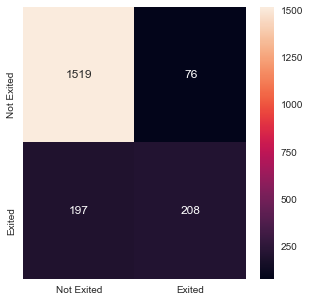

In [54]:
import seaborn as sn
df_cm = pd.DataFrame(cm, index = [i for i in ['Not Exited','Exited']],
                  columns = [i for i in ['Not Exited','Exited']])
plt.figure(figsize = (5,5))
sn.set(font_scale=1)#for label size
sn.heatmap(df_cm, annot=True,fmt='0')
plt.show()

In [59]:
model = build_classifier(grid_search.best_params_['optimizer'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_277 (Dense)            (None, 6)                 72        
_________________________________________________________________
dense_278 (Dense)            (None, 6)                 42        
_________________________________________________________________
dense_279 (Dense)            (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________
